<a href="https://colab.research.google.com/github/bvishnub/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary**

###This project aimed to enhance business strategies through customer segmentation and sentiment analysis. Used unsupervised learning for segmentation and natural language processing (NLP) for analyzing customer reviews.

##**Customer Segmentation (Clustering):**

- K-Means clustering was applied to segment customers into three distinct groups based on features like cost, ratings, reviews, and revenue.
- The optimal number of clusters was k=3, with a high Silhouette Score of 0.462, indicating well-separated and interpretable clusters:
    - **Cluster 0:** High-cost, high-quality customers.
    - **Cluster 1:** Mid-tier, quality-conscious customers.
    - **Cluster 2:** Budget-sensitive customers.

K-Means outperformed DBSCAN and Hierarchical Clustering in cluster quality and scalability.

##**Sentiment Analysis:**

- Logistic Regression was chosen as the final model for sentiment analysis of customer reviews, achieving an accuracy of 87.80%, precision of 87.60% , Recall of 88.10% F1-Score of 87.85%
- The model was tuned using GridSearchCV, optimizing parameters like C, penalty, and solver for better performance.
- The sentiment analysis provided insights into customer opinions, enhancing targeted marketing and customer service.

#**Outcome:**
The project successfully segmented customers for personalized marketing and used sentiment analysis to understand customer feedback, allowing for improved decision-making and enhanced customer satisfaction.

# **GitHub Link -**

https://github.com/bvishnub/Zomato-Restaurant-Clustering-and-Sentiment-Analysis

# **Problem Statement**


The project aims to analyze Zomato restaurant data by clustering restaurants into distinct segments and performing sentiment analysis on customer reviews. The goal is to provide actionable insights for customers to find the best restaurants and help Zomato improve its services and offerings based on customer feedback and market trends.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

### **Import Libraries**

In [2]:
# Import Libraries

# Instalation commands
! pip install nltk
! pip install contractions
!pip install category_encoders
!pip install spacy
!python -m spacy download en_core_web_sm


# 1. Data Manipulation and Processing
import pandas as pd
import numpy as np
import os
import re
import category_encoders as ce
import contractions


# 2. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# 3. Machine Learning & Statistical Models
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB



# 4. Natural Language Processing (NLP)
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# 5. Model Evaluation and Tuning
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 6. Time and Performance
import time



# 7. Download required NLTK data
nltk.download('punkt')      # For word_tokenize
nltk.download('stopwords')  # For the stopwords list
nltk.download('wordnet')    # For lemmatization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Know Your Data** - **Zomato Restaurant reviews Dataset**

### Dataset Loading

In [4]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/AlmaBetter/Project-Module-6/Project-2- Unsupervised - Clustering')

Mounted at /content/drive


In [5]:
# Load Dataset

reviews_df=pd.read_csv('Zomato Restaurant reviews.csv')


### Dataset First View

In [6]:
# Dataset First Look

reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [7]:
reviews_df.tail()

Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

In [8]:
reviews_df.sample(5)

Restaurant        Reviewer  \
1158      Barbeque Nation   Fashion Shadz   
7159    Eat India Company         Epicure   
3768  Kritunga Restaurant   Pradeep Kumar   
9697    Hyderabadi Daawat    Dilawer Khan   
9612    Hyderabadi Daawat  P.Nikhil Reddy   

                                                 Review Rating  \
1158  Awesome food and awesome Service.Specially by ...      5   
7159  Been there after seeing the rating. It is an a...      1   
3768                                               Good      5   
9697  Here mix kabab platter is very delicious,and m...      5   
9612  Food quality is good with medium level of spic...      4   

                       Metadata              Time  Pictures  
1158                   1 Review   9/26/2018 22:37         0  
7159  61 Reviews , 26 Followers  10/14/2018 12:35         0  
3768    0 Reviews , 5 Followers   7/29/2018 13:41         0  
9697     1 Review , 7 Followers    9/30/2018 0:03         1  
9612                  2 Reviews    4/15/2019 8:42         0

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count

print(reviews_df.shape)

print(f'Total rows in data set are {reviews_df.shape[0]} and total columns are {reviews_df.shape[1]}')

(10000, 7)
Total rows in data set are 10000 and total columns are 7


### Dataset Information

In [10]:
# Dataset Info

reviews_df.info()

# we can observe null values in colunns and time , rating columns are object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count

print(f'Availability of the duplicate rows in the dataset :- {reviews_df.duplicated().any()}')


Availability of the duplicate rows in the dataset :- True


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

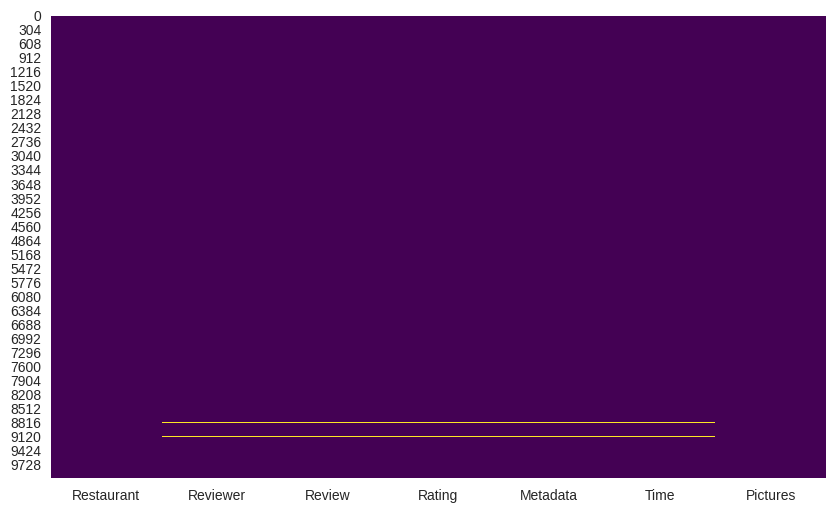

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(reviews_df.isnull(), cmap='viridis', cbar=False)


### What did you know about your dataset?

* Duplicate rows are available in the data set.
* Missing values are there in the columns Review, Reviewer,Rating,Metadata and Time.
* Shape of the data set is (10000, 7).
* Rating and Time columns needs to be converted into numeric.
* Column metada is combination of Number of follwers of reviewer and number of reviews given by reviewer.

### ***2. Understanding Your Variables***

In [14]:
# Dataset Columns

reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [15]:
# Dataset Describe

reviews_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

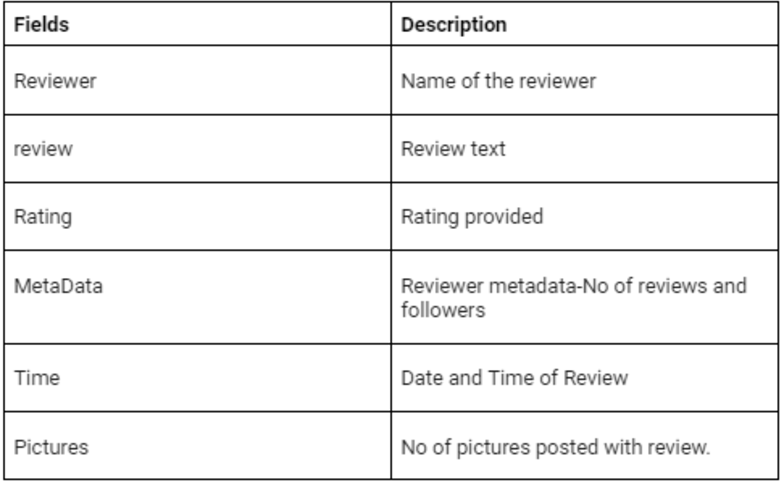

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

print("\t\t\t\t\tUnique_values_in_each_columns")
print("\t\t\t\t******************************************")
print("\n")
for i in reviews_df.columns:
  print(f"{i}:- {reviews_df[i].unique()}")
  print('\n')
  print(f"Total Unique values in {i} column --> {reviews_df[i].nunique()}")
  print("\n")
  print("*"*100)

					Unique_values_in_each_columns
				******************************************


Restaurant:- ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster K

**Observations :-**
* Rating column has 'Like' columns which needs to removed before coverting to numberic.
* Metadata column can be splitted to find the number of follwers and numbers of review given by consumers.
* Date column needs to be converted to datetime format.

### 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

# Checking duplicate and removing duplicate rows

print(f'Availability of the duplicate rows in the dataset :- {reviews_df.duplicated().any()}')

print(f'Shape of the dataset before removing duplicate rows from dataset is : {reviews_df.shape}')

reviews_df.drop_duplicates(inplace=True)

print(f'Shape of the dataset after removing duplicate rows from dataset is : {reviews_df.shape}')

Availability of the duplicate rows in the dataset :- True
Shape of the dataset before removing duplicate rows from dataset is : (10000, 7)
Shape of the dataset after removing duplicate rows from dataset is : (9964, 7)


In [18]:
# checking null values after removing duplicates

# Missing Values and percentage vise

missing_values=reviews_df.isnull().sum().reset_index()

missing_values["Missing%"]= missing_values[0]/reviews_df.shape[0]*100

missing_values

index  0  Missing%
0  Restaurant  0  0.000000
1    Reviewer  2  0.020072
2      Review  9  0.090325
3      Rating  2  0.020072
4    Metadata  2  0.020072
5        Time  2  0.020072
6    Pictures  0  0.000000

In [19]:
# Droping the null values as it is very less than 5%

reviews_df.dropna(subset=["Reviewer","Review",'Rating',"Metadata",'Time'],axis=0,inplace=True)

print(f'Shape of the dataset after dropping null values {reviews_df.shape}')

Shape of the dataset after dropping null values (9955, 7)


In [20]:
# Converting the data type of Ratings from object to Float

like_count=reviews_df.loc[reviews_df['Rating']=='Like',].index

print(f'Total Number of rows with Like as value in Rating column {len(like_count)}')
# Droping the row where rating is 'Like'
reviews_df.drop(index=like_count,inplace=True)

# Coverting the data type of rating  from string to float
reviews_df['Rating']=reviews_df['Rating'].astype('float')

print(f'Shape of the dataset after dropping irrelevant row with rating Like {reviews_df.shape}')


Total Number of rows with Like as value in Rating column 1
Shape of the dataset after dropping irrelevant row with rating Like (9954, 7)


In [21]:
# Change the datatype of Time column from object to datetime
reviews_df['Time']=pd.to_datetime(reviews_df['Time'],format='%m/%d/%Y %H:%M')

# Will further extract date month time separately

In [22]:
# Separating out the Reviews and Followers info from the Metadata column

# Function to seperate out Reviews Count
def check_reviews(string):
  if ('Review' or 'Reviews') in string and ("Follower" or "Followers") in string:
    return int(string.split(',')[0].strip().split()[0])
  else:
    if ('Review' or 'Reviews') in string:
      return int(string.split()[0].strip())
    else:
      return 0


# Fucntion to separate out Followers Count
def check_followers(string):
  if ('Review' or 'Reviews') in string and ("Follower" or "Followers") in string:
    return string.split(', ')[1].strip().split()[0]
  else:
    if ("Follower" or "Followers") in string:
      return int(string.split()[0].strip())
    else:
      return 0

# New Column Num_Reviews created to store reiviews
reviews_df['Num_Reviews'] = reviews_df['Metadata'].apply(check_reviews)

# New Column Num_Followers created to store followers
reviews_df['Num_Followers'] = reviews_df['Metadata'].apply(check_followers)

print(f'Final shape of the data frame is {reviews_df.shape}')


Final shape of the data frame is (9954, 9)


### What all manipulations have you done and insights you found?

* Duplicate Data Rows removed.
* Missing values removed since data loss is very less than 5%.
* 1 row removed due to incorrect value of rating in column Rating.
* Time column coverted to datetime data type from object data type.
* Separated out the reviews and followers from metadata column.
* Final shape of the review data frame is 9954 rows and 9 columns.


## ***Know Your Data*** - **Zomato Restaurant names and Metadata Dataset**


### Dataset Loading

In [23]:
metadata_df=pd.read_csv('Zomato Restaurant names and Metadata.csv')

### Dataset First View

In [24]:
# Dataset First Look
metadata_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [25]:
metadata_df.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [26]:
# check the random sample of the dataset
metadata_df.sample(5)

Name                                              Links   Cost  \
90     Arena Eleven  https://www.zomato.com/hyderabad/arena-eleven-...  1,600   
6           eat.fit  https://www.zomato.com/hyderabad/eat-fit-gachi...    500   
9       Cream Stone  https://www.zomato.com/hyderabad/cream-stone-g...    350   
69   The Indi Grill  https://www.zomato.com/hyderabad/the-indi-gril...  1,500   
11  Barbeque Nation  https://www.zomato.com/hyderabad/barbeque-nati...  1,600   

                                          Collections  \
90                                        New on Gold   
6         Food Hygiene Rated Restaurants in Hyderabad   
9                                     Frozen Delights   
69  Food Hygiene Rated Restaurants in Hyderabad, G...   
11                                   Barbecue & Grill   

                                             Cuisines  \
90                                        Continental   
6   Healthy Food, North Indian, Continental, South...   
9                                 Ice Cream, Desserts   
69                          BBQ, Asian, Modern Indian   
11            Mediterranean, North Indian, Kebab, BBQ   

                                              Timings  
90                             12 Noon to 12 Midnight  
6                                       7 AM to 10 PM  
9   10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri...  
69                           12noon to 11pm (Mon-Sun)  
11            12 Noon to 3:30 PM, 6:30 PM to 11:30 PM

### Dataset Rows & Columns count

In [27]:
# Dataset Rows & Columns count
print(f'Total rows in data set are {metadata_df.shape[0]} and total columns are {metadata_df.shape[1]}')

Total rows in data set are 105 and total columns are 6


### Dataset Information

In [28]:
# Dataset Info
metadata_df.info()

# We can observe null values in columns and cost column data type is object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [29]:
# Dataset Duplicate Value Count
print(f'Availability of the duplicate rows in the dataset :- {metadata_df.duplicated().any()}')


Availability of the duplicate rows in the dataset :- False


#### Missing Values/Null Values

In [30]:
metadata_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

<Axes: >

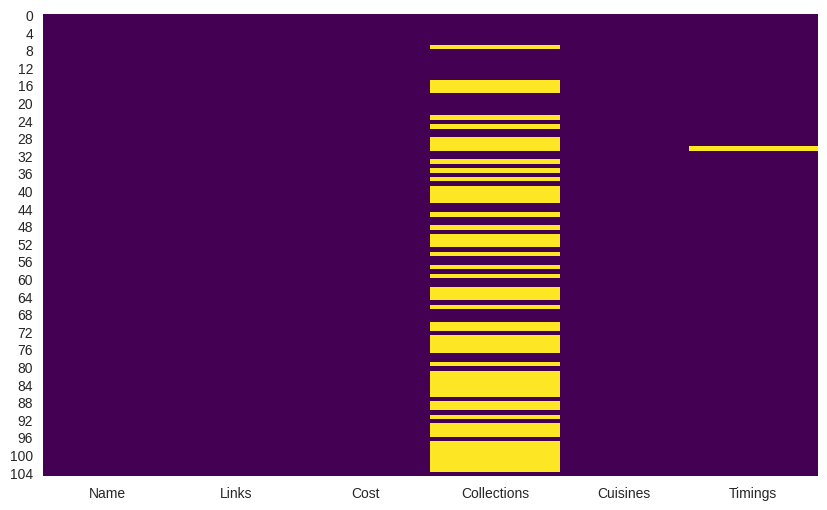

In [31]:
# Missing Values/Null Values Count
plt.figure(figsize=(10,6))
sns.heatmap(metadata_df.isnull(), cmap='viridis', cbar=False)


### What did you know about your dataset?

* Original shape of the data set is (105,6)
* Cost column needs to converted into numeric from object.
* No duplicate records in the dataset.
* Missing values are there in Timings column and collections columns

### ***2. Understanding Your Variables***

In [32]:
# Dataset Columns
metadata_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [33]:
# Dataset Describe
metadata_df.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

### Variables Description

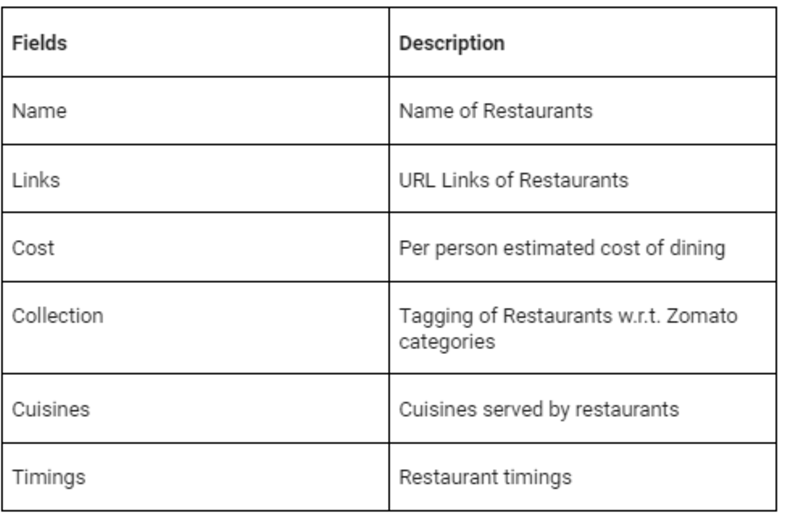

### Check Unique Values for each variable.

In [34]:
# Check Unique Values for each variable.
print("\t\t\t\t\tUnique_values_in_each_columns")
print("\t\t\t\t******************************************")
print("\n")
for i in metadata_df.columns:
  print(f"{i}:- {metadata_df[i].unique()}")
  print('\n')
  print(f"Total Unique values in {i} column --> {metadata_df[i].nunique()}")
  print("\n")
  print("*"*100)

					Unique_values_in_each_columns
				******************************************


Name:- ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen

**Observations :-**
* Links - columns has link to found the restaurant in zomato, will not be used to extract any data.
* Cost column needs to be converted to numeric.
* Collections column can be splitted to find the most popular tags.
* Cuisines column needs to splitted out find the unique cuisine popularity and trends.
* Timings is ambiguous column , data can be fetched in proper format.


### 3. ***Data Wrangling***

### Data Wrangling Code

In [35]:
# Write your code to make your dataset analysis ready.

# Missing value Pecentage
missing_values=metadata_df.isnull().sum().reset_index()

missing_values["Missing%"]=missing_values[0]/metadata_df.shape[0] * 100

missing_values

index   0   Missing%
0         Name   0   0.000000
1        Links   0   0.000000
2         Cost   0   0.000000
3  Collections  54  51.428571
4     Cuisines   0   0.000000
5      Timings   1   0.952381

In [36]:
# Removing the row where timings is null as it is only 1 in number

metadata_df.dropna(subset=['Timings'],axis=0,inplace=True)

print(f'New Shape of the data set is {metadata_df.shape}')

New Shape of the data set is (104, 6)


In [37]:
# converting data type of Cost Column from object to int
metadata_df['Cost']=metadata_df['Cost'].str.replace(',','').astype('int')
metadata_df.head(1)

Name                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)

In [38]:
# Droping the link column as well , since same will not be helpful to extract any useful pattern
metadata_df.drop(labels=['Links'],axis=1,inplace=True)
metadata_df.head(1)

print(f"Final shape of the dataset {metadata_df.shape}")

Final shape of the dataset (104, 5)


### What all manipulations have you done and insights you found?

* Links column dropped
* Null values removed from timing column as one row was there.
* Data type of cost column changed from object to integer.
* Not droping the collections column as of now.

## **Merged Dataset**

In [39]:
# Using group by to find the average rating  and total reviews from review data set
new_df_review = reviews_df.groupby(['Restaurant']).agg({'Rating': 'mean','Review': 'count'}).reset_index()

# Merging the aggregated review data set to metadata set
new_df_review=new_df_review.rename(columns={"Rating":"Average Rating","Review": 'Total Reviews','Restaurant':'Name'})
merge_df=pd.merge(metadata_df,new_df_review,how='inner',on='Name')


merge_df.head(5)


Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  Average Rating  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)            4.28   
1                                     11 AM to 11 PM            4.70   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM            4.66   
3                                    12 Noon to 2 AM            3.21   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...            4.34   

   Total Reviews  
0            100  
1            100  
2            100  
3            100  
4            100

In [40]:
# Checking null values
merge_df.isna().sum()

# we can see merging has created null values average rating and review column because of left join for restaurant whose rating and review not available
# fill those values with zzero due to non availablity

Name               0
Cost               0
Collections       49
Cuisines           0
Timings            0
Average Rating     0
Total Reviews      0
dtype: int64

In [41]:
# Creating a column of Number of Cuisines
merge_df["Number_of_Cuisines"]=merge_df['Cuisines'].apply(lambda x: len(x.split(',')))

In [42]:
print(f'New shape of the dataset after merging {merge_df.shape}')

New shape of the dataset after merging (99, 8)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of the Rating

Text(0.5, 1.0, 'Distribution of Rating')

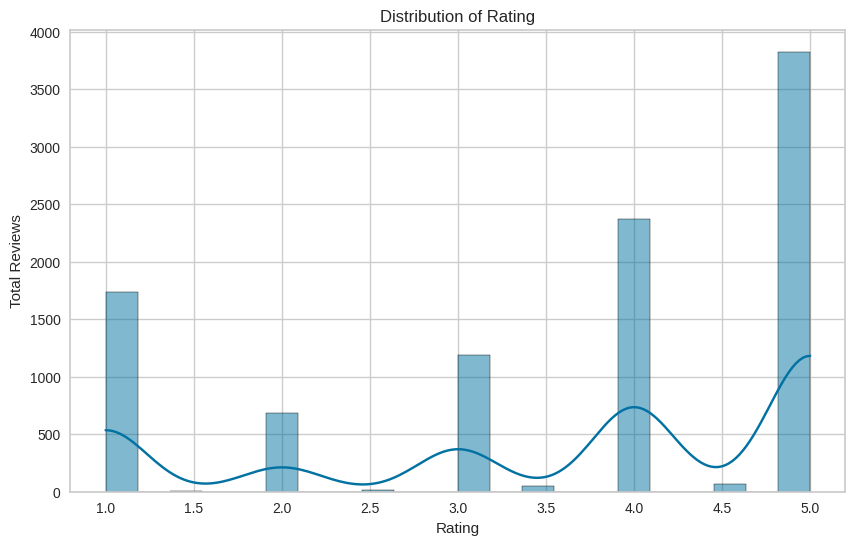

In [43]:
# Chart - 1 visualization code

plt.figure(figsize=(10,6))
sns.histplot(reviews_df["Rating"],kde=True)
plt.ylabel("Total Reviews")
plt.title("Distribution of Rating")



##### 1. Why did you pick the specific chart?

A histogram is a chart that displays the distribution of continuous data by grouping values into bins, showing how often each range occurs. It helps identify patterns, such as skewness or outliers, in large datasets.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that ratings are predominantly concentrated between 4-5, indicating a general trend of positive customer experiences. This suggests that most restaurants are performing well in terms of food quality, service, and overall experience, with a strong number of satisfied customers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Customers often choose restaurants based on ratings, so establishments with higher ratings will naturally attract more business. A restaurant's reputation is directly linked to its ratings—higher ratings lead to a stronger reputation, more customer trust, and increased footfall.

Negative Impact:
Restaurants with negative feedback (low ratings) risk damaging their reputation. Negative reviews can harm a restaurant’s image and customer base if not addressed promptly. Unresolved issues such as poor food quality or service can lead to a decline in customers and hinder future business growth.

#### Chart - 2 Hypothesis -1  Which restaurants have the highest average rating?

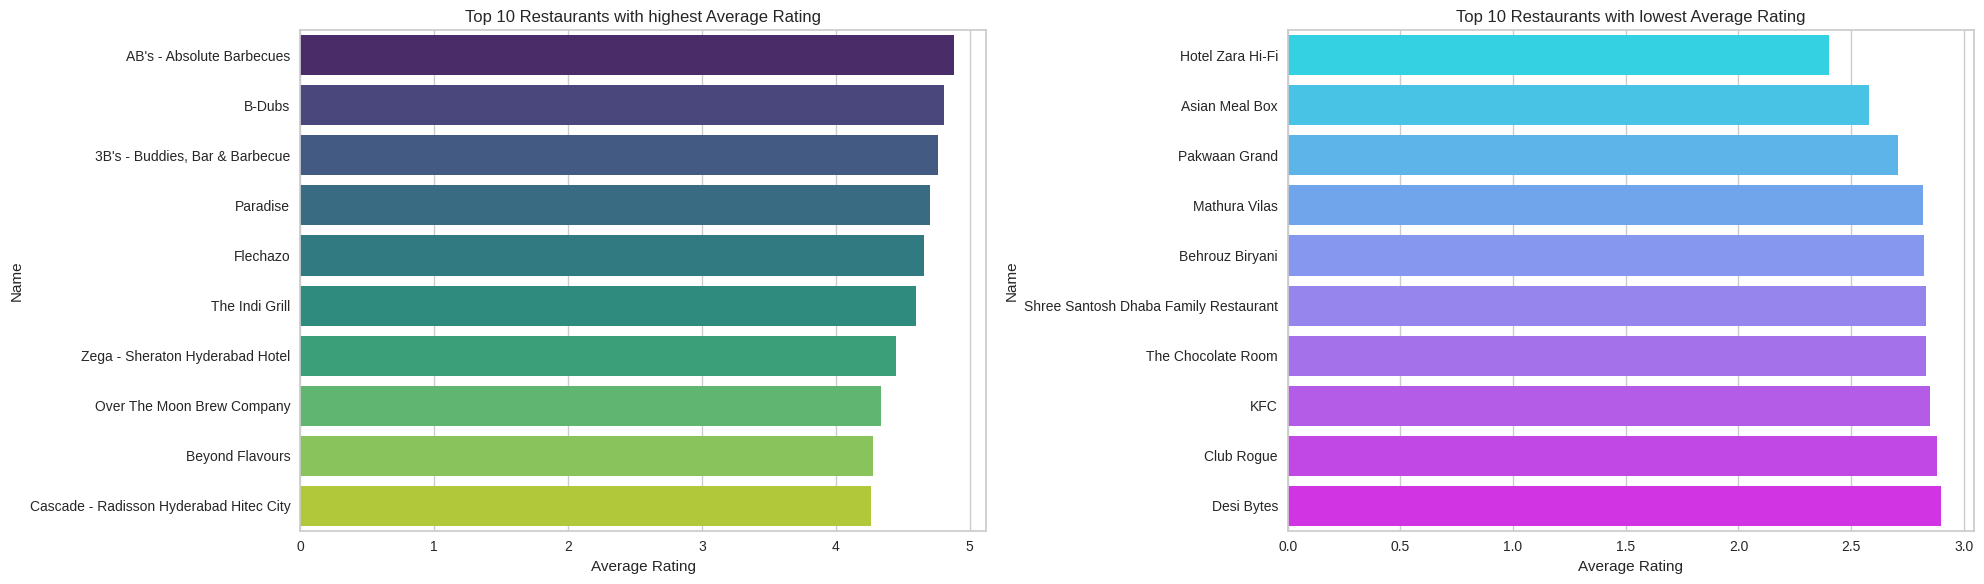

In [44]:
# Chart - 2 visualization code

# Sorting based on Average rating for visualisation.
high_rating=merge_df.sort_values(by='Average Rating',ascending=False).head(10)
low_rating=merge_df.sort_values(by='Average Rating',ascending=True).head(10)


# Top 10 highest Ratings
fig,axes=plt.subplots(1,2,figsize=(20,6))
a=sns.barplot(x="Average Rating",y='Name',data=high_rating,palette="viridis",hue='Name',ax=axes[0])
axes[0].set_title("Top 10 Restaurants with highest Average Rating")

# Top 10 lowest Ratings
b=sns.barplot(x="Average Rating",y='Name',hue='Name',data=low_rating,palette="cool",ax=axes[1])
axes[1].set_title("Top 10 Restaurants with lowest Average Rating")


plt.tight_layout()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing different categories and can display a wide range of data types, from numerical to categorical.



##### 2. What is/are the insight(s) found from the chart?

Top 10 Highest Average Rating Restaurants - ["AB's - Absolute Barbecues", 'B-Dubs', '3B\'s - Buddies, Bar & Barbecue', 'Paradise', 'Flechazo',
 'The Indi Grill', 'Zega - Sheraton Hyderabad Hotel', 'Over The Moon Brew Company', 'Beyond Flavours',
 'Cascade - Radisson Hyderabad Hitec City']

 Top-rated restaurants having an average rating 4.5 indicates highly satisfied customers with their dining experience, food quality and overall experience is high.


10 Lowest Average Rating Restaurants - ["Hotel Zara Hi-Fi", "Asian Meal Box", "Pakwaan Grand", "Mathura Vilas", "Behrouz Biryani",
 "Shree Santosh Dhaba Family Restaurant", "The Chocolate Room", "KFC", "Club Rogue", "Desi Bytes"]


Bottom-rated restaurants with an average rating below 3.0 indicate discontent among customers, suggesting that their dining experience, food quality, service, or overall ambiance may not meet expectations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Leveraging insights from top-performing restaurants can help other establishments replicate successful practices, improving food quality, customer service, and ambiance. High ratings build brand loyalty and attract more customers, boosting business growth. By identifying areas for improvement, lower-rated restaurants can enhance their offerings, elevate ratings, and increase profitability.

Negative Growth Insights:
Restaurants with low ratings are likely facing customer dissatisfaction, leading to negative reviews and a damaged reputation. Unaddressed issues like poor food quality or service can cause a decline in customers and even business closure. Consistently low ratings can harm a brand’s image, especially for well-known franchises, affecting future growth.

#### Chart - 3 Hypothesis-2 Do average rating  and review count is increasing or decreasing across the year?

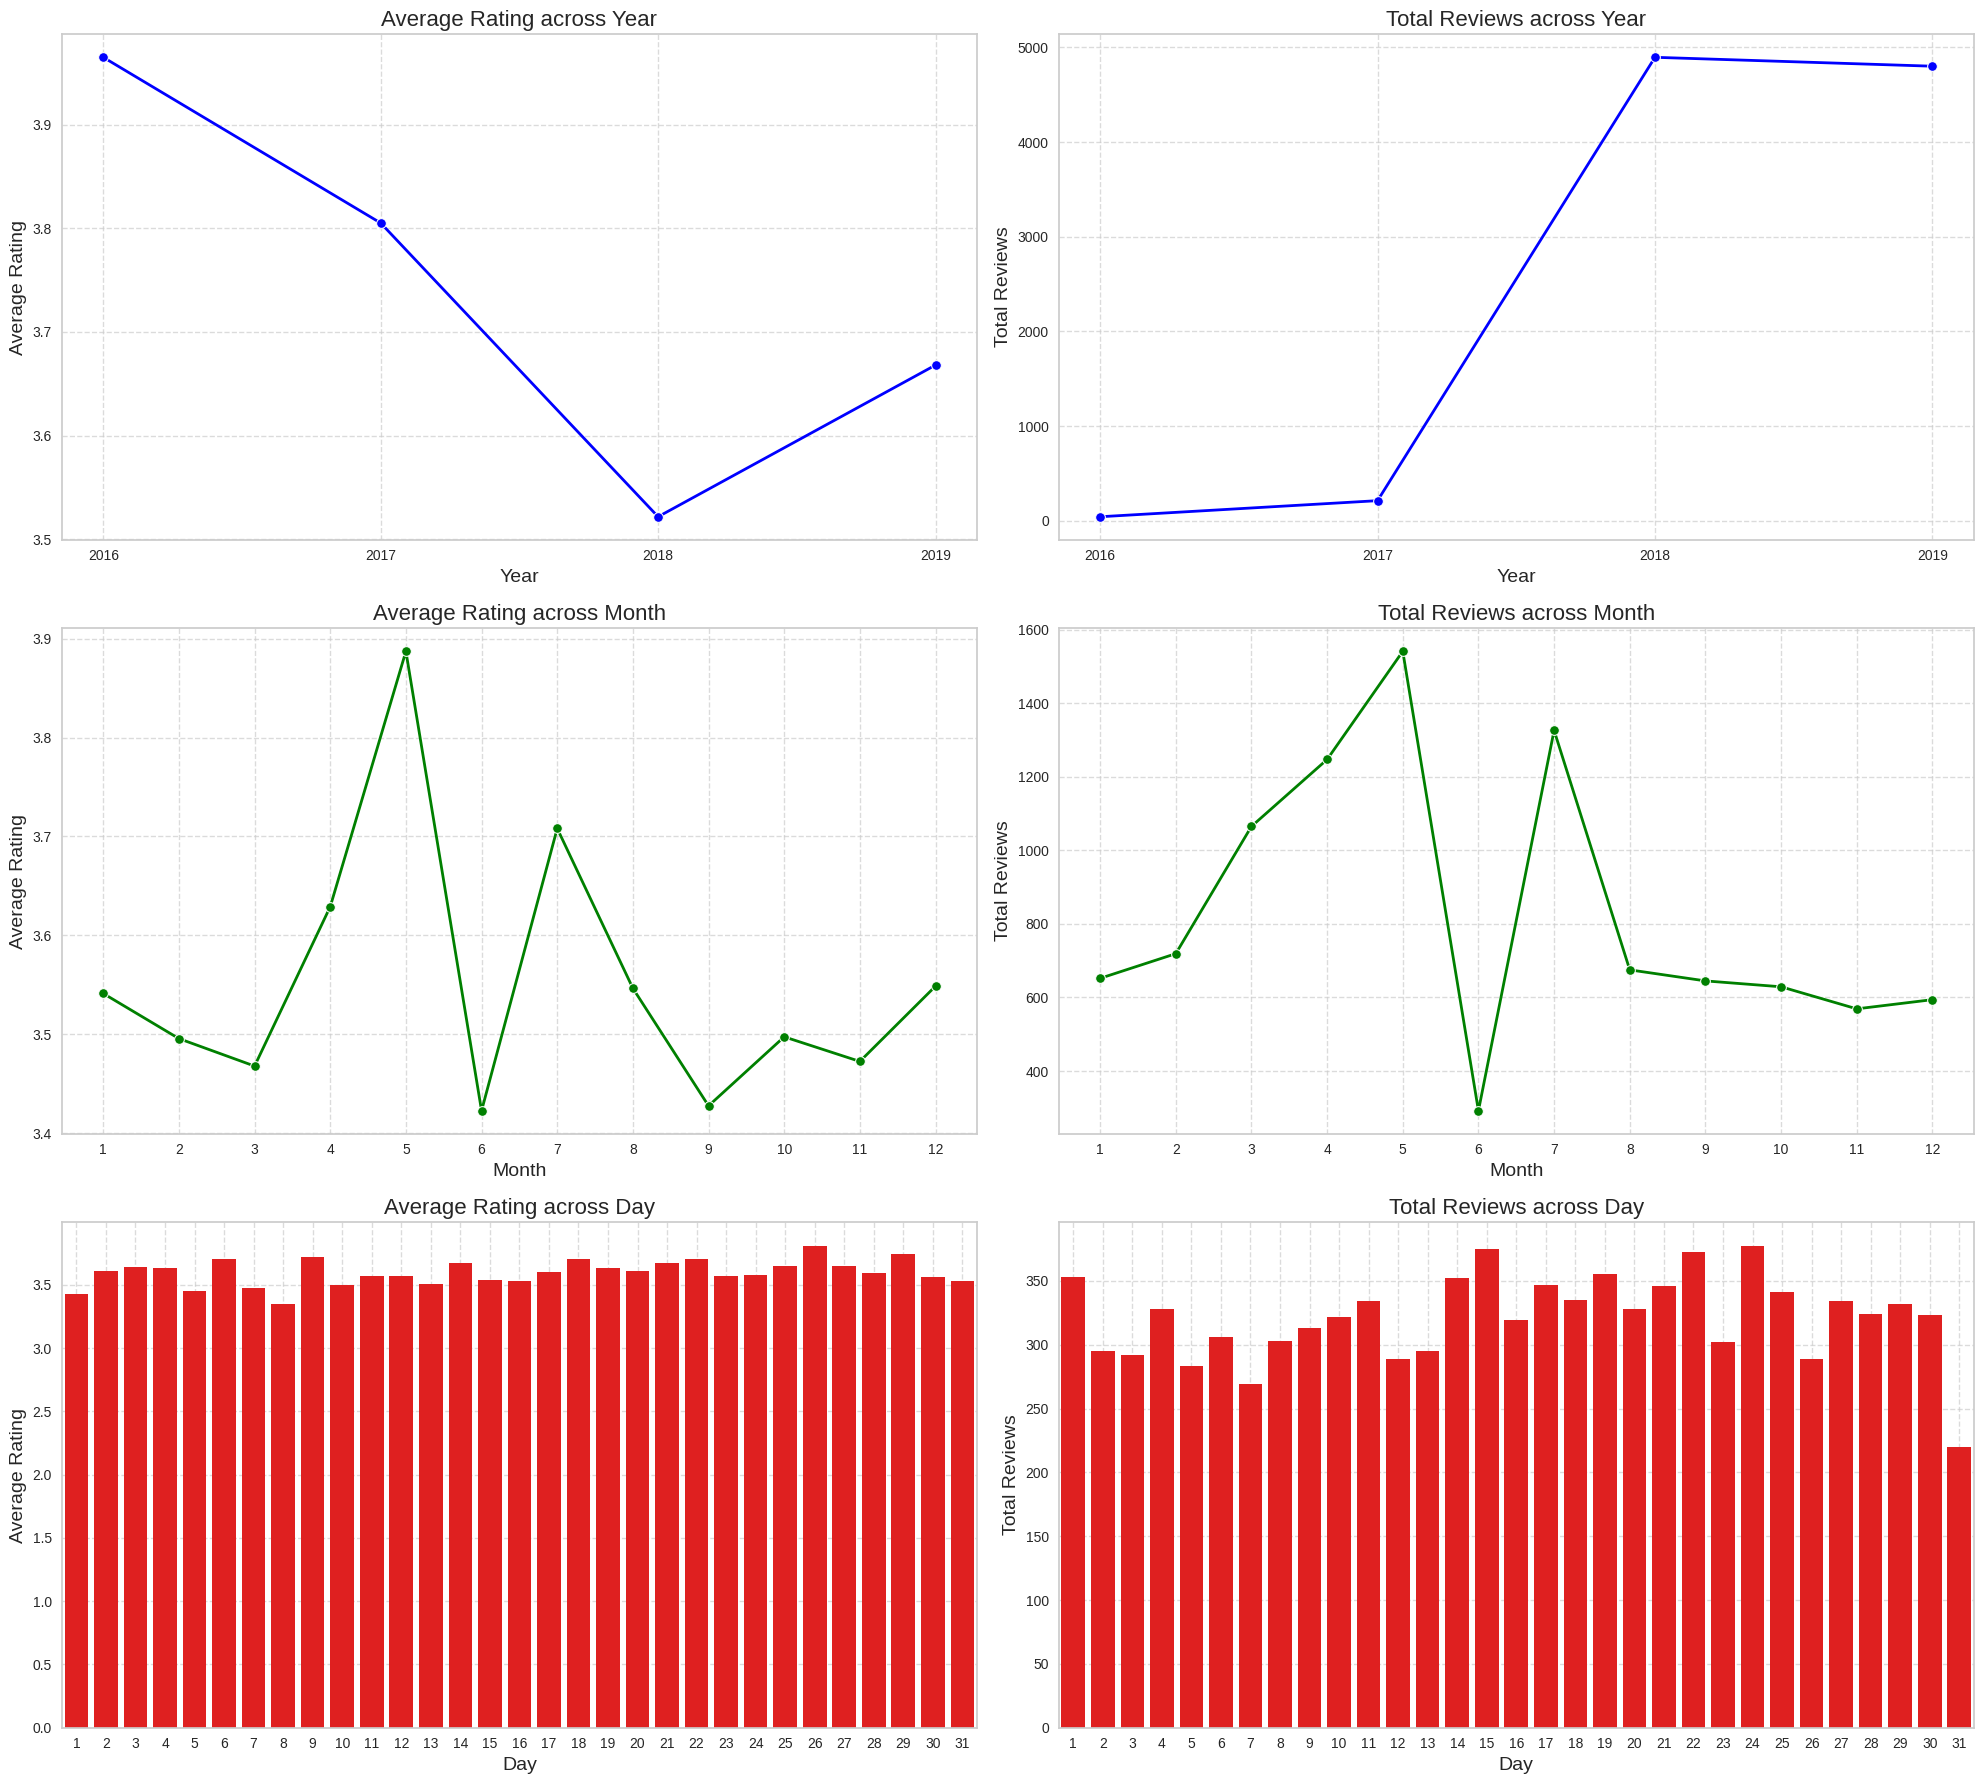

In [46]:
# Extracting the year, month, and day from the 'Time' column for analysis
year = reviews_df.copy()

year["Year"] = year['Time'].dt.year
year["Month"] = year['Time'].dt.month
year["Day"] = year['Time'].dt.day

# Group by Year, Month, Day for Average Rating and Rating Count
year_avg_rating = year.groupby(['Year'])["Rating"].mean().reset_index()
month_avg_rating = year.groupby(['Month'])["Rating"].mean().reset_index()
day_avg_rating = year.groupby(['Day'])["Rating"].mean().reset_index()

# Group by Year, Month, Day for Total Reviews count
year_total_reviews = year.groupby(['Year'])["Rating"].count().reset_index()
month_total_reviews = year.groupby(['Month'])["Rating"].count().reset_index()
day_total_reviews = year.groupby(['Day'])["Rating"].count().reset_index()

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Plot-1: Average Rating across Year
sns.lineplot(x=year_avg_rating["Year"].astype('str'), y=year_avg_rating['Rating'], marker='o', color='blue', linewidth=2, ax=axes[0, 0])
axes[0, 0].set_ylabel("Average Rating", fontsize=14)
axes[0, 0].set_xlabel("Year", fontsize=14)
axes[0, 0].set_title("Average Rating across Year", fontsize=16)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot-2: Total Reviews across Year
sns.lineplot(x=year_total_reviews["Year"].astype('str'), y=year_total_reviews['Rating'], marker='o', color='blue', linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title("Total Reviews across Year", fontsize=16)
axes[0, 1].set_xlabel("Year", fontsize=14)
axes[0, 1].set_ylabel("Total Reviews", fontsize=14)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Plot-3: Average Rating across Month
sns.lineplot(x=month_avg_rating["Month"].astype('str'), y=month_avg_rating['Rating'], marker='o', color='green', linewidth=2, ax=axes[1, 0])
axes[1, 0].set_ylabel("Average Rating", fontsize=14)
axes[1, 0].set_xlabel("Month", fontsize=14)
axes[1, 0].set_title("Average Rating across Month", fontsize=16)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Plot-4: Total Reviews across Month
sns.lineplot(x=month_total_reviews["Month"].astype('str'), y=month_total_reviews['Rating'], marker='o', color='green', linewidth=2, ax=axes[1, 1])
axes[1, 1].set_title("Total Reviews across Month", fontsize=16)
axes[1, 1].set_xlabel("Month", fontsize=14)
axes[1, 1].set_ylabel("Total Reviews", fontsize=14)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Plot-5: Average Rating across Day (Bar Plot)
sns.barplot(x=day_avg_rating["Day"].astype('str'), y=day_avg_rating['Rating'], color='red', ax=axes[2, 0])
axes[2, 0].set_ylabel("Average Rating", fontsize=14)
axes[2, 0].set_xlabel("Day", fontsize=14)
axes[2, 0].set_title("Average Rating across Day", fontsize=16)
axes[2, 0].grid(True, linestyle='--', alpha=0.7)

# Plot-6: Total Reviews across Day (Bar Plot)
sns.barplot(x=day_total_reviews["Day"].astype('str'), y=day_total_reviews['Rating'], color='red', ax=axes[2, 1])
axes[2, 1].set_title("Total Reviews across Day", fontsize=16)
axes[2, 1].set_xlabel("Day", fontsize=14)
axes[2, 1].set_ylabel("Total Reviews", fontsize=14)
axes[2, 1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is commonly used to display data points over a period of time or across different categories, showing trends or changes

##### 2. What is/are the insight(s) found from the chart?

* Overall Rating Trend: Ratings improved from 3.52 in 2018 to 3.66 in 2019, indicating better customer satisfaction post-2018, likely due to positive business changes.
* Engagement Trend: A sharp rise in reviews from 2017 to 2019 suggests increased customer engagement, possibly driven by effective marketing or product popularity.
* Monthly Rating Trends: Ratings peaked in May and July, with a sharp dip in June, indicating specific factors or events influencing satisfaction during those months.
* Day-wise Review Patterns: Mid-month reviews (14th-24th) suggest customers review after significant product use, or due to targeted marketing campaigns around this time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* Improved ratings (2018-2019) suggest higher customer satisfaction, boosting retention and sales.
* Increased reviews (2017-2019) signal stronger engagement and brand trust, driving conversions.
* May & July spikes highlight effective campaigns, useful for future marketing.
Mid-month review peaks offer opportunities for targeted campaigns.

Negative Impact:June decline suggests a potential issue affecting satisfaction, risking customer churn and negative growth if unaddressed.

#### Chart - 4 Hypothesis -3 Which restaurant is having highest and lowest per person cost of dining?

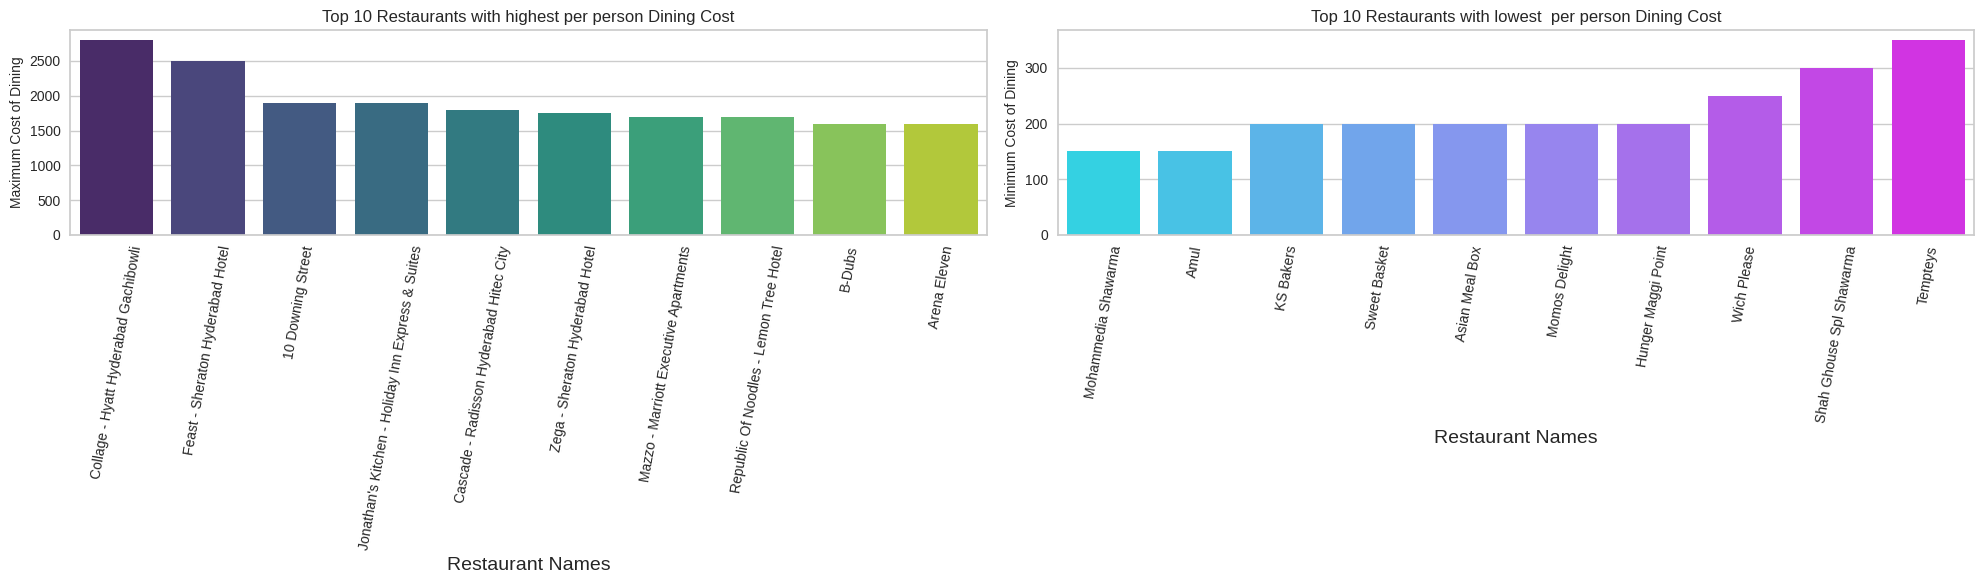

In [48]:
# Chart - 4 visualization code

# Group data based on max and mininmum cost
max_dinding_cost=metadata_df.loc[:,['Name','Cost']].sort_values(by="Cost",ascending=False).head(10)
min_dining_cost=metadata_df.loc[:,['Name','Cost']].sort_values(by="Cost",ascending=True).head(10)


# Plot-1
fig,axes=plt.subplots(1,2,figsize=(20,6))
sns.barplot(x="Name",y='Cost',hue='Name',data=max_dinding_cost,palette="viridis",ax=axes[0])
axes[0].set_title("Top 10 Restaurants with highest per person Dining Cost")
axes[0].tick_params(axis='x', rotation=80)
axes[0].set_xlabel("Restaurant Names", fontsize=14)
axes[0].set_ylabel("Maximum Cost of Dining", fontsize=10)

# Plot-2
sns.barplot(x="Name",y='Cost',data=min_dining_cost,hue='Name',palette="cool",ax=axes[1])
axes[1].set_title("Top 10 Restaurants with lowest  per person Dining Cost")
axes[1].tick_params(axis='x', rotation=80)
axes[1].set_xlabel("Restaurant Names", fontsize=14)
axes[1].set_ylabel("Minimum Cost of Dining", fontsize=10)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing different categories and can display a wide range of data types, from numerical to categorical.



##### 2. What is/are the insight(s) found from the chart?

Top  10 highest per person cost restaruant - [
    "Collage - Hyatt Hyderabad Gachibowli",
    "Feast - Sheraton Hyderabad Hotel",
    "10 Downing Street",
    "Jonathan's Kitchen - Holiday Inn Express & Suites",
    "Cascade - Radisson Hyderabad Hitec City",
    "Zega - Sheraton Hyderabad Hotel",
    "Mazzo - Marriott Executive Apartments",
    "Republic Of Noodles - Lemon Tree Hotel",
    "B-Dubs",
    "Arena Eleven"]


Top 10 lowest per person cost restaurant - names = [
    "Mohammedia Shawarma",
    "Amul",
    "KS Bakers",
    "Sweet Basket",
    "Asian Meal Box",
    "Momos Delight",
    "Hunger Maggi Point",
    "Wich Please",
    "Shah Ghouse Spl Shawarma",
    "Tempteys"
]

Affordable businesses (150-350) attract budget-conscious customers, likely driving high volume but low margins.

Premium businesses (2500-2800) cater to affluent customers with higher margins but lower volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* Low-cost options drive high customer traffic, repeat purchases, and strong word-of-mouth.
* High-cost options build strong brand identity, customer loyalty, and offer higher profitability.


Negative Impact:

* Low-cost options suffer from lower margins and potential quality perception issues.
* High-cost options have limited reach and risk negative reviews if the experience doesn't meet customer expectations.




#### Chart - 5 Hypothesis - 4 What are the top 10 most Famous Cuisines?

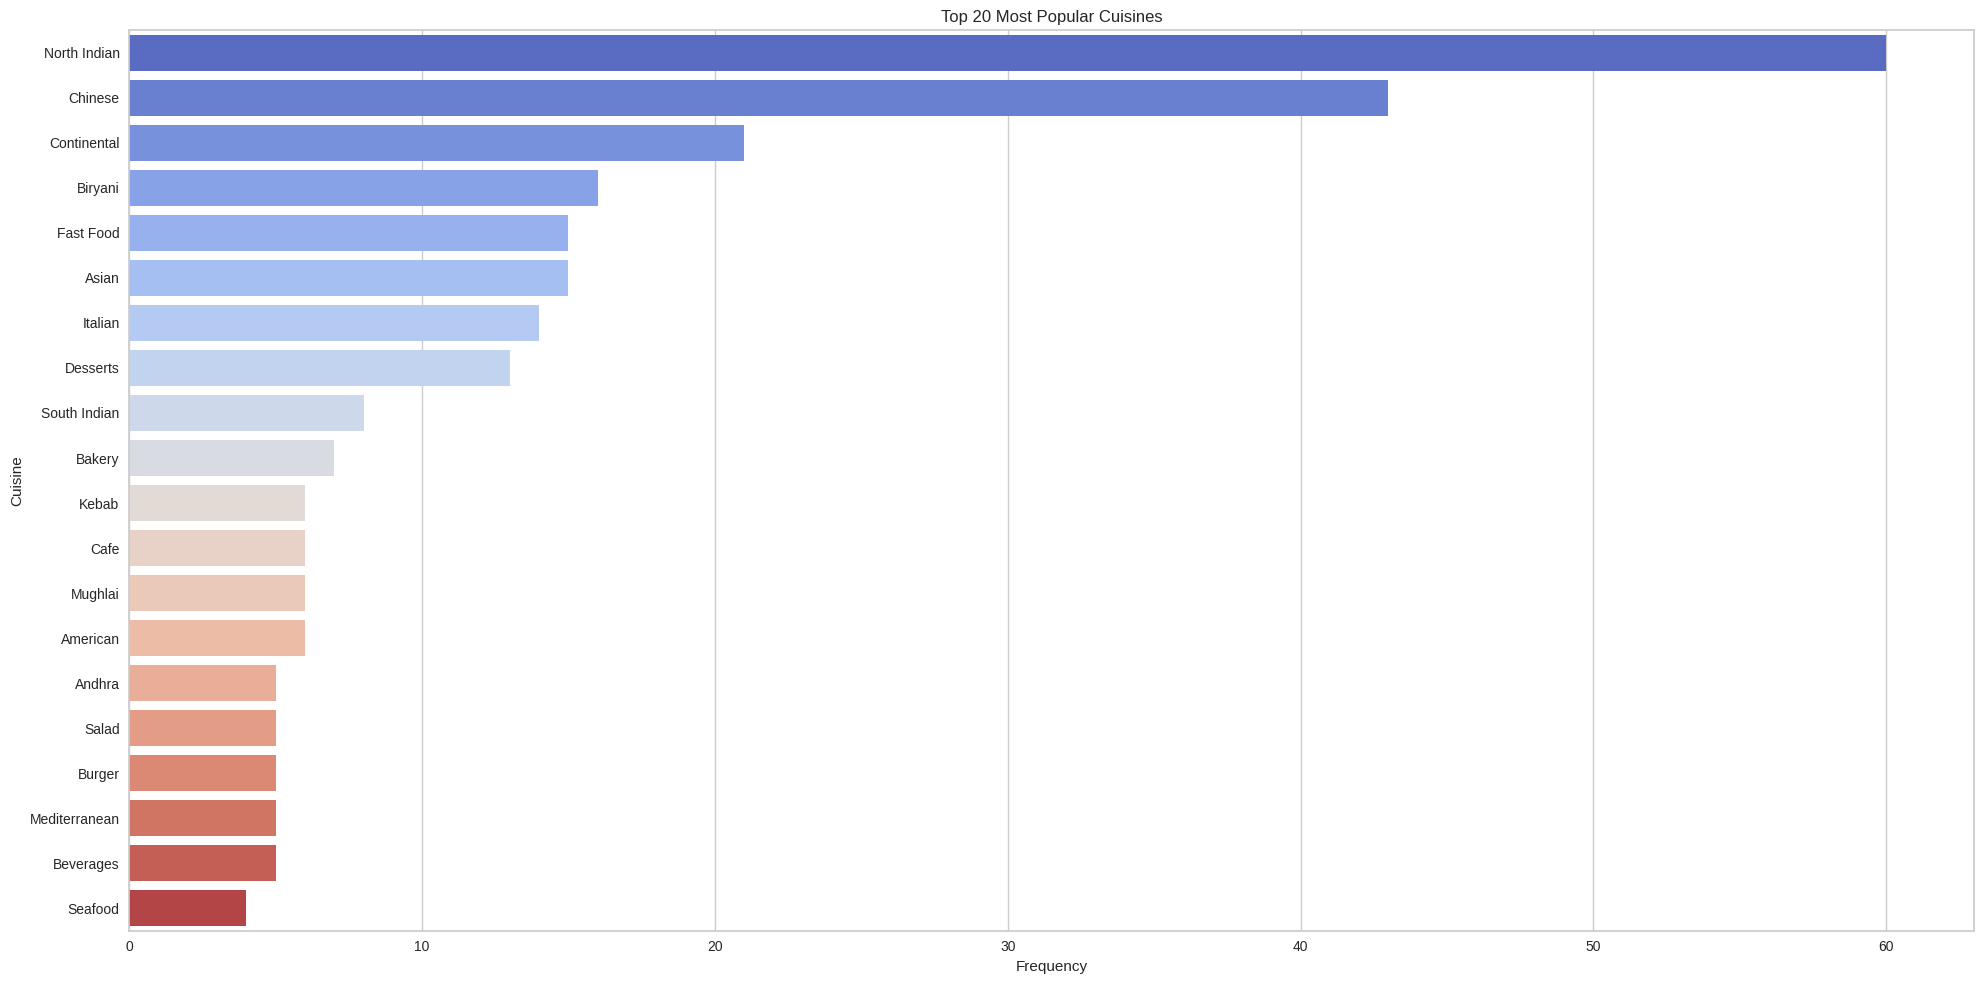

In [49]:
# Chart - 5 visualization code

# Grouping Popular Cuisines
df_exploded= metadata_df.assign(Cuisines=metadata_df['Cuisines'].str.split(',')).explode('Cuisines')
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()

cuisines_count=df_exploded['Cuisines'].value_counts().head(20)

# Plot
plt.figure(figsize=(20, 10))
sns.barplot(x=cuisines_count.values, y=cuisines_count.index,hue=cuisines_count.index ,palette='coolwarm')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.title('Top 20 Most Popular Cuisines',)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing different categories and can display a wide range of data types, from numerical to categorical.

##### 2. What is/are the insight(s) found from the chart?

The food preferences are highly diverse including both local and global taste.North Indian,Chinese , Continental , Biryani are the top 4 popular cusines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* Diverse cuisines offering can ttract large customer base.
* Repeat buisness where these dishes are in high demand.


Negative Impact:
* More variety and if quality is compromised in single cuisine may lead to negative ratings and reviews.

* Too many cuisines can lead to more complex operations.

#### Chart - 6 Hypothesis -5 Which Restaurant is offering the most number of cuisines and trend of ratings?

<ipython-input-50-cd334204658c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_restaurants['Name'], y=top_10_restaurants['Number_of_Cuisines'], palette='viridis', ax=ax1)
<ipython-input-50-cd334204658c>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)


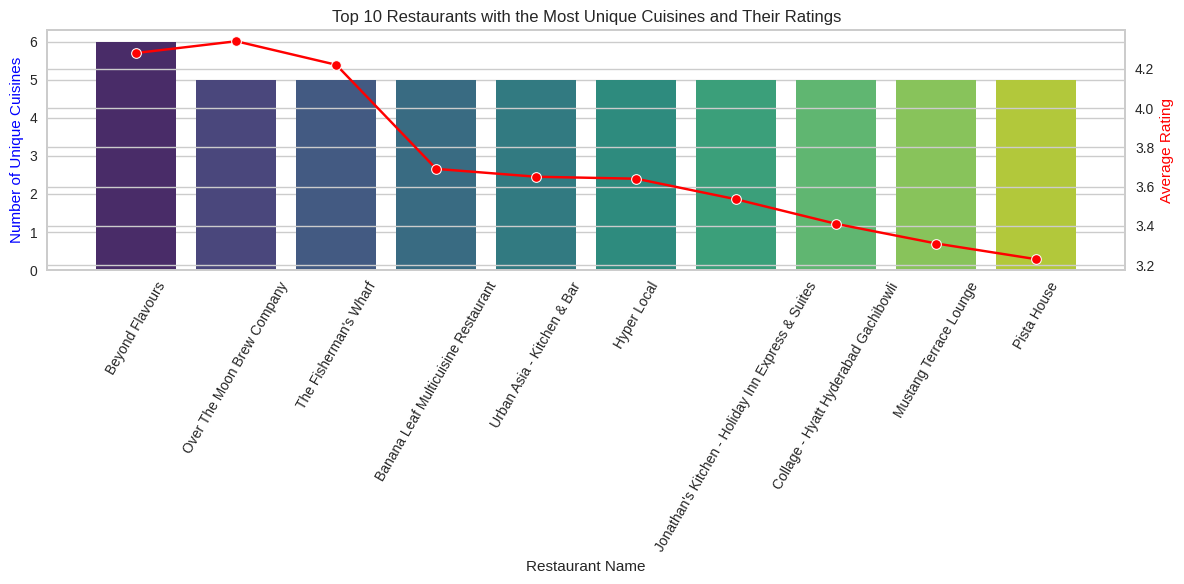

In [50]:
#  Grouping and aggregating the data
agg_data = merge_df.groupby(['Name']).agg({'Number_of_Cuisines': 'sum','Average Rating': 'mean'}).reset_index()

# Sorting the data based on Number_of_Cuisines and Average Rating in descending order
top_10_restaurants = agg_data.sort_values(by=['Number_of_Cuisines', 'Average Rating'], ascending=False).head(10)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of cuisines
sns.barplot(x=top_10_restaurants['Name'], y=top_10_restaurants['Number_of_Cuisines'], palette='viridis', ax=ax1)
ax1.set_xlabel('Restaurant Name')
ax1.set_ylabel('Number of Unique Cuisines', color='blue')

# Second axis for the average rating
ax2 = ax1.twinx()
sns.lineplot(x=top_10_restaurants['Name'], y=top_10_restaurants['Average Rating'], color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Rating', color='red')


plt.title('Top 10 Restaurants with the Most Unique Cuisines and Their Ratings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A double-axis bar chart is useful when you want to compare two different datasets or variables with different scales on the same plot. It typically features two y-axes: one on the left side and one on the right side. This type of chart is especially helpful when you're comparing two related variables that have different units or ranges.

##### 2. What is/are the insight(s) found from the chart?

We can observe that even restaurants offering a higher number of cuisines do not necessarily have higher ratings. Some restaurants with more cuisines, such as Beyond Flavours, Over the Moon Brew Company, and The Fisherman's Wharf, have ratings above 4. However, there are also restaurants with a large number of cuisines that have ratings below 3.5, suggesting that offering more cuisines doesn't automatically guarantee higher customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:-
* Focusing on quality over quantity is more important.

Negative Impact:-
* Only increasing the quantitiy of cuisines not considering quality , may lead to customer dissatifactions which will impact ratings and reputation.

#### Chart - 7 Which are the 100 Most used words in reviews?

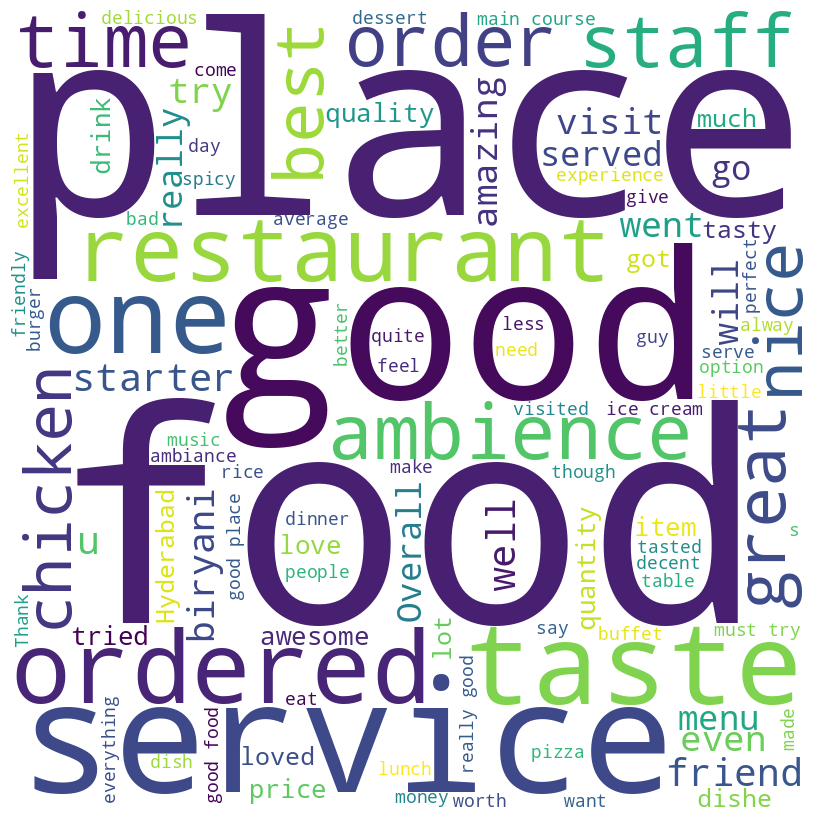

In [51]:
# Chart - 7 visualization code


words=' '.join(reviews_df['Review'].dropna())

wordcloud = WordCloud(
    width=800,                  # Width of the word cloud image
    height=800,                 # Height of the word cloud image
    background_color='white',   # Background color of the word cloud
    colormap='viridis',         # Color scheme of the word cloud
    max_words=100,              # Maximum number of words to display
    contour_width=1,            # Width of the contour
    contour_color='steelblue',  # Contour color
    random_state=42             # Seed for reproducibility
).generate(words)  # Generate the word cloud from the text

# Displaying the word cloud
plt.figure(figsize=(10, 8), facecolor=None)  # Adjusting figure size for better visibility
plt.imshow(wordcloud, interpolation='bilinear')  # Using bilinear interpolation for smooth rendering
plt.axis('off')  # Turn off the axis
plt.tight_layout(pad=0)  # Removing extra padding around the word cloud
plt.show()


##### 1. Why did you pick the specific chart?

Word clouds highlight frequently mentioned terms, helping to identify key themes, sentiments, and customer experiences associated with the product or service.

##### 2. What is/are the insight(s) found from the chart?

We can observe most common words used for reviews using wordcloud , which will help in understanding the emotion as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:-
* Understanding frequent words used will help in improving customer experience

Negative Impact:-
* Frequent negative words could lead to negative impact , also will negatively impact acquiring new customers.

#### Chart - 8 Hypothesis -6 Do restaurants with high Average Ratings have high per person cost of dining?

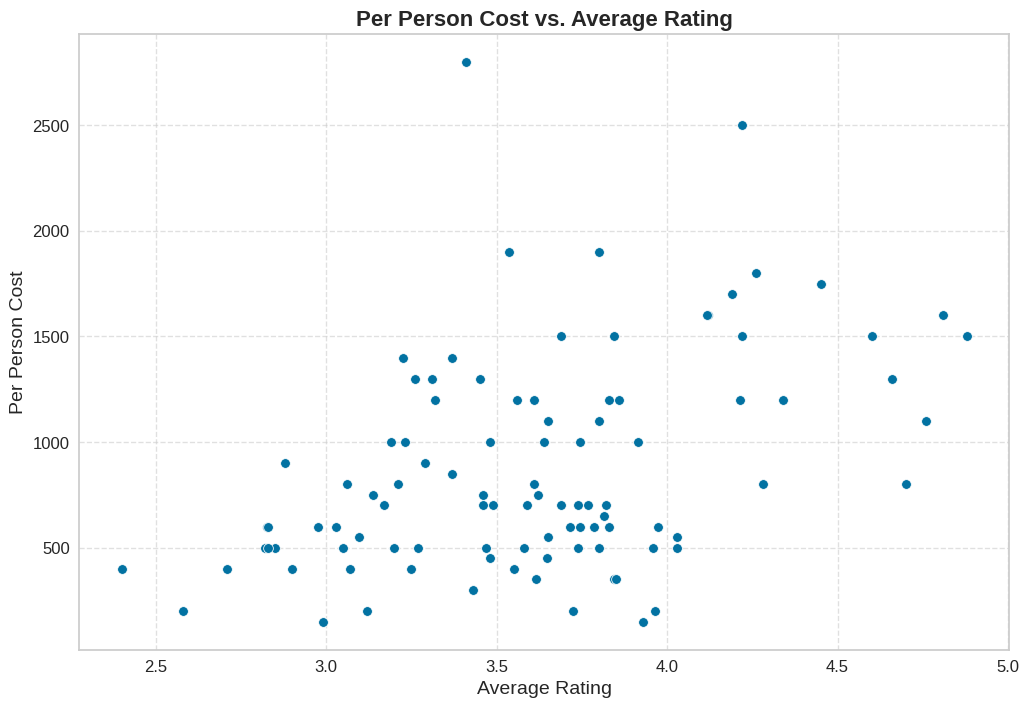

In [52]:
# # Chart - 8 visualization code

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=merge_df["Average Rating"],y=merge_df['Cost'], edgecolor='w')

plt.title('Per Person Cost vs. Average Rating', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Per Person Cost', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

##### 1. Why did you pick the specific chart?

Scatter plots are ideal for visualizing the relationship between two continuous variables. By plotting individual data points on a two-dimensional axis, scatter plots allow you to observe patterns, trends, correlations, and outliers in the data. They are particularly useful for identifying linear or nonlinear relationships, clusters, and the strength of associations between variables.

##### 2. What is/are the insight(s) found from the chart?

We can observe a slight positive correlation between per person cost and average rating ,however he density of data points is higher in the range of ratings between 3 to 4 and costs between 500 to 1200 INR, indicating that most restaurants fall within this price range, and ratings around the mid-range 3-4 stars.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:- Quality should be improved proprotional to per person cost ,which will ultimately improve ratings.
Focus should be more towards  mid range 500-1200rs considering the customer base.

Negative Impact:-Even high cost per person still have rating between 3-4 indicating simply price raise will not help.

#### Chart - 9 Which are the top rated cuisines based on average ratings?

In [53]:
# Split the 'Cuisines' column
cuisines_split = merge_df['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
cuisines_split.name = 'Cuisine'
df_split = merge_df.drop('Cuisines', axis=1).join(cuisines_split)

# Group by the individual cuisines and calculate the average rating
average_ratings = df_split.groupby('Cuisine')['Average Rating'].mean().reset_index()

# Sort the cuisines by average rating
sorted_average_ratings = average_ratings.sort_values(by='Average Rating', ascending=False).head(10)

print(sorted_average_ratings.head(50))

          Cuisine  Average Rating
26  Mediterranean        4.552000
28  Modern Indian        4.410000
13       European        4.382500
4             BBQ        4.360000
16           Goan        4.220000
0        American        3.930671
3           Asian        3.917143
19      Ice Cream        3.887146
39          Sushi        3.831250
11    Continental        3.818825


<ipython-input-54-0ced162ae948>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sorted_average_ratings,x='Average Rating',y='Cuisine',palette='viridis')


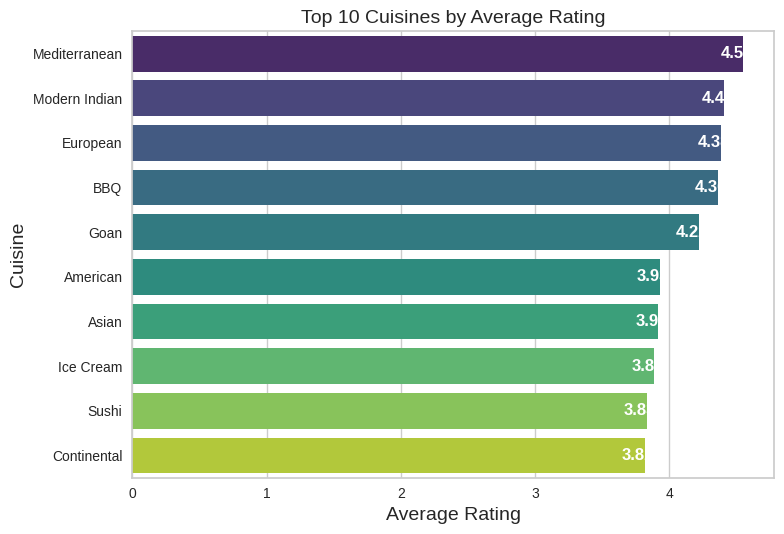

In [54]:
# Plot
ax = sns.barplot(data=sorted_average_ratings,x='Average Rating',y='Cuisine',palette='viridis')

# Add data labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width() - 0.05, p.get_y() + p.get_height() / 2),
                ha='center',
                va='center',
                color='white',
                fontsize=12,
                fontweight='bold')

# Add title and labels
plt.title('Top 10 Cuisines by Average Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Cuisine', fontsize=14)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing different categories and can display a wide range of data types, from numerical to categorical.

##### 2. What is/are the insight(s) found from the chart?

We can observe that Mediterranean, Modern Indian, European, BBQ, and Goan are the top 5 rated cuisines, each with an average rating above 4. This suggests that customers generally have a very positive perception of these cuisines. These cuisines could be performing well due to their quality, unique offerings, or customer preferences that align with current trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:- Focusing on these top-rated cuisines can help businesses align their offerings with customer preferences.Additionally, using these cuisines as a selling point in marketing campaigns could drive customer interest and loyalty, contributing to positive business growth.

Negative Impact:- Focusing majorly on these cuisines can reduce the customer base.

#### Chart - 10 Hypothesis -7 - Top 10 Restaurant on the basis of Revenue Generation

In [55]:
# Chart - 10 visualization code

# Creating a new columns Revenue
merge_df['Revenue_Generated'] = merge_df['Cost'] * merge_df["Total Reviews"]

Revenue=merge_df.loc[:,['Name','Revenue_Generated']].sort_values(by='Revenue_Generated',ascending=False).head(10)

Revenue


Name  Revenue_Generated
91               Collage - Hyatt Hyderabad Gachibowli             280000
55                   Feast - Sheraton Hyderabad Hotel             250000
21  Jonathan's Kitchen - Holiday Inn Express & Suites             190000
18                                  10 Downing Street             190000
90            Cascade - Radisson Hyderabad Hitec City             180000
96                    Zega - Sheraton Hyderabad Hotel             175000
33              Mazzo - Marriott Executive Apartments             170000
22                                             B-Dubs             160000
11                                    Barbeque Nation             160000
5                               The Fisherman's Wharf             150000

<ipython-input-56-5632a94e1cd2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Revenue['Name'], y=Revenue['Revenue_Generated'], palette='cubehelix', ax=ax[0])
<ipython-input-56-5632a94e1cd2>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(Revenue['Name'], rotation=90)


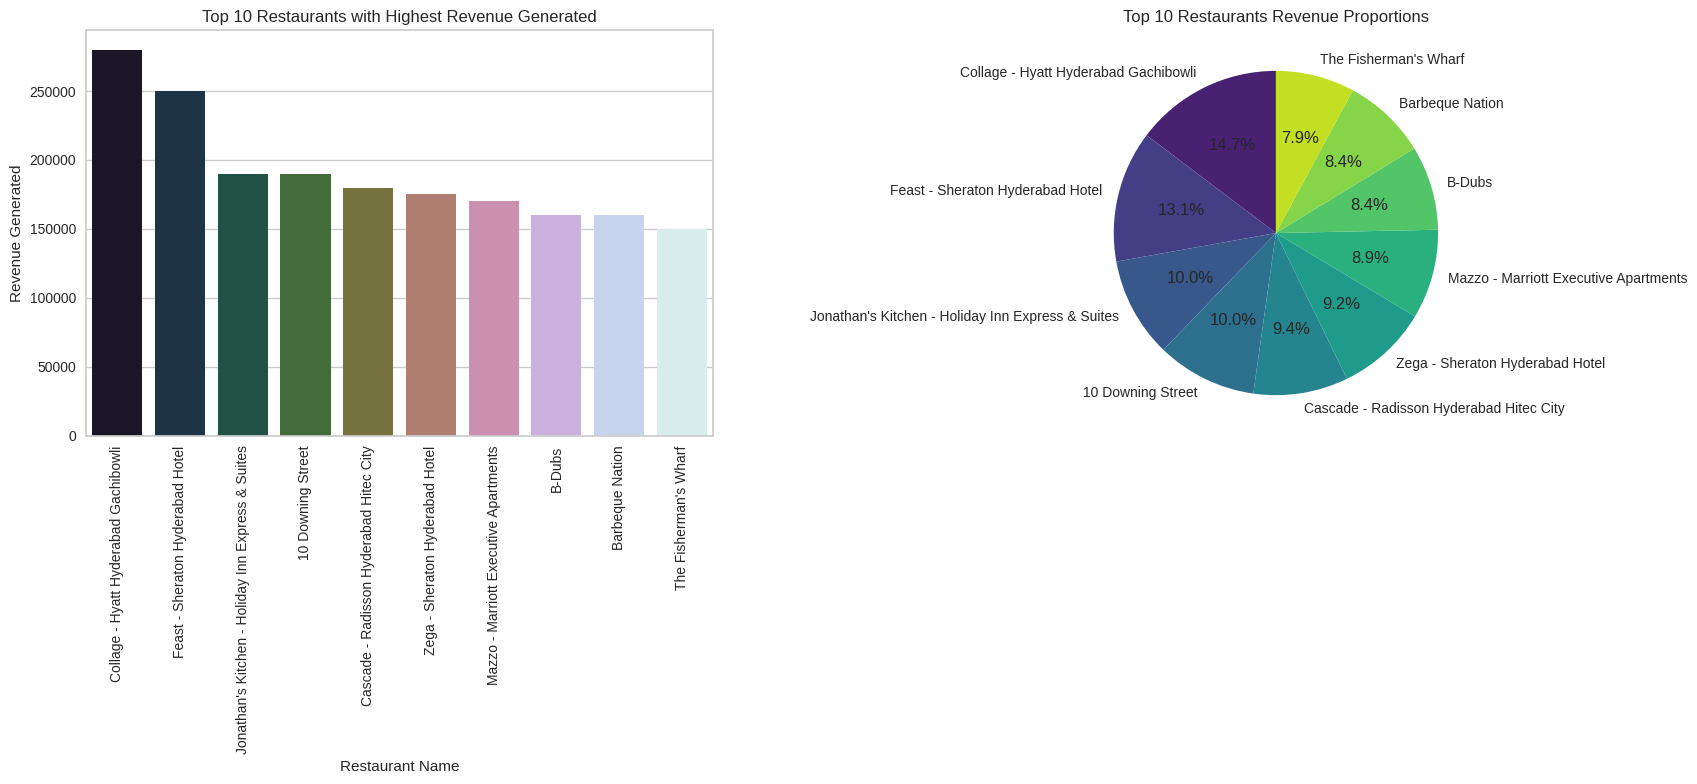

In [56]:
# Subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1 -Bar chart
sns.barplot(x=Revenue['Name'], y=Revenue['Revenue_Generated'], palette='cubehelix', ax=ax[0])
ax[0].set_xticklabels(Revenue['Name'], rotation=90)
ax[0].set_xlabel('Restaurant Name')
ax[0].set_ylabel('Revenue Generated')
ax[0].set_title('Top 10 Restaurants with Highest Revenue Generated')

# Plot -2 Pie chart
ax[1].pie(Revenue['Revenue_Generated'], labels=Revenue['Name'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(Revenue)))
ax[1].set_title('Top 10 Restaurants Revenue Proportions')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing different categories and can display a wide range of data types, from numerical to categorical.

Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the top 10 restaurants by revenue and their contribution to overall revenue amongst top 10. It highlights key performers, revenue distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact :

- Targeted Marketing: Promote high-revenue restaurants.
- Operational Improvement: Replicate successful strategies.
- Resource Allocation: Focus resources on top performers.

Negative:

- Over-Reliance on Few: Risk if top performers face issues.
- Uneven Revenue: Underperforming outlets may indicate gaps, slowing growth.


#### Chart - 11 Hypothesis -8  Who are the most engaging and top reviewers?

<ipython-input-57-7caf031f8d9f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviewer', y='Review', data=top_reviewers, ax=ax1, palette='dark')
<ipython-input-57-7caf031f8d9f>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_reviewers['Reviewer'], rotation=45, ha='right')


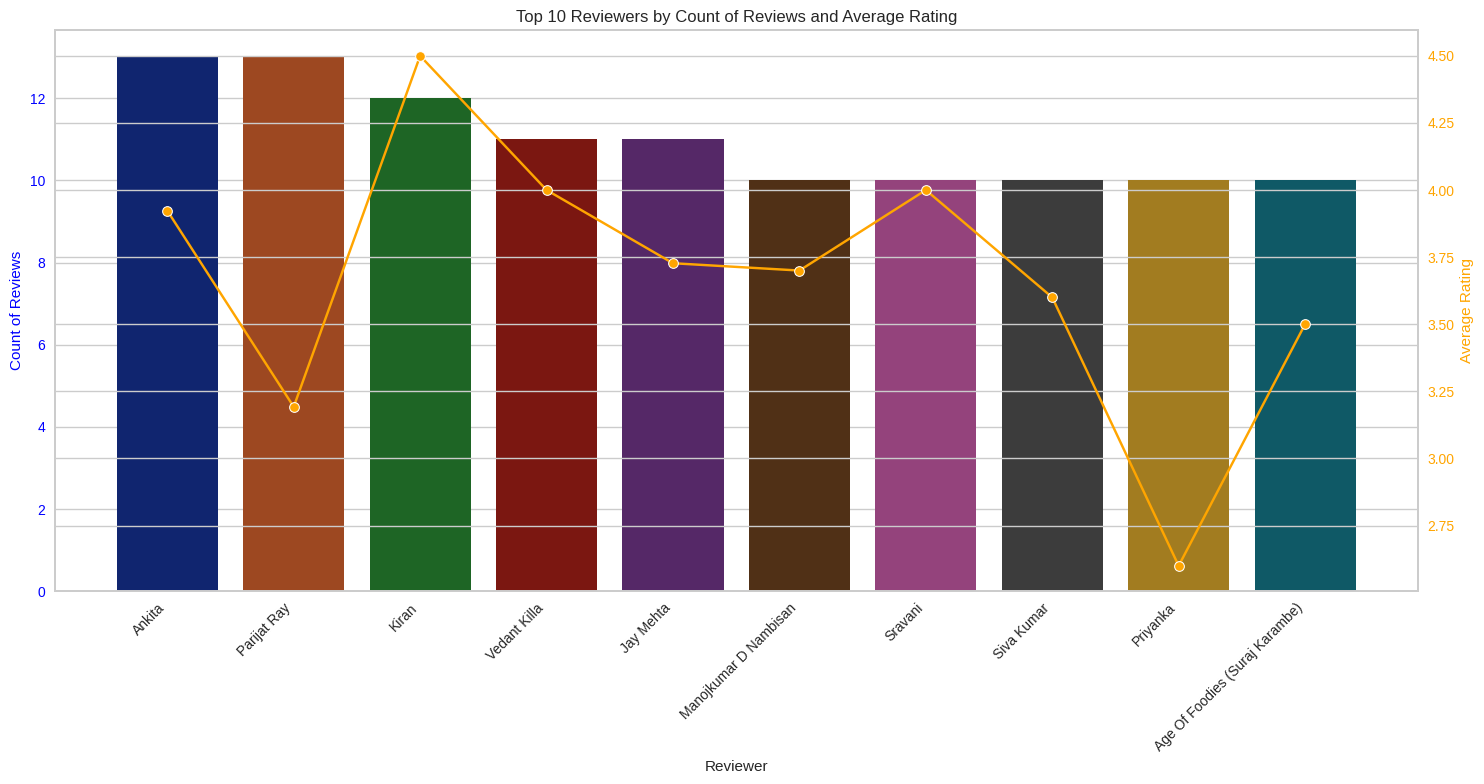

In [57]:
# Chart - 11 visualization code

# Grouping by Review and Rating
top_reviewers = reviews_df.groupby(['Reviewer']).agg({'Review': 'count', 'Rating': 'mean'}).reset_index()
top_reviewers = top_reviewers.sort_values(by='Review', ascending=False).head(10)

# Plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for the count of reviews
sns.barplot(x='Reviewer', y='Review', data=top_reviewers, ax=ax1, palette='dark')
ax1.set_xlabel('Reviewer')
ax1.set_ylabel('Count of Reviews', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels for better visibility
ax1.set_xticklabels(top_reviewers['Reviewer'], rotation=45, ha='right')

# Create a second y-axis for average rating
ax2 = ax1.twinx()
sns.lineplot(x='Reviewer', y='Rating', data=top_reviewers, ax=ax2, marker='o', color='orange')
ax2.set_ylabel('Average Rating', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top 10 Reviewers by Count of Reviews and Average Rating')
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

A double-axis bar chart is useful when you want to compare two different datasets or variables with different scales on the same plot. It typically features two y-axes: one on the left side and one on the right side. This type of chart is especially helpful when you're comparing two related variables that have different units or ranges.

##### 2. What is/are the insight(s) found from the chart?

We can observe here the Most engaging reviewres based on total reviews and Average Rating given.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positve Impact- Help the stake holders to understand the core customer base.Strong relations can be build by loaylity programs , asking for additional reviews.Lucrative Offers , discounts can be offered to consumers conidering low ratings and negative feedbacks to improve the customer experience.

#### Chart - 12 Who are high value customers based on amount spent?

<ipython-input-58-70ec951274cf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_value_cx['Reviewer'], y=high_value_cx['Amount_Spent'], palette='inferno')


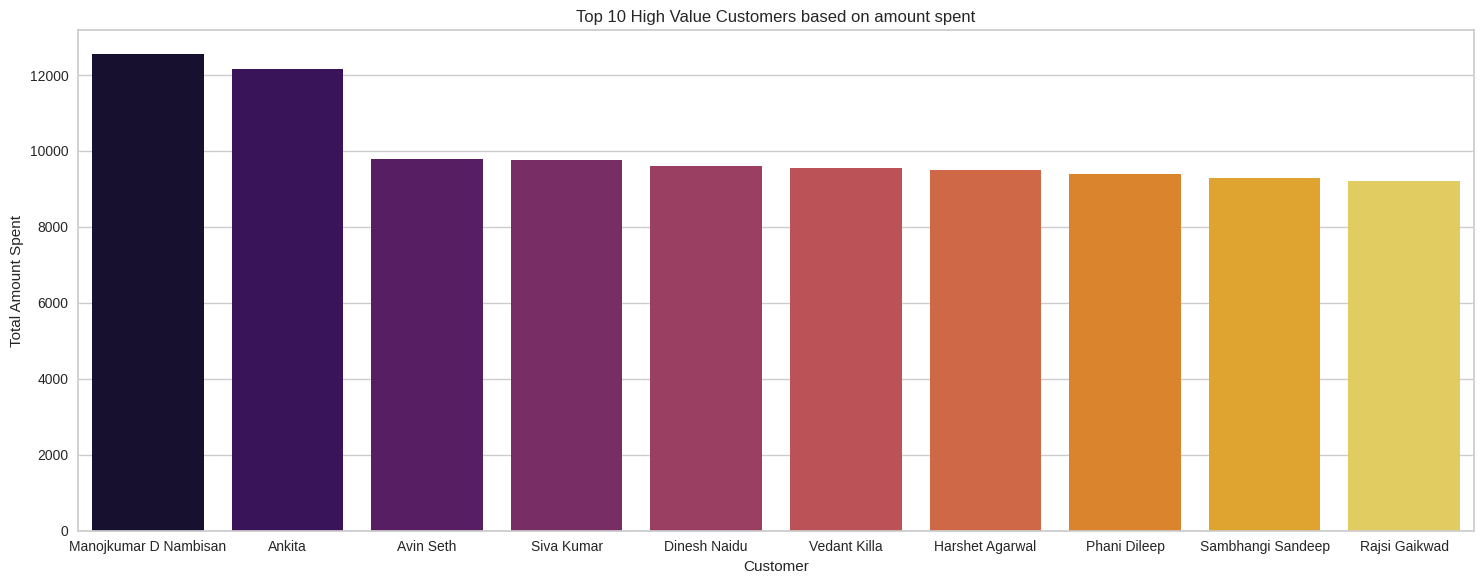

In [58]:
# Chart - 12 visualization code
# Grouping based on Ratings Reviewrs and Restaurant
cx=reviews_df.groupby(['Reviewer','Restaurant'])["Rating"].count().reset_index().sort_values(by='Rating',ascending=False)
cx=cx.rename(columns={'Restaurant':'Name','Rating':'Total_Visits'})
new_df=pd.merge(merge_df,cx,how='inner',on='Name').fillna(0)

new_df["Amount_Spent"]=new_df['Cost']*new_df["Total_Visits"]

high_value_cx=new_df.groupby(['Reviewer'])['Amount_Spent'].sum().reset_index().sort_values(by='Amount_Spent',ascending=False).head(10)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=high_value_cx['Reviewer'], y=high_value_cx['Amount_Spent'], palette='inferno')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Customer')
plt.ylabel('Total Amount Spent')
plt.title('Top 10 High Value Customers based on amount spent')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing different categories and can display a wide range of data types, from numerical to categorical.

##### 2. What is/are the insight(s) found from the chart?

We can observe the names of the top 10 high-value customers based on the amount spent. This gives insight into which customers are the biggest contributors to the business's revenue. Identifying these high-value customers helps businesses understand their key audience and focus on providing exceptional service, personalized experiences, and exclusive offers to retain them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact - Will help in understanding high value customer and offering them with discounts , rewards leading to boost in the relationship and loayality.

#### Chart - 13 Cost vs Benefit

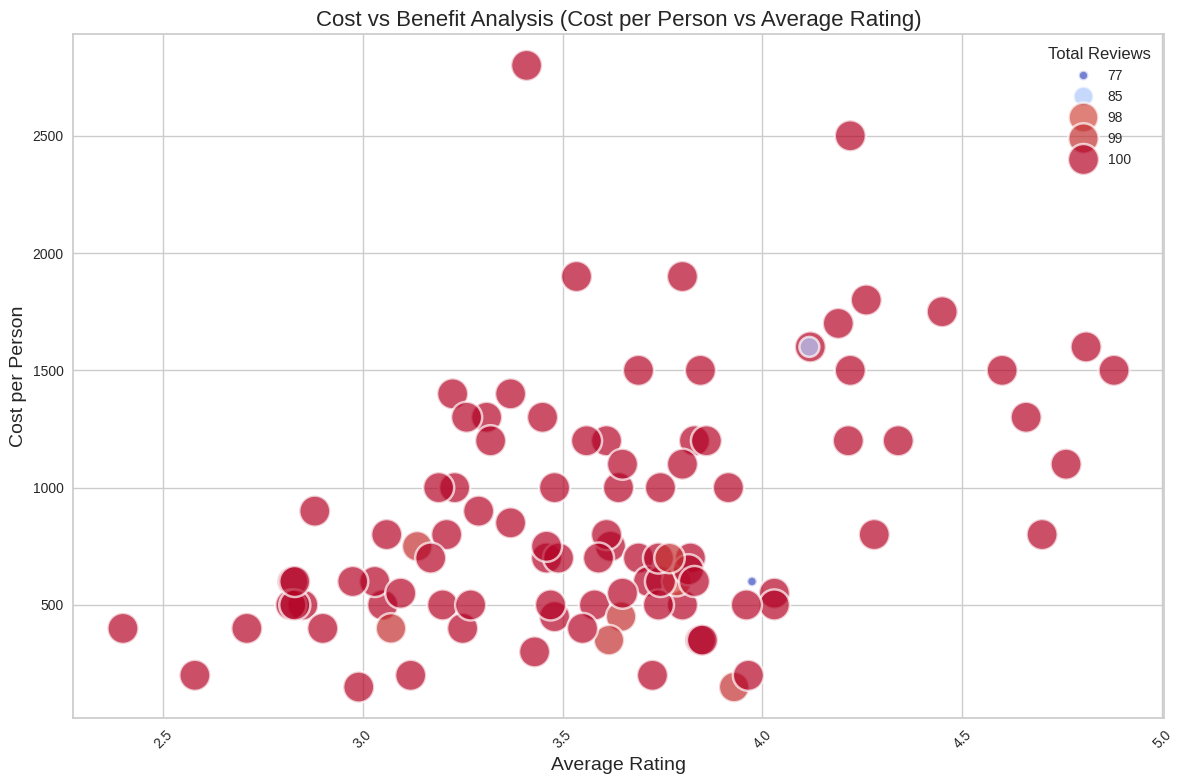

In [59]:
# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merge_df,x='Average Rating',y='Cost',size='Total Reviews',hue='Total Reviews',palette='coolwarm',sizes=(50, 500),alpha=0.7,edgecolor='w',legend=True)
plt.title('Cost vs Benefit Analysis (Cost per Person vs Average Rating)', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Cost per Person', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bubble chart because allows for the visualization of three dimensions of data in one plot, making it ideal for displaying relationships between multiple variables. It helps in identifying patterns, outliers, and trends, and provides a clear comparison between categories, making it easier to analyze complex data at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Mid-range pricing (₹200–₹600) and 3-4 star ratings dominate the data, indicating most restaurants are affordable and perform reasonably well in ratings.
* Larger bubbles (more reviews) are clustered in the 3-4 rating range, showing that well-rated restaurants attract more customers.
* Small bubbles (low reviews) are spread across all price points, indicating some restaurants with low engagement don’t correlate with their pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:-
* High-Cost, Low-Rating Restaurants: Investigate and improve quality to justify premium prices.
* Mid-Range Restaurants: Focus marketing on these, as they are the most popular.
* Low Engagement Restaurants: Boost visibility or offer incentives to increase reviews and attract more customers.

Negative Impact:-
* High-Cost, Low-Rating Restaurants: Poor ratings despite high prices could lead to customer dissatisfaction and declining sales.
* Low Engagement Restaurants: Limited reviews can mean low visibility, making it harder to attract customers and grow.

#### Chart - 14 Most Tags of Restaurant

<ipython-input-60-219d63da9d7c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Collection', data=top_collections, palette='dark')


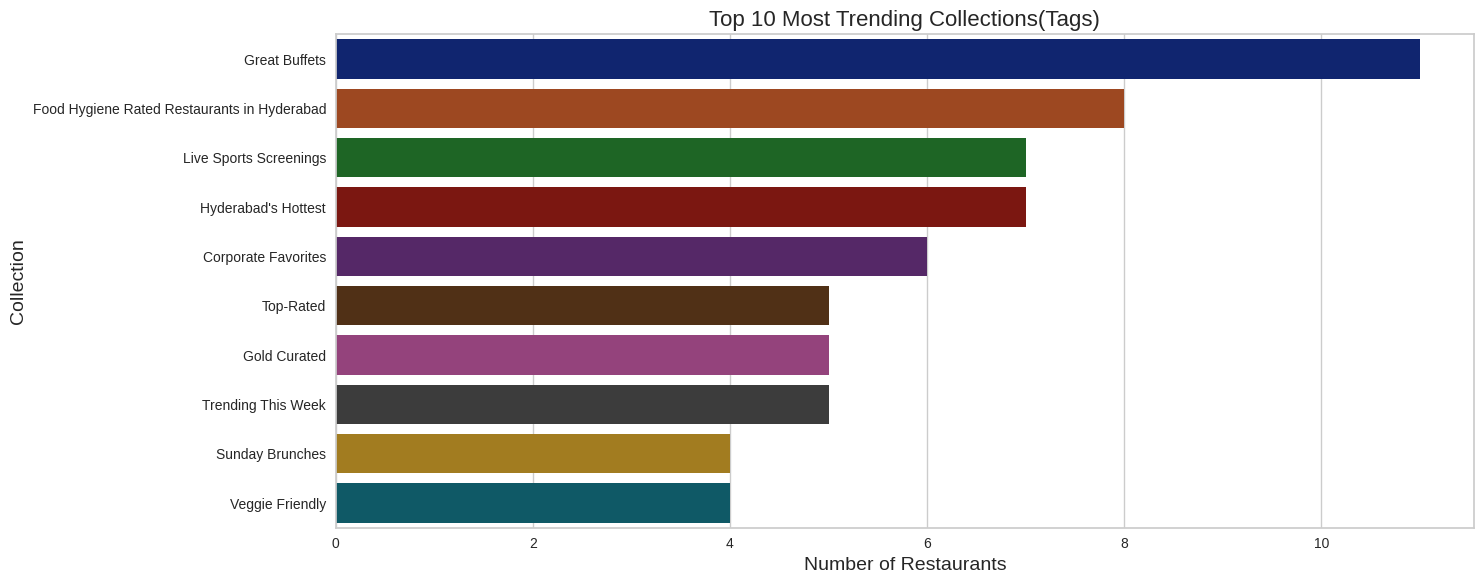

In [60]:
collections=metadata_df.copy()
# Replace NaN values in 'Collections' with empty string for clean split
collections['Collections'] = collections['Collections'].fillna('')

# Split the 'Collections' column by commas
collections['Collections'] = collections['Collections'].apply(lambda x: x.split(',') if x else [])

# Exploding the 'Collections' column into separate rows
exploded_df = collections.explode('Collections')
exploded_df['Collections'] = exploded_df['Collections'].str.strip()

# Count the occurrences of each unique collection
collection_counts = exploded_df['Collections'].value_counts().reset_index()
collection_counts.columns = ['Collection', 'Count']
top_collections = collection_counts.head(10)

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x='Count', y='Collection', data=top_collections, palette='dark')

plt.title('Top 10 Most Trending Collections(Tags)', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Collection', fontsize=14)


plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing different categories and can display a wide range of data types, from numerical to categorical.

##### 2. What is/are the insight(s) found from the chart?

We can observe that certain categories like "Great Buffets," "Live Sports screening" etc are highly tagged, indicating that these types of cuisine are the most popular and have the most visibility among customers. These popular tags suggest that customers are most interested in these cuisines when searching for restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:-
* Restaurants that fall within these top-tagged categories can benefit from increased visibility and customer interest. Focusing on these high-demand cuisines could attract more customers.
* Restaurants could align their menus or introduce variations of these popular cuisines to appeal to a larger audience and drive sales growth.

Negative Impact:-
* Too heavy focus on popular categories could miss the opportunity to cater to customers looking for unique or specialized dining experiences.

#### Chart - 15 - Correlation Heatmap

<Axes: >

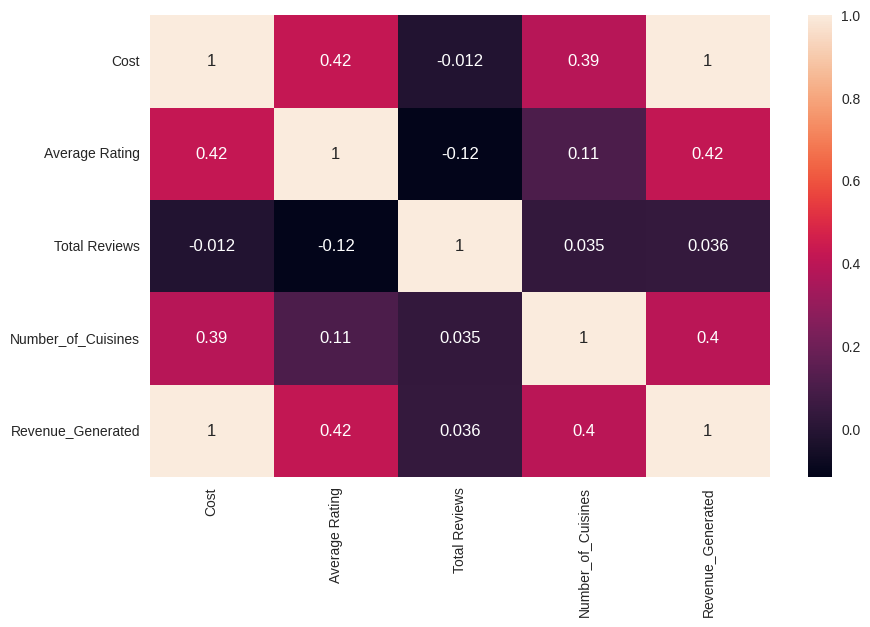

In [61]:
# Plot
plt.figure(figsize=(10,6))
sns.heatmap(merge_df.select_dtypes(exclude='object').corr(),annot=True)

##### 1. Why did you pick the specific chart?

Heat maps are ideal for visualizing complex data patterns and relationships between variables in a matrix or grid format. They use color gradients to represent values, making it easy to identify trends, correlations, and anomalies at a glance.

##### 2. What is/are the insight(s) found from the chart?

* We can observe coorelation between cost and average rating.
* Number of cuisines and cost
* Also revenue generated is coorelated as it is a derived columns.

#### Chart - *16* - Pair Plot

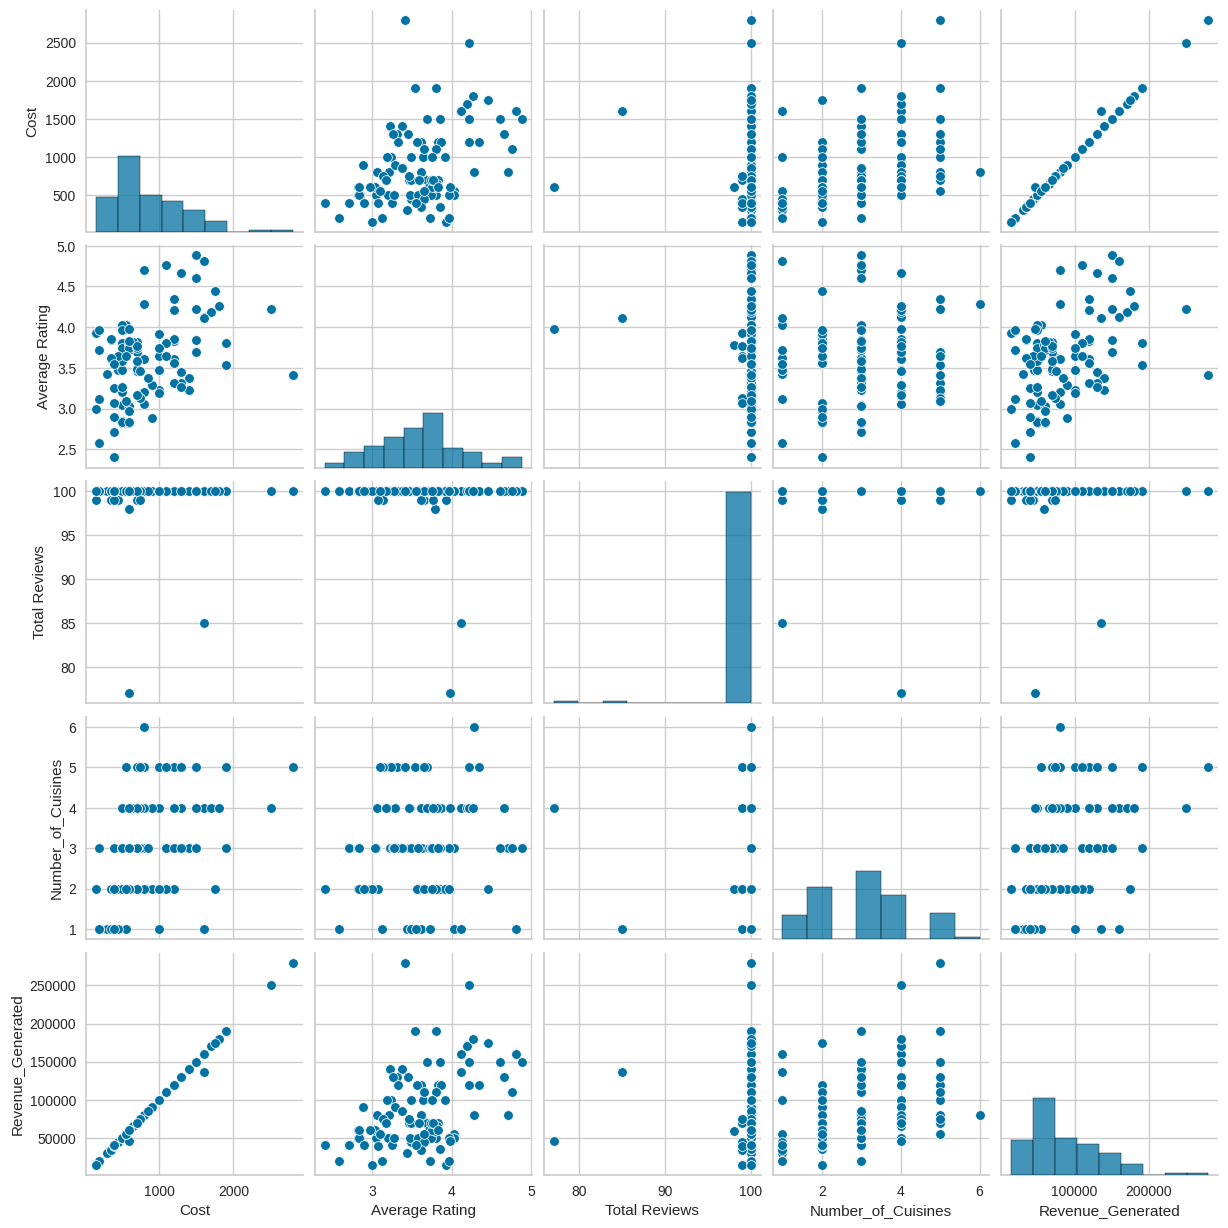

In [62]:
# Pair Plot visualization code

sns.pairplot(merge_df)

##### 1. Why did you pick the specific chart?

Pair plots are ideal for visualizing the relationships between multiple continuous variables in a dataset.



##### 2. What is/are the insight(s) found from the chart?

Coorelations between variables can be understood at one go using pari plot

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between average restaurant ratings and per-person cost of dining.

Alternative Hypothesis (H1): There is a significant correlation between average restaurant ratings and per-person cost of dining.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

stats_test=merge_df.loc[:,['Name','Average Rating','Cost']]


# Perform Pearson's correlation test
correlation, p_value = stats.pearsonr(stats_test['Average Rating'], stats_test['Cost'])

print(f"Pearson's Correlation: {correlation}")
print(f"P-value: {p_value}")

# Test significance
alpha = 0.05  # Significance level
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant correlation between average rating and per-person cost.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between average rating and per-person cost.")





Pearson's Correlation: 0.423262113895665
P-value: 1.2717028067156608e-05
Reject the null hypothesis: There is a significant correlation between average rating and per-person cost.


**Conclusion:**
* Since the p-value is much smaller than the significance level (α = 0.05), we reject the null hypothesis.
* Result: There is a significant positive correlation between average restaurant ratings and per-person cost of dining.
* Interpretation: Higher per-person costs tend to be associated with higher ratings, suggesting that customers may associate higher prices with better experiences or quality.

##### Which statistical test have you done to obtain P-Value?

The statistical test used is Pearson's Correlation Coefficient Test.

##### Why did you choose the specific statistical test?

Pearson's Correlation is used to assess the strength and direction of the linear relationship between two continuous variables. In this case, we are testing the relationship between:

* Average restaurant ratings (a continuous variable)
* Per-person cost of dining (another continuous variable)

Since the goal is to determine if there is a significant correlation between these two variables, Pearson's test is appropriate. It measures both the strength (ranging from -1 to 1) and the direction (positive or negative) of the linear relationship.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between the number of reviews and the average rating of restaurants.
Alternative Hypothesis (H1): There is a significant correlation between the number of reviews and the average rating of restaurants.


#### 2. Perform an appropriate statistical test.

In [64]:
correlation, p_value = stats.pearsonr(merge_df['Average Rating'], merge_df['Total Reviews'])

print(f"Pearson's Correlation: {correlation}")
print(f"P-value: {p_value}")

# Test significance
alpha = 0.05  # Significance level
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant correlation between number of reviews and average rating.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between number of reviews and average rating.")

Pearson's Correlation: -0.11695478910509238
P-value: 0.24896463569252517
Fail to reject the null hypothesis: There is no significant correlation between number of reviews and average rating.


**Conclusions:**
* Since the p-value (0.249) is greater than the significance level (α = 0.05), we fail to reject the null hypothesis.

* Result: There is no significant correlation between the number of reviews and average restaurant ratings.

* Interpretation: The number of reviews does not appear to have a strong impact on the average rating of restaurants.

##### Which statistical test have you done to obtain P-Value?

The statistical test used is Pearson's Correlation Coefficient Test.


##### Why did you choose the specific statistical test?

Pearson's Correlation is ideal for assessing the linear relationship between two continuous variables. In this case, we are testing the correlation between:

* Number of Reviews (continuous variable)
* Average Restaurant Rating (continuous variable)

Since the goal is to determine if there is a significant correlation between these two variables, Pearson's test is appropriate. It measures both the strength (ranging from -1 to 1) and the direction (positive or negative) of the linear relationship.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no significant difference in the average ratings between restaurants offering a high number of cuisines and those offering a low number of cuisines.

Alternative Hypothesis (H1):
There is a significant difference in the average ratings between restaurants offering a high number of cuisines and those offering a low number of cuisines.

Statistical Test:

#### 2. Perform an appropriate statistical test.

In [65]:
# Calculate the mean of the number of cuisines to use as the threshold
mean_cuisines = merge_df['Number_of_Cuisines'].mean()

# Define 'high number of cuisines' and 'low number of cuisines' groups
high_cuisines = merge_df[merge_df['Number_of_Cuisines'] >= mean_cuisines]['Average Rating']
low_cuisines = merge_df[merge_df['Number_of_Cuisines'] < mean_cuisines]['Average Rating']

# Perform Z-test for two independent sample means using statsmodels
z_stat, p_val = ztest(high_cuisines, low_cuisines)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

# Test the hypothesis
alpha = 0.05  # Significance level
if p_val <= alpha:
    print("Reject the null hypothesis: There is a significant difference in average ratings between restaurants offering high and low number of cuisines.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average ratings between restaurants offering high and low number of cuisines.")


Z-statistic: 1.1907540312717946
P-value: 0.23375015979497604
Fail to reject the null hypothesis: There is no significant difference in average ratings between restaurants offering high and low number of cuisines.


**Conclusion:-**
* Since the p-value (0.23) is greater than the significance level (α = 0.05), we fail to reject the null hypothesis.
* Result:There is no significant difference in the average ratings between restaurants offering a high number of cuisines and those offering a low number of cuisines.
* Interpretation:
The test shows that offering more cuisines does not significantly affect the average ratings of a restaurant. Therefore, we can conclude that factors other than the number of cuisines (e.g., food quality, service, ambiance) are likely more influential in determining restaurant ratings.

##### Which statistical test have you done to obtain P-Value?

The statistical test used is Z-test for two independent sample means

##### Why did you choose the specific statistical test?

The Z-test is used here to compare the means of two independent groups. The test is appropriate for large sample sizes (based on the Central Limit Theorem) and is used to determine if the mean of average ratings differs significantly between restaurants offering a high number of cuisines versus those offering a low number of cuisines.

## ***6. Feature Engineering & Data Pre-processing*** - Clustering Restaurants into Segments.

### 1. Handling Missing Values

In [66]:
# Handling Missing Values & Missing Value Imputation

print(merge_df.isna().sum())


merge_df.drop(columns=['Collections'],inplace=True)

print('Is there any null values after dropiing collections column',merge_df.isna().any())

Name                   0
Cost                   0
Collections           49
Cuisines               0
Timings                0
Average Rating         0
Total Reviews          0
Number_of_Cuisines     0
Revenue_Generated      0
dtype: int64
Is there any null values after dropiing collections column Name                  False
Cost                  False
Cuisines              False
Timings               False
Average Rating        False
Total Reviews         False
Number_of_Cuisines    False
Revenue_Generated     False
dtype: bool


#### What all missing value imputation techniques have you used and why did you use those techniques?

Dropped the Collections column as it had more than 50% of Null values.

### 2. Handling Outliers

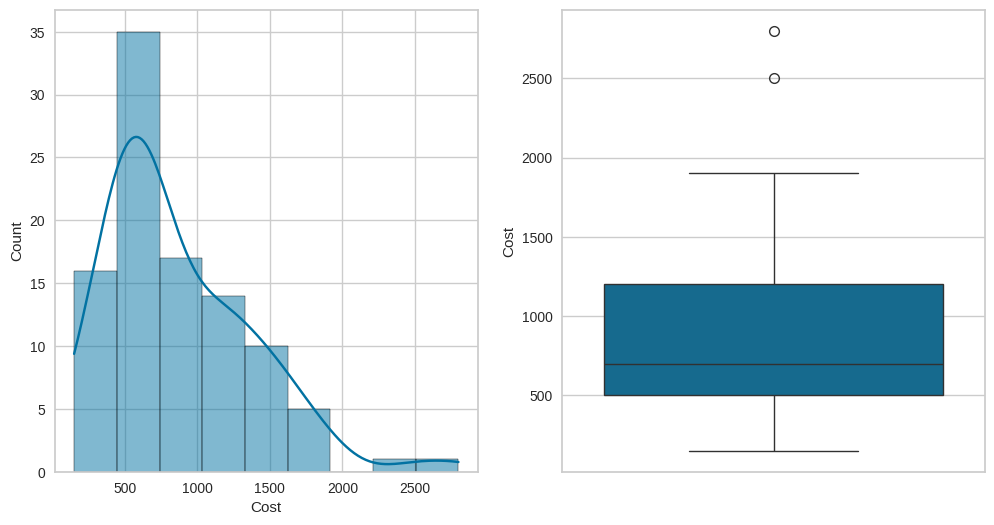

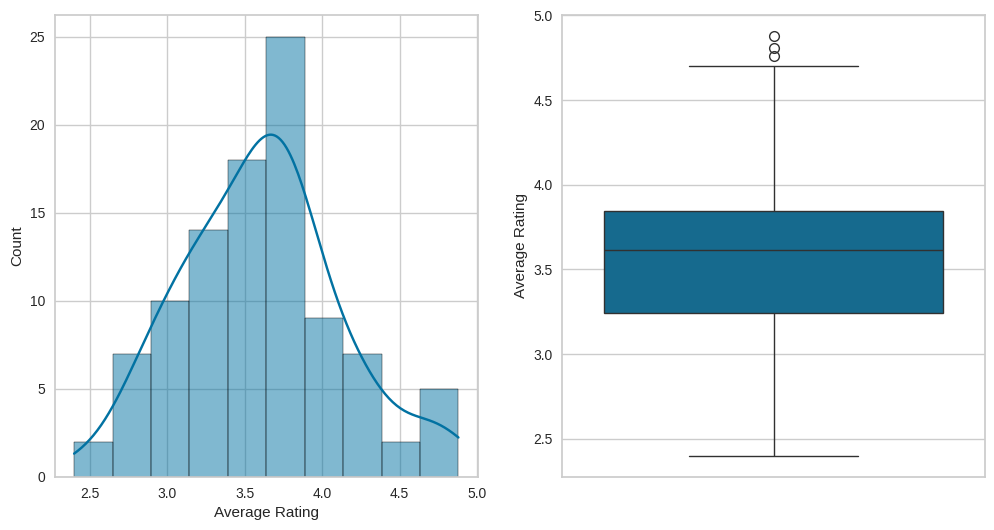

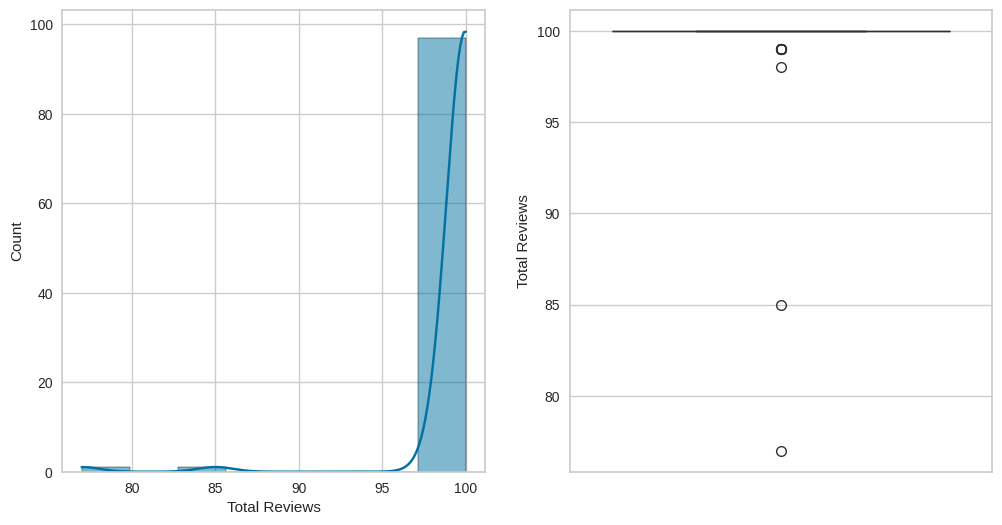

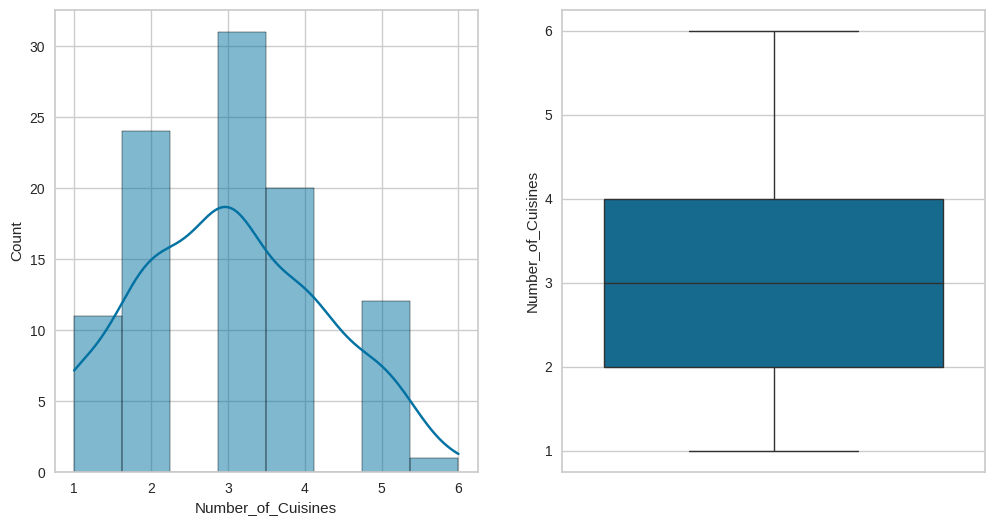

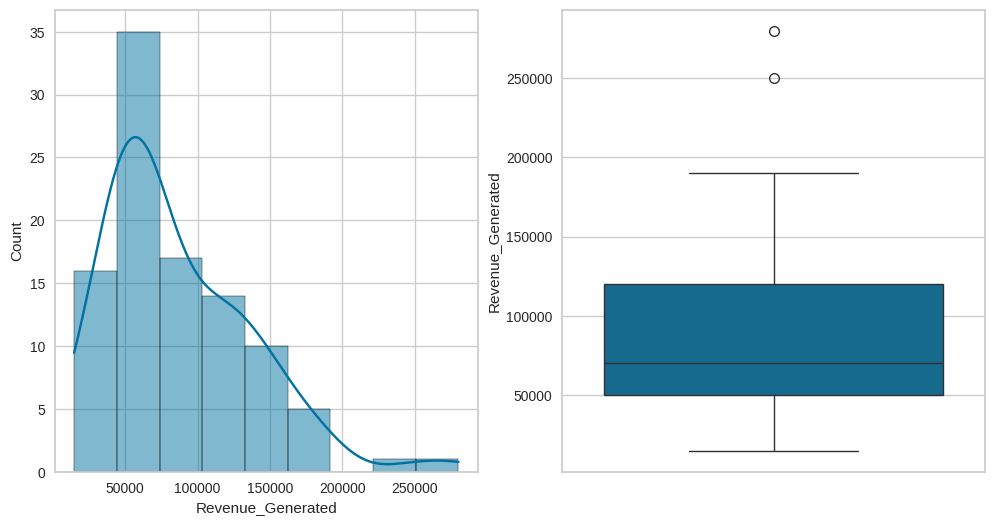

In [67]:
# Checking for outliers and distributions.

# Using Numerical columns
data=merge_df.select_dtypes(exclude="object")

# For loop to covert columns into histograms and Boxplots to understand the distribution
for i in data.columns:
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  sns.histplot(data[i],kde=True)
  plt.subplot(122)
  sns.boxplot(data[i])


In [68]:
# Check outlier percentage
col = merge_df.select_dtypes(exclude='object').columns

for i in col:
  mean = merge_df[i].mean()  # Mean of the column
  std = merge_df[i].std()    # Standard deviation of the column
  outlier_pos = mean + 3*std  # Upper bound for outliers
  outlier_neg = mean - 3*std  # Lower bound for outliers
  print(round(merge_df.loc[~((merge_df[i]<=outlier_pos) & (merge_df[i]>=outlier_neg))].shape[0]/merge_df.shape[0]*100,2),f'% outliers in {i} column')



2.02 % outliers in Cost column
0.0 % outliers in Average Rating column
2.02 % outliers in Total Reviews column
0.0 % outliers in Number_of_Cuisines column
2.02 % outliers in Revenue_Generated column


In [69]:
# Not removing the outlier as records are very low in number , Will cap the outliers in cost ,and total reviews column

def cap_outliers(df, column, iqr_multiplier=1.5):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Cap the outliers: if the value is below the lower bound, set to the lower bound;
    # if the value is above the upper bound, set to the upper bound.
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df

# Example usage
columns_to_cap = ['Cost', 'Total Reviews', 'Revenue_Generated',"Average Rating"]

# Cap outliers in each of the specified columns using a multiplier of 1.5
for column in columns_to_cap:
    merge_df = cap_outliers(merge_df, column, iqr_multiplier=1.5)  # Default multiplier of 1.5





##### What all outlier treatment techniques have you used and why did you use those techniques?

Used IQR method to find and cap the outliers.

### 3. Categorical Encoding

In [70]:
# Converting the cusisnes columns into list

merge_df['Cuisines'] = merge_df['Cuisines'].apply(lambda x: list(set([cuisine.strip() for cuisine in x.split(',')])))


In [71]:
# Create a set of all unique cuisines in the dataset
all_cuisines = set([cuisine for sublist in merge_df['Cuisines'] for cuisine in sublist])

# Create a binary column for each cuisine
for cuisine in all_cuisines:
    merge_df[cuisine] = merge_df['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)

# Drop the original 'Cuisines' column
merge_df = merge_df.drop('Cuisines', axis=1)


merge_df.head(3)

Name    Cost                                        Timings  \
0  Beyond Flavours   800.0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   
1         Paradise   800.0                                 11 AM to 11 PM   
2         Flechazo  1300.0          11:30 AM to 4:30 PM, 6:30 PM to 11 PM   

   Average Rating  Total Reviews  Number_of_Cuisines  Revenue_Generated  \
0            4.28          100.0                   6            80000.0   
1            4.70          100.0                   3            80000.0   
2            4.66          100.0                   4           130000.0   

   Wraps  Modern Indian  Street Food  ...  Italian  Mughlai  Burger  \
0      0              0            0  ...        0        0       0   
1      0              0            0  ...        0        0       0   
2      0              0            0  ...        0        0       0   

   Hyderabadi  Momos  Indonesian  South Indian  American  Ice Cream  Seafood  
0           0      0           0             1         0          0        0  
1           0      0           0             0         0          0        0  
2           0      0           0             0         0          0        0  

[3 rows x 49 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding technique is used here for cuisines column since it does not have any order and one-hot encoding is the best choice to transform these categorical variables into a format that machine learning models can use effectively.
 Since cuisines play an important role in clustering restaurants, representing each cuisine as a separate binary feature ensures that the machine learning algorithm can treat the presence of each cuisine as a distinct factor when determining clusters or patterns.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [72]:
# creating copy of merge_df here
new_df=merge_df.copy()

In [73]:
new_df=new_df.select_dtypes(include=['float64','int64'])
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns

    vif_values = []
    for i in range(len(df.columns)):
        vif_values.append(variance_inflation_factor(df.values, i))

    vif_data['VIF'] = vif_values

    return vif_data

vif_result=calculate_vif(new_df)

vif_result


# We can observe VIF values as inf , due to mulitcollinearity created by one-hot encoding

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature         VIF
0                 Cost  460.835313
1       Average Rating    2.410011
2        Total Reviews  118.158673
3   Number_of_Cuisines         inf
4    Revenue_Generated  478.360428
5                Wraps         inf
6        Modern Indian         inf
7          Street Food         inf
8               Andhra         inf
9               Bakery         inf
10             Biryani         inf
11            European         inf
12       Mediterranean         inf
13        North Indian         inf
14                Cafe         inf
15              Juices         inf
16               Salad         inf
17           Beverages         inf
18               Kebab         inf
19            Lebanese         inf
20               Pizza         inf
21        Healthy Food         inf
22                Goan         inf
23           Fast Food         inf
24                Thai         inf
25             Chinese         inf
26             Mexican         inf
27                 BBQ         inf
28               Asian         inf
29         Finger Food         inf
30            Japanese         inf
31         Continental         inf
32               Sushi         inf
33             Spanish         inf
34       North Eastern         inf
35             Arabian         inf
36            Desserts         inf
37             Italian         inf
38             Mughlai         inf
39              Burger         inf
40          Hyderabadi         inf
41               Momos         inf
42          Indonesian         inf
43        South Indian         inf
44            American         inf
45           Ice Cream         inf
46             Seafood         inf

In [74]:
# droping 1 column of one hot encoding  to avoid multi colliniearity
new_df.drop(columns=['Asian'],axis=1,inplace=True)


new_df=new_df.select_dtypes(include=['float64','int64'])
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns

    vif_values = []
    for i in range(len(df.columns)):
        vif_values.append(variance_inflation_factor(df.values, i))

    vif_data['VIF'] = vif_values

    return vif_data

vif_result=calculate_vif(new_df)

vif_result.sort_values(by='VIF',ascending=False)





Feature         VIF
4    Revenue_Generated  478.360428
0                 Cost  460.835313
2        Total Reviews  118.158673
3   Number_of_Cuisines   34.678023
13        North Indian    9.083420
31               Sushi    8.926637
25             Chinese    7.858541
36             Italian    7.798479
30         Continental    6.727234
24                Thai    5.811668
41          Indonesian    5.563703
35            Desserts    5.524198
12       Mediterranean    5.095283
10             Biryani    4.740146
40               Momos    4.486865
23           Fast Food    4.379393
42        South Indian    4.059275
29            Japanese    3.640968
6        Modern Indian    3.505283
43            American    3.452653
16               Salad    3.286447
9               Bakery    3.082849
38              Burger    2.936795
37             Mughlai    2.882891
45             Seafood    2.836783
14                Cafe    2.759268
18               Kebab    2.719759
22                Goan    2.676101
11            European    2.616757
17           Beverages    2.487868
8               Andhra    2.428685
1       Average Rating    2.410011
27                 BBQ    2.392167
39          Hyderabadi    2.188768
32             Spanish    2.062826
7          Street Food    2.030321
44           Ice Cream    1.978092
15              Juices    1.903012
34             Arabian    1.886516
5                Wraps    1.779792
26             Mexican    1.736471
28         Finger Food    1.639229
21        Healthy Food    1.627145
33       North Eastern    1.565472
20               Pizza    1.441257
19            Lebanese    1.382058

#### 2. Feature Selection

In [75]:
merge_df.head(1)

Name   Cost                                        Timings  \
0  Beyond Flavours  800.0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   

   Average Rating  Total Reviews  Number_of_Cuisines  Revenue_Generated  \
0            4.28          100.0                   6            80000.0   

   Wraps  Modern Indian  Street Food  ...  Italian  Mughlai  Burger  \
0      0              0            0  ...        0        0       0   

   Hyderabadi  Momos  Indonesian  South Indian  American  Ice Cream  Seafood  
0           0      0           0             1         0          0        0  

[1 rows x 49 columns]

In [76]:
# Dropping only Name and Timings columns
merge_df.drop(columns=['Name','Timings'],axis=1,inplace=True)

merge_df.head(2)

Cost  Average Rating  Total Reviews  Number_of_Cuisines  \
0  800.0            4.28          100.0                   6   
1  800.0            4.70          100.0                   3   

   Revenue_Generated  Wraps  Modern Indian  Street Food  Andhra  Bakery  ...  \
0            80000.0      0              0            0       0       0  ...   
1            80000.0      0              0            0       0       0  ...   

   Italian  Mughlai  Burger  Hyderabadi  Momos  Indonesian  South Indian  \
0        0        0       0           0      0           0             1   
1        0        0       0           0      0           0             0   

   American  Ice Cream  Seafood  
0         0          0        0  
1         0          0        0  

[2 rows x 47 columns]

##### What all feature selection methods have you used  and why?

* Not Droped any feature , since PCA will be used to further to reduce the multi coolinearity and dimensions.

* Name and Timings columns droped as data type is object and nothing usefull and common pattern was extracted from Timings

##### Which all features you found important and why?

No numerical features removed as of now , since PCA will be used further to reduce the multicollinearity and dimensions.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Log Transformations will be used to reduce the scale of numerical columns other than dummy ones to stabalise the variance and makes more suitable for machine learning algorithms.

In [77]:
# Columns to transform
columns_to_transform = ['Cost', 'Revenue_Generated', 'Total Reviews','Average Rating','Number_of_Cuisines']

# Apply the log transformation with a small constant to handle zero values
for column in columns_to_transform:
    merge_df[column] = np.log(merge_df[column] + 1)

merge_df.head(1)

Cost  Average Rating  Total Reviews  Number_of_Cuisines  \
0  6.685861        1.663926       4.615121             1.94591   

   Revenue_Generated  Wraps  Modern Indian  Street Food  Andhra  Bakery  ...  \
0          11.289794      0              0            0       0       0  ...   

   Italian  Mughlai  Burger  Hyderabadi  Momos  Indonesian  South Indian  \
0        0        0       0           0      0           0             1   

   American  Ice Cream  Seafood  
0         0          0        0  

[1 rows x 47 columns]

### 6. Data Scaling

In [78]:
# Initialize the StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Cost','Average Rating','Total Reviews','Revenue_Generated','Number_of_Cuisines']

# Apply StandardScaler
merge_df[columns_to_scale] = scaler.fit_transform(merge_df[columns_to_scale])

merge_df

Cost  Average Rating  Total Reviews  Number_of_Cuisines  \
0   0.145433        1.307293            0.0            1.877056   
1   0.145433        2.006029            0.0            0.145084   
2   0.958534        1.941740            0.0            0.835698   
3   0.145433       -0.760099            0.0            1.399971   
4   0.824458        1.410446            0.0            1.399971   
..       ...             ...            ...                 ...   
94 -1.014469       -1.458342            0.0           -0.745272   
95 -0.336140        0.494082            0.0            0.145084   
96  1.456516        1.596587            0.0           -0.745272   
97 -1.014469       -0.051097            0.0           -2.000158   
98  0.519093        0.331996            0.0           -0.745272   

    Revenue_Generated  Wraps  Modern Indian  Street Food  Andhra  Bakery  ...  \
0            0.154313      0              0            0       0       0  ...   
1            0.154313      0              0            0       0       0  ...   
2            0.966484      0              0            0       0       0  ...   
3            0.154313      0              0            0       0       0  ...   
4            0.832586      0              0            0       0       0  ...   
..                ...    ...            ...          ...     ...     ...  ...   
94          -1.005193      0              0            0       0       0  ...   
95          -0.326927      0              0            0       0       0  ...   
96           1.463736      0              0            0       0       0  ...   
97          -1.005193      0              0            0       0       0  ...   
98           0.527593      0              0            0       0       0  ...   

    Italian  Mughlai  Burger  Hyderabadi  Momos  Indonesian  South Indian  \
0         0        0       0           0      0           0             1   
1         0        0       0           0      0           0             0   
2         0        0       0           0      0           0             0   
3         0        0       0           0      0           0             0   
4         0        0       0           0      0           0             0   
..      ...      ...     ...         ...    ...         ...           ...   
94        0        0       0           0      0           0             0   
95        0        1       0           1      0           0             0   
96        0        0       0           0      0           0             0   
97        0        0       0           0      0           0             0   
98        0        0       0           0      0           0             0   

    American  Ice Cream  Seafood  
0          0          0        0  
1          0          0        0  
2          0          0        0  
3          0          0        1  
4          0          0        0  
..       ...        ...      ...  
94         0          0        0  
95         0          0        0  
96         0          0        0  
97         0          0        0  
98         0          0        1  

[99 rows x 47 columns]

##### Which method have you used to scale you data and why?

Standard Scalar is used here to scale the data , since already numerical columns were following normal distribution.
As the data is already normal, applying Standard Scaler preserves the relationships between the data points without distorting the distribution. This ensures that the features are standardized but remain in a form that is ideal for most machine learning models.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes , since there are 47 columns in the final data set multiple coorelation exists.Model complexity will lead to longer time to train the model. Using PCA reduce chance of overfitting, curse of dimensionality can be avoided.

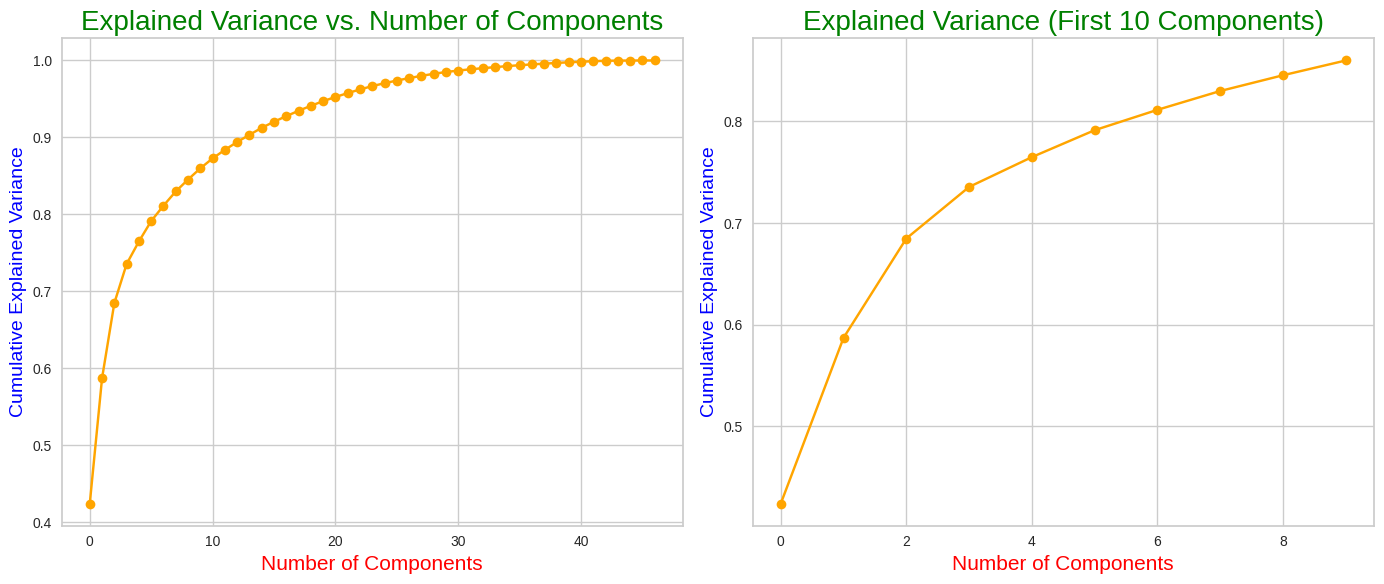

In [79]:
# DImensionality Reduction (If needed)

# Yes need , dimensions are high and even coorelation exist


# Perform PCA
pca = PCA()
pca.fit(merge_df)

# Create subplots to display two different views
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Cumulative Explained Variance (all components)
axs[0].plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
axs[0].set_xlabel('Number of Components', size=15, color='red')
axs[0].set_ylabel('Cumulative Explained Variance', size=14, color='blue')
axs[0].set_title('Explained Variance vs. Number of Components', size=20, color='green')

# Plot 2: Cumulative Explained Variance for the first 10 components
axs[1].plot(np.cumsum(pca.explained_variance_ratio_)[:10], marker='o', color='orange')
axs[1].set_xlabel('Number of Components', size=15, color='red')
axs[1].set_ylabel('Cumulative Explained Variance', size=14, color='blue')
axs[1].set_title('Explained Variance (First 10 Components)', size=20, color='green')

# Show plots
plt.tight_layout()
plt.show()

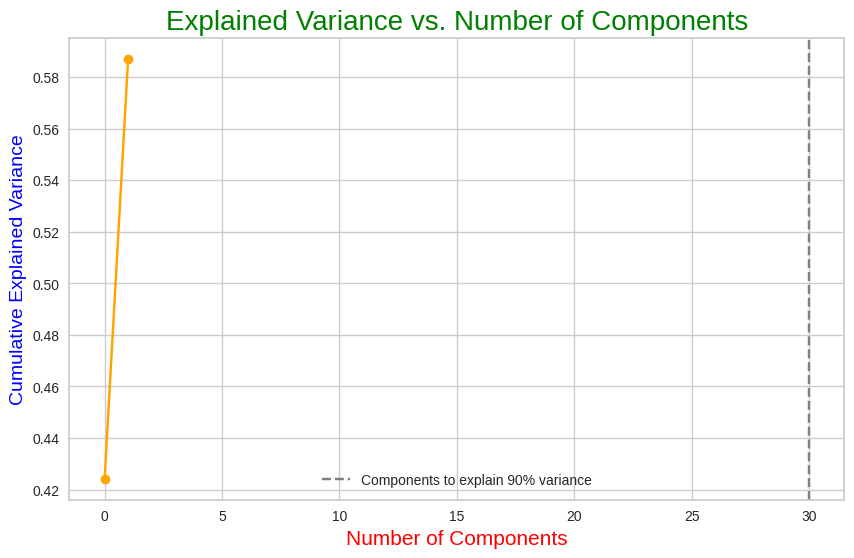

Original shape of the data: (99, 47)
Transformed shape after PCA: (99, 2)
Explained variance ratio for each component: [0.42419985 0.16298492]
Total explained variance: 0.5871847631482237


In [80]:
# Now transorming data set with 2 component
pca = PCA(n_components=2)
X_pca = pca.fit_transform(merge_df)

# Plot  explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Number of Components', size=15, color='red')
plt.ylabel('Cumulative Explained Variance', size=14, color='blue')
plt.title('Explained Variance vs. Number of Components', size=20, color='green')

# Mark the point where 90% of the variance is explained
threshold = 0.90
plt.axvline(x=30, linestyle='--', color='gray', label=f'Components to explain {int(threshold*100)}% variance')
plt.legend()
plt.show()

# shape of the transformed data
print(f"Original shape of the data: {merge_df.shape}")
print(f"Transformed shape after PCA: {X_pca.shape}")

# Check how much variance each principal component explains
print("Explained variance ratio for each component:", pca.explained_variance_ratio_)
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_)}")



##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

The dimensionality reduction technique used in this dataset is Principal Component Analysis (PCA).

PCA is used to reduce the number of features (columns) in the dataset while retaining most of the original variance. This is helpful when the dataset has a high number of features, as it helps simplify the data, making it easier to visualize, analyze, and model, while still preserving the essential information.

* Original Shape: The original dataset has 99 samples (rows) and 47 features (columns).

* Transformed Shape After PCA: After applying PCA with 2 components, the dataset is reduced to 99 samples and 2 components (features), which means we have effectively reduced the dimensionality of the data from 47 to 2 for visualization or further analysis.

Explained Variance Ratio for Each Component:

* The first component explains 42.42% of the total variance in the data.
* The second component explains 16.30% of the total variance in the data.


Total Explained Variance: By selecting the first two components, we are capturing a 58.72% of the total variance in the data. While this is not a high proportion (as typically around 80-90% variance is desired), it is sufficient for visualization purposes.



## ***7. ML Model Implementation*** - Clustering Restaurants

### ML Model - 1

In [81]:
# ML Model - 1 Implementation

# Fit the Algorithm
cluster_range=range(2,20)

# Variables to store results
silhouette_scores = []
wcss_score = []

# Calculating silhouette scores and inertia (within-cluster sum of squares) for different cluster numbers
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit the Algorithm
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_

# Silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    wcss_score.append(kmeans.inertia_)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

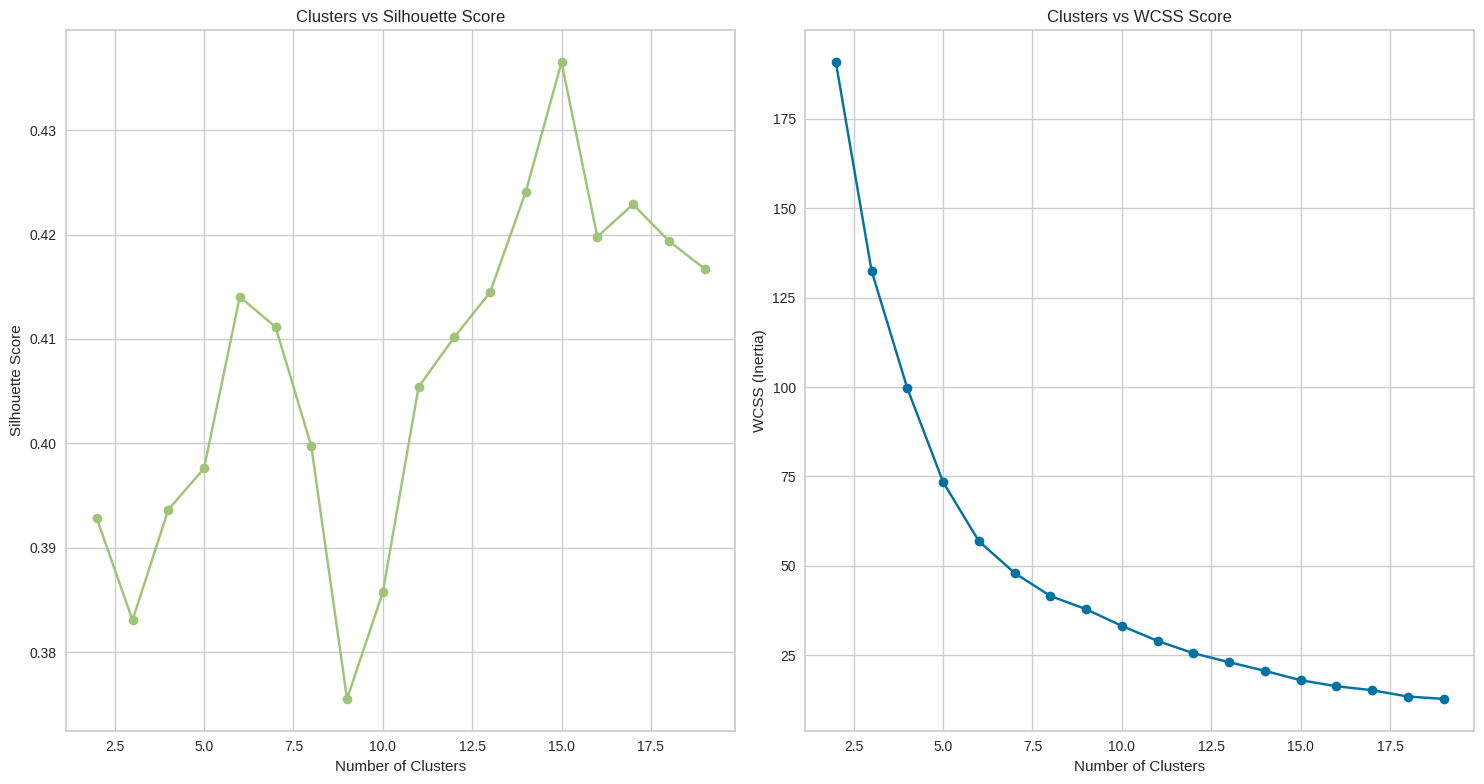

In [82]:
# Visualize Clusters vs Silhouette Score
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', color='g')
plt.title('Clusters vs Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Visualize Clusters vs WCSS Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, wcss_score, marker='o', color='b')
plt.title('Clusters vs WCSS Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

**Observations:**
* Based on the Silhouette Score graph, the highest score is observed at 15 clusters, which suggests the possibility of overfitting. While 5 clusters, as indicated by the Elbow Method, could also be a viable option, it still introduces more complexity than necessary and may lead to overly detailed, hard-to-interpret segments. On the other hand, choosing 3 clusters strikes a balance between simplicity and meaningful customer segmentation. It provides clear, actionable insights without overfitting, making it the optimal choice for a straightforward and effective segmentation strategy.

#### 2. Cross- Validation & Hyperparameter Tuning

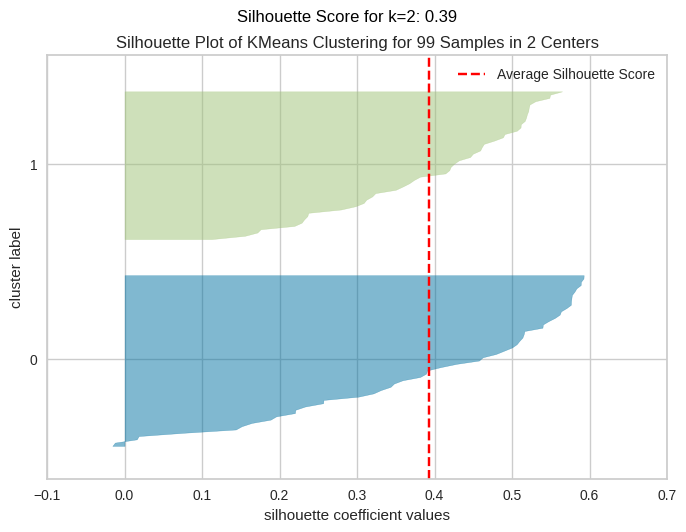

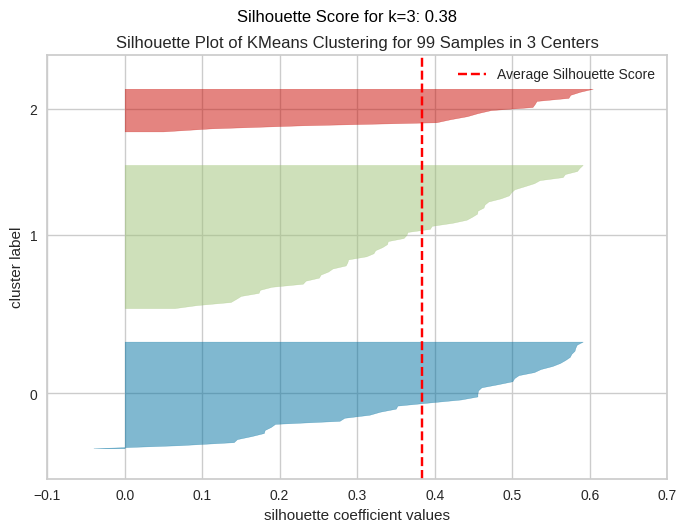

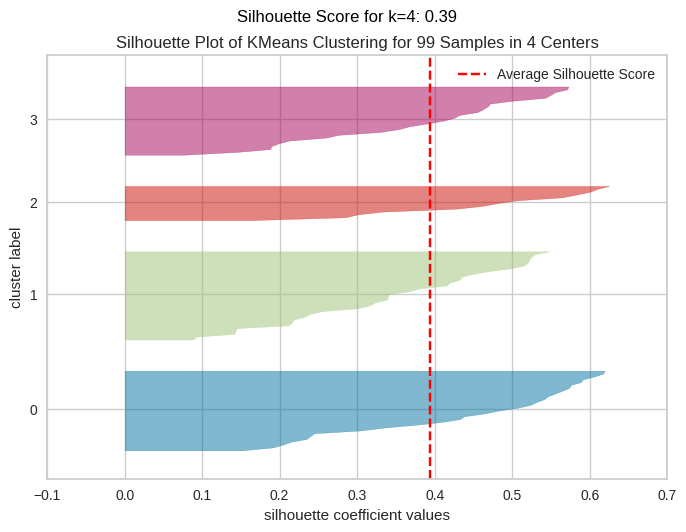

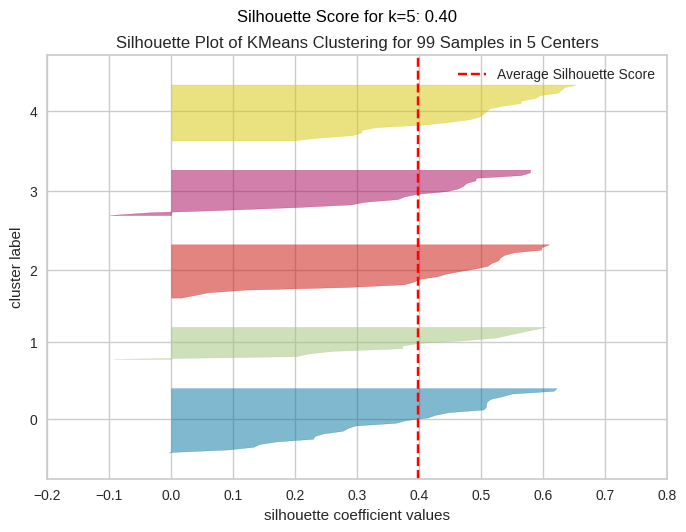

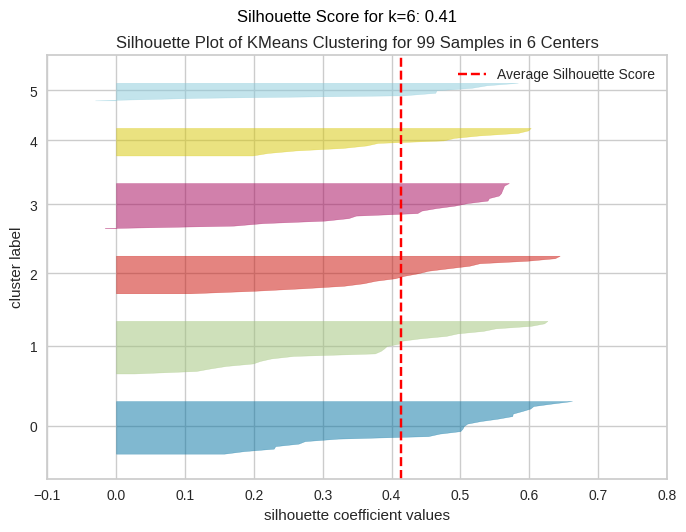

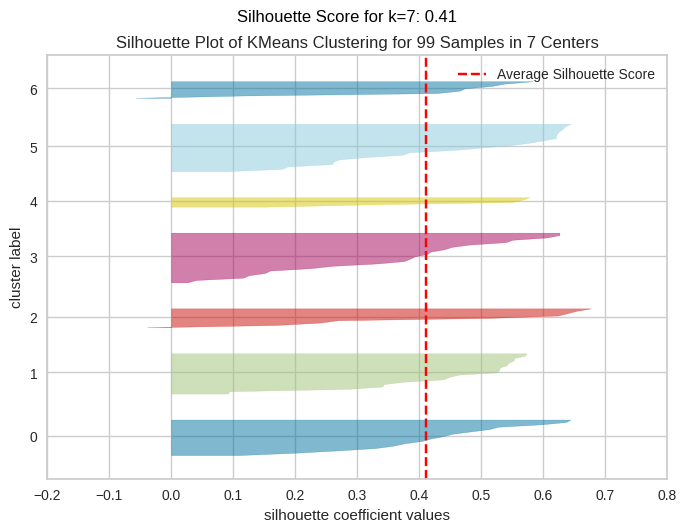

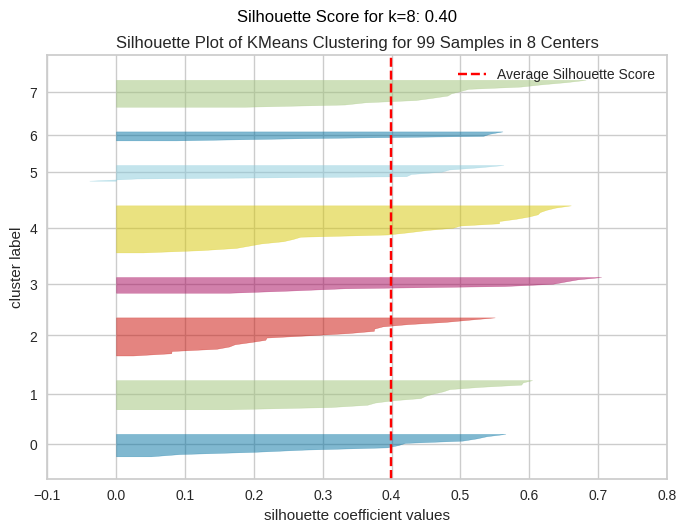

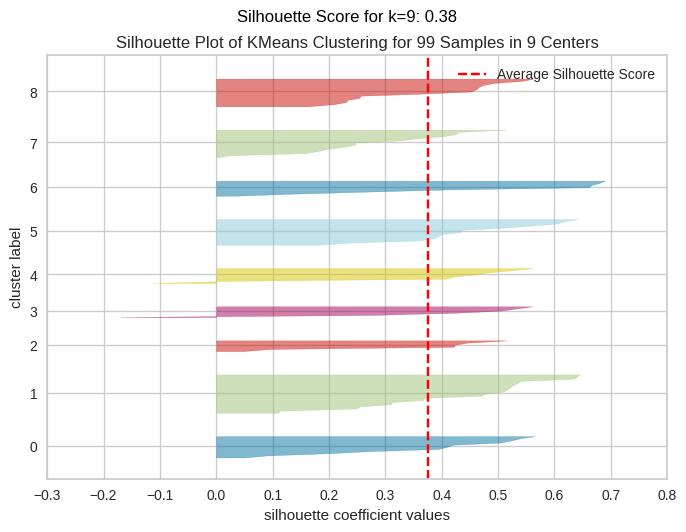

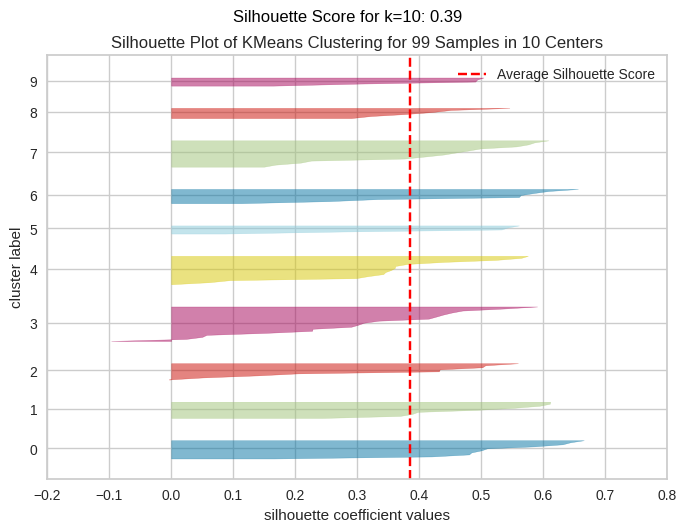

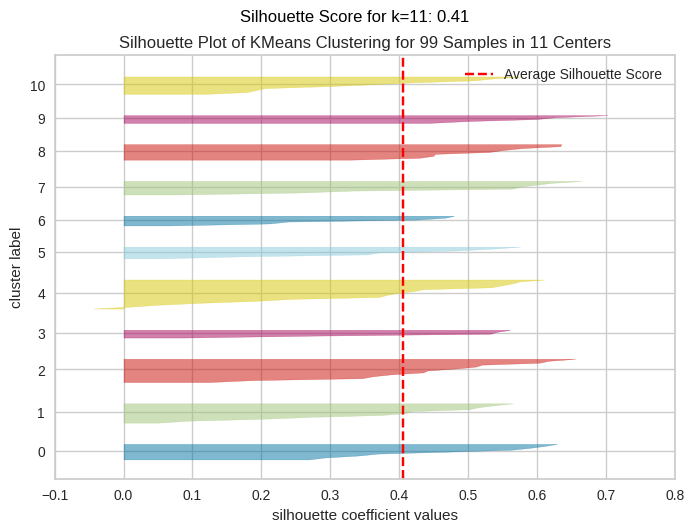

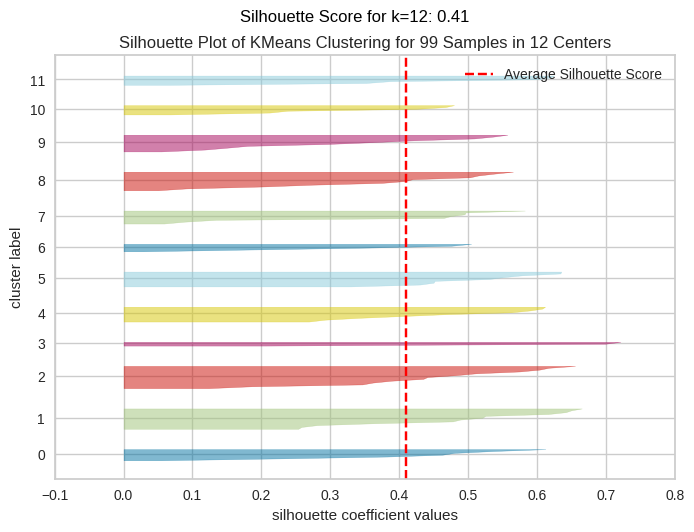

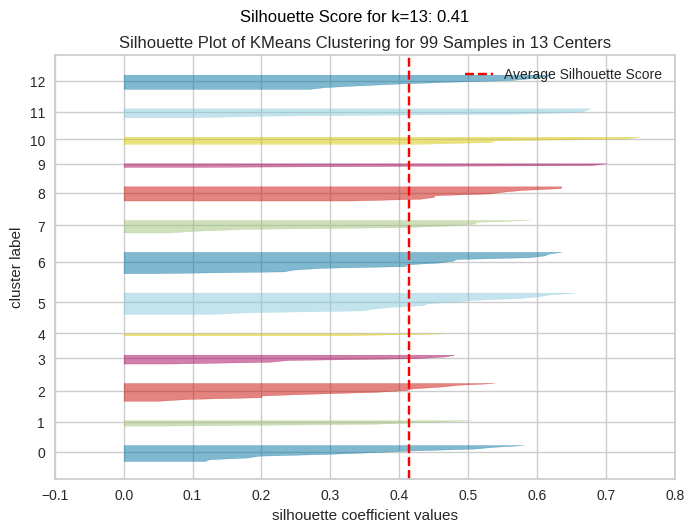

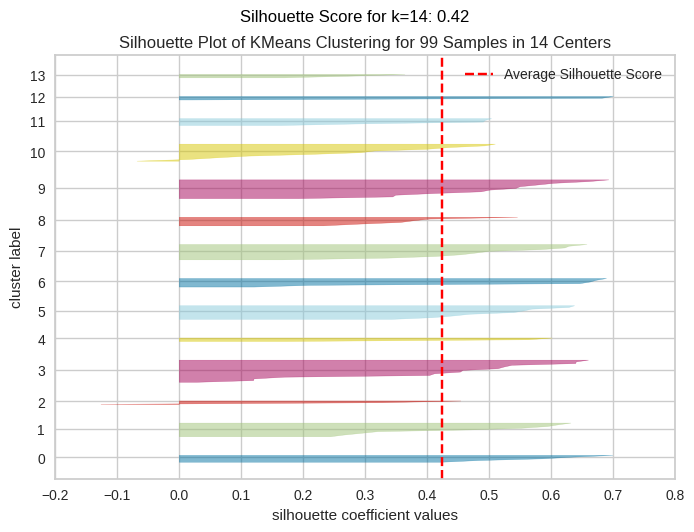

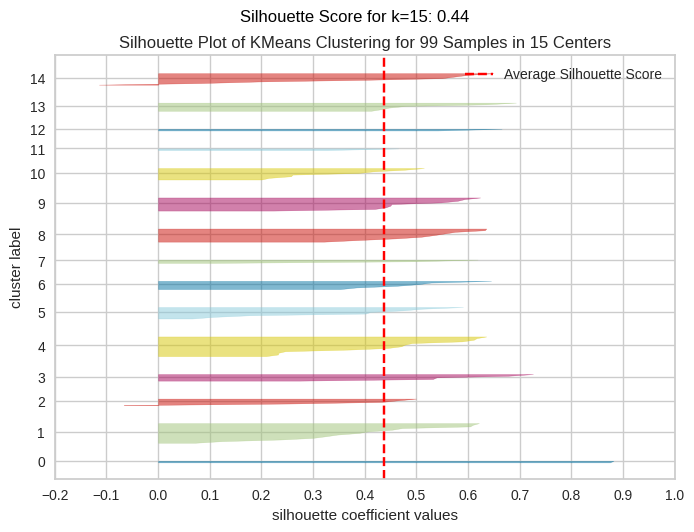

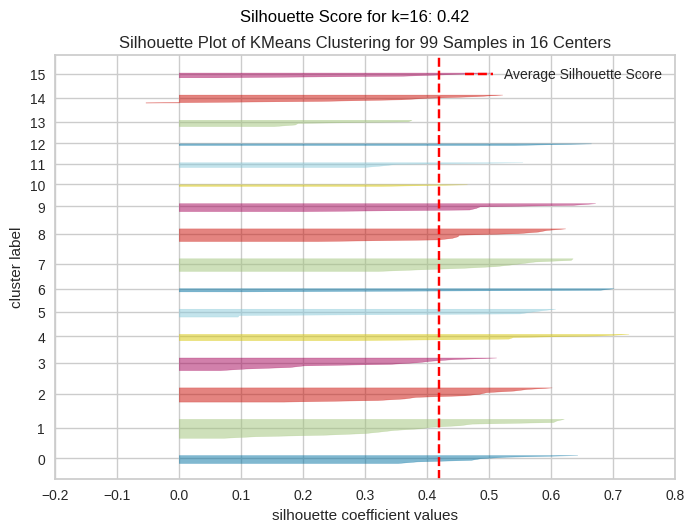

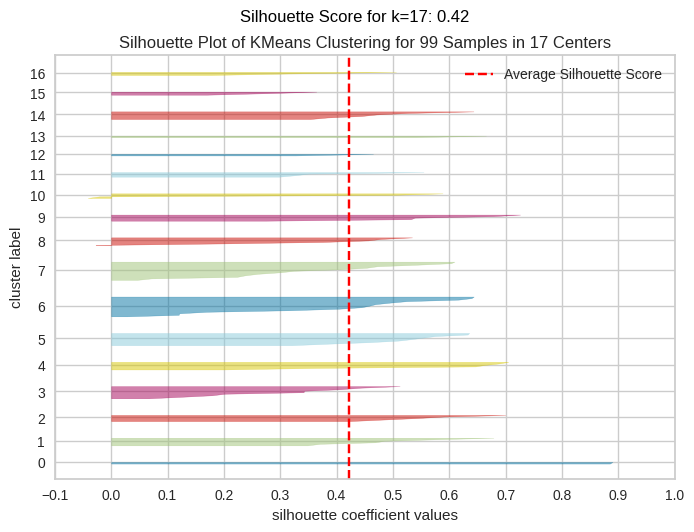

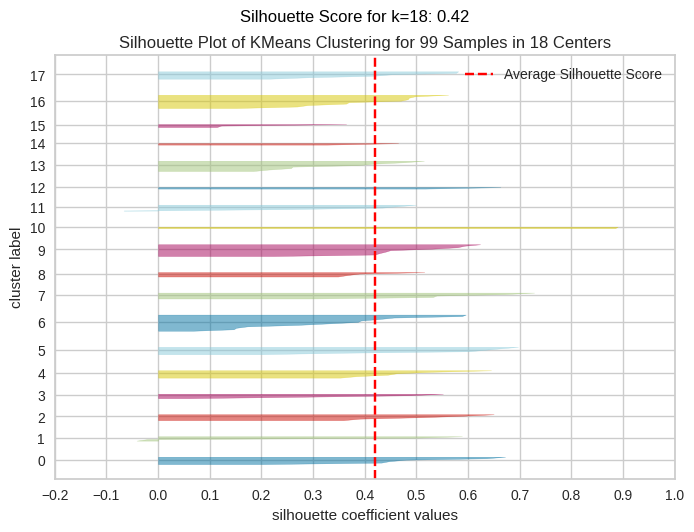

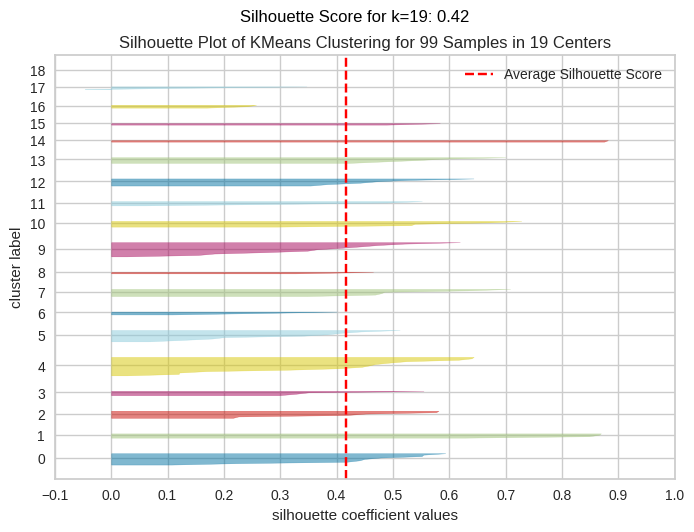

In [83]:
# Visualising the  Silhouette score for clarity and exact score
for k in cluster_range:
    # Create and fit KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)

    # Create a silhouette visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_pca)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

    # Display Silhouette Score at the top of the plot using Matplotlib
    plt.title(f'Silhouette Score for k={k}: {silhouette_avg:.2f}')

    # Annotate the silhouette score at the top of the graph
    plt.figtext(0.5, 0.95, f'Silhouette Score for k={k}: {silhouette_avg:.2f}', ha='center', va='center', fontsize=12, color='black')

    # Show the visualizer with the silhouette score title
    visualizer.show()

* Based on above graphs as well , 3 clusters seems correct option.

In [84]:
# Convert the PCA result into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Perform K-Means clustering on the PCA-transformed data (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)  # k=3 clusters
kmeans.fit(X_pca)  # Fit KMeans on PCA-transformed data

# Add the cluster labels to the PCA-transformed data
X_pca_df['Cluster'] = kmeans.labels_  # Add the labels to the DataFrame


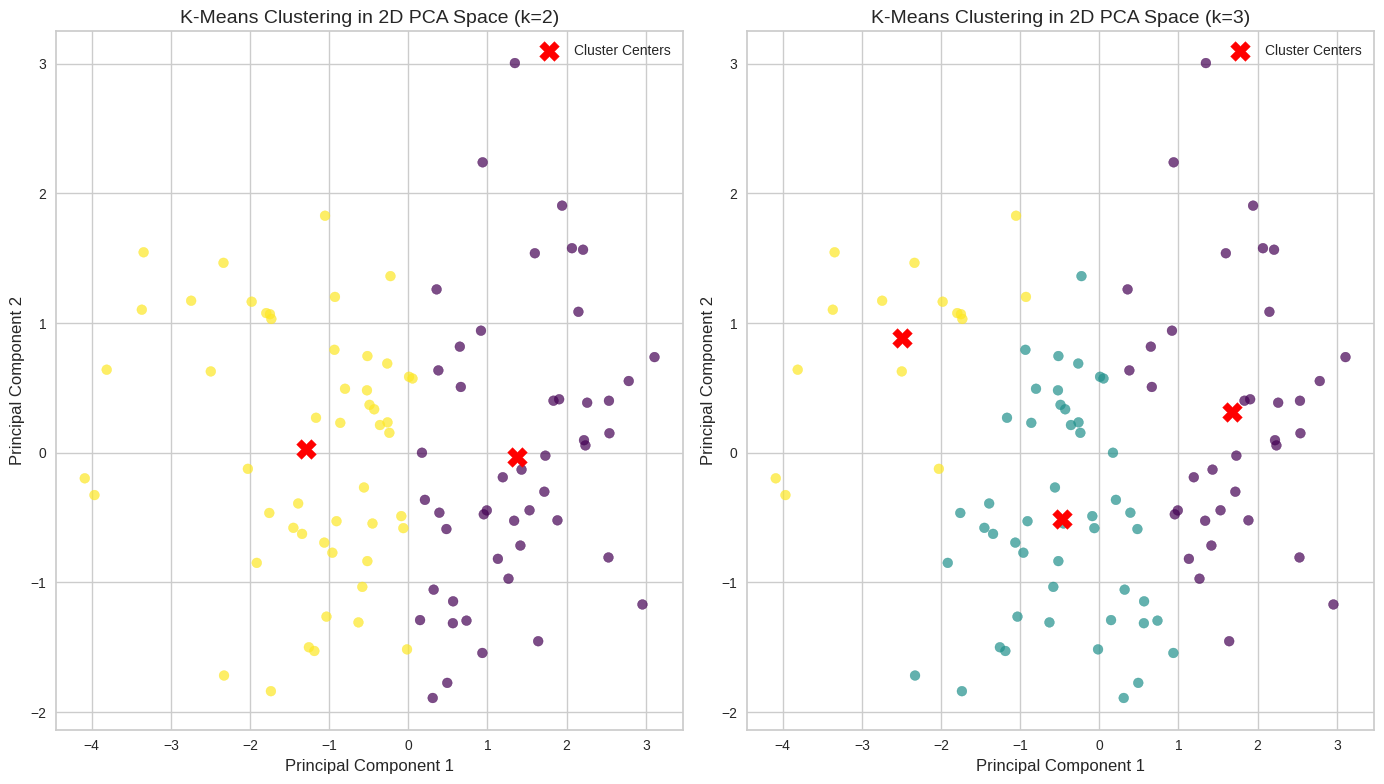

Silhouette Score for k=2: 0.40
Silhouette Score for k=3: 0.38


In [85]:

# Plotting for k=2 and k=3 clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # Create subplots (1 row, 2 columns)

# K-Means for k=2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_pca)

# Scatter plot for k=2
axes[0].scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=kmeans_2.labels_, cmap='viridis', s=50, alpha=0.7)
axes[0].set_xlabel('Principal Component 1', fontsize=12)
axes[0].set_ylabel('Principal Component 2', fontsize=12)
axes[0].set_title('K-Means Clustering in 2D PCA Space (k=2)', fontsize=14)

# Plot the cluster centers for k=2
centers_2 = kmeans_2.cluster_centers_
axes[0].scatter(centers_2[:, 0], centers_2[:, 1], marker='X', s=200, c='red', label='Cluster Centers')
axes[0].legend()

# K-Means for k=3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X_pca)

# Scatter plot for k=3
axes[1].scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=kmeans_3.labels_, cmap='viridis', s=50, alpha=0.7)
axes[1].set_xlabel('Principal Component 1', fontsize=12)
axes[1].set_ylabel('Principal Component 2', fontsize=12)
axes[1].set_title('K-Means Clustering in 2D PCA Space (k=3)', fontsize=14)

# Plot the cluster centers for k=3
centers_3 = kmeans_3.cluster_centers_
axes[1].scatter(centers_3[:, 0], centers_3[:, 1], marker='X', s=200, c='red', label='Cluster Centers')
axes[1].legend()


plt.tight_layout()
plt.show()

# Silhouette scores for both k=2 and k=3
silhouette_avg_2 = silhouette_score(X_pca, kmeans_2.labels_)
silhouette_avg_3 = silhouette_score(X_pca, kmeans_3.labels_)

print(f"Silhouette Score for k=2: {silhouette_avg_2:.2f}")
print(f"Silhouette Score for k=3: {silhouette_avg_3:.2f}")


In [86]:
# Add the cluster labels to the original dataset
data_with_clusters = data.copy()  # Assuming `data` is your original DataFrame
data_with_clusters['Cluster'] = kmeans.labels_


In [87]:
# Analyzing each cluster's features (mean values)
cluster_characteristics = {}
for cluster in range(3):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    cluster_characteristics[cluster] = cluster_data[['Cost', 'Average Rating', 'Total Reviews', 'Number_of_Cuisines', 'Revenue_Generated']].mean()

# Creating a DataFrame for easier visualization of cluster characteristics
cluster_characteristics_df = pd.DataFrame(cluster_characteristics)

# Show the cluster characteristics DataFrame
print(cluster_characteristics_df)


                                0             1             2
Cost                  1415.277778    637.500000    316.666667
Average Rating           3.962435      3.355838      3.542744
Total Reviews           99.583333     99.416667     99.800000
Number_of_Cuisines       3.500000      3.104167      1.533333
Revenue_Generated   140861.111111  63397.916667  31606.666667


In [88]:
# K-Means for k=3 clusters (already fitted above)
centers_3 = kmeans_3.cluster_centers_

# Convert the cluster centers to a DataFrame for easier visualization
cluster_centers_df = pd.DataFrame(centers_3, columns=['PC1', 'PC2'])

# Show the cluster centers
print("\nCluster Centers for k=3:")
print(cluster_centers_df)



Cluster Centers for k=3:
        PC1       PC2
0  1.676447  0.313113
1 -0.477884 -0.511306
2 -2.494244  0.884708


##### Which hyperparameter optimization technique have you used and why?

I used two techniques to determine the optimal number of clusters (k):

- Silhouette Score Visualization: Plotted the Silhouette Score for different values of k to evaluate cluster quality. The highest score was at k=15, but it indicated overfitting and unnecessary complexity.
- WCSS (Elbow Method): Identified the "elbow" point, which suggested k=5 as another possible value, but it still introduced more complexity than needed.

- Optimal k: Based on both techniques, 3 clusters provided the best balance of simplicity and meaningful customer segmentation.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Before Optimization: Higher k values (e.g., k=15) led to overfitting and fragmented clusters, which were hard to interpret.
* After Optimization: 3 clusters resulted in clear, actionable segments (e.g., frequent vs. occasional customers), with a high Silhouette Score confirming well-separated and cohesive clusters.


Evaluation Metrics:
- Silhouette Score: High for k=3, indicating good cluster separation.
- WCSS (Elbow): The elbow was at k=3, supporting the choice.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart

# create a linkage matrix using the PCA-transformed data
Z = linkage(X_pca, method='ward')  #'ward' method minimizes variance within clusters



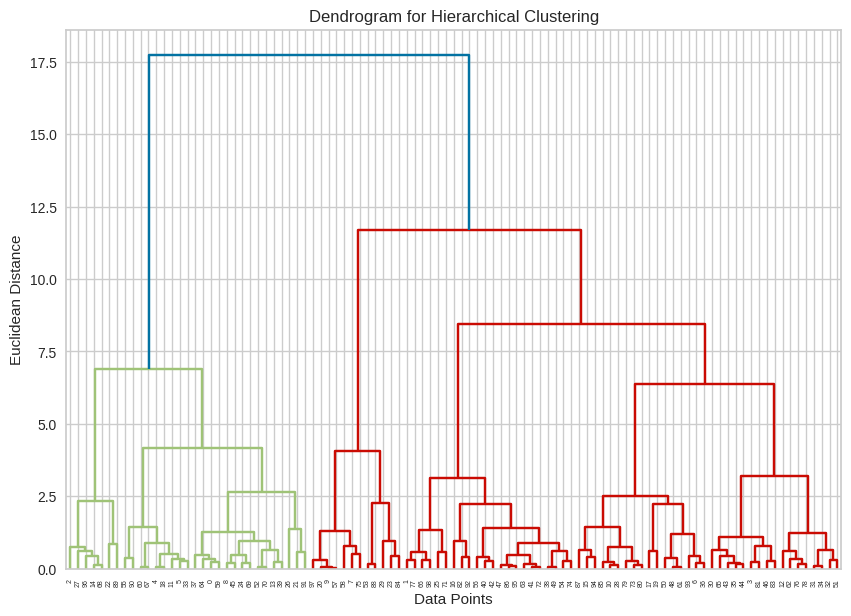

In [90]:
# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

**Observations:**

By looking above at the dendogram , we can observe a longest vertical line blue in color at the right side at which no horizontal line is pasing by. So while stretching a horizontal line through longest vertical line and crossing junction we can conclude the value of K as 2.


#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# Lets use AgglomerativeClustering and find out the K value

# Define the range of cluster sizes to test
cluster_range = range(2, 11)

# Iterate through the cluster range
for n_clusters in cluster_range:
    # Create an AgglomerativeClustering model
    hc = AgglomerativeClustering(n_clusters=n_clusters,linkage='ward')


    # Fit the model and predict the cluster labels
    y_hc = hc.fit_predict(X_pca)

    # Calculate the silhouette score for this number of clusters
    score = silhouette_score(X_pca, y_hc)


    # Print the silhouette score for the current number of clusters
    print(f"For n_clusters = {n_clusters}, silhouette score is {score:.3f}")




For n_clusters = 2, silhouette score is 0.384
For n_clusters = 3, silhouette score is 0.373
For n_clusters = 4, silhouette score is 0.370
For n_clusters = 5, silhouette score is 0.385
For n_clusters = 6, silhouette score is 0.393
For n_clusters = 7, silhouette score is 0.393
For n_clusters = 8, silhouette score is 0.388
For n_clusters = 9, silhouette score is 0.366
For n_clusters = 10, silhouette score is 0.383


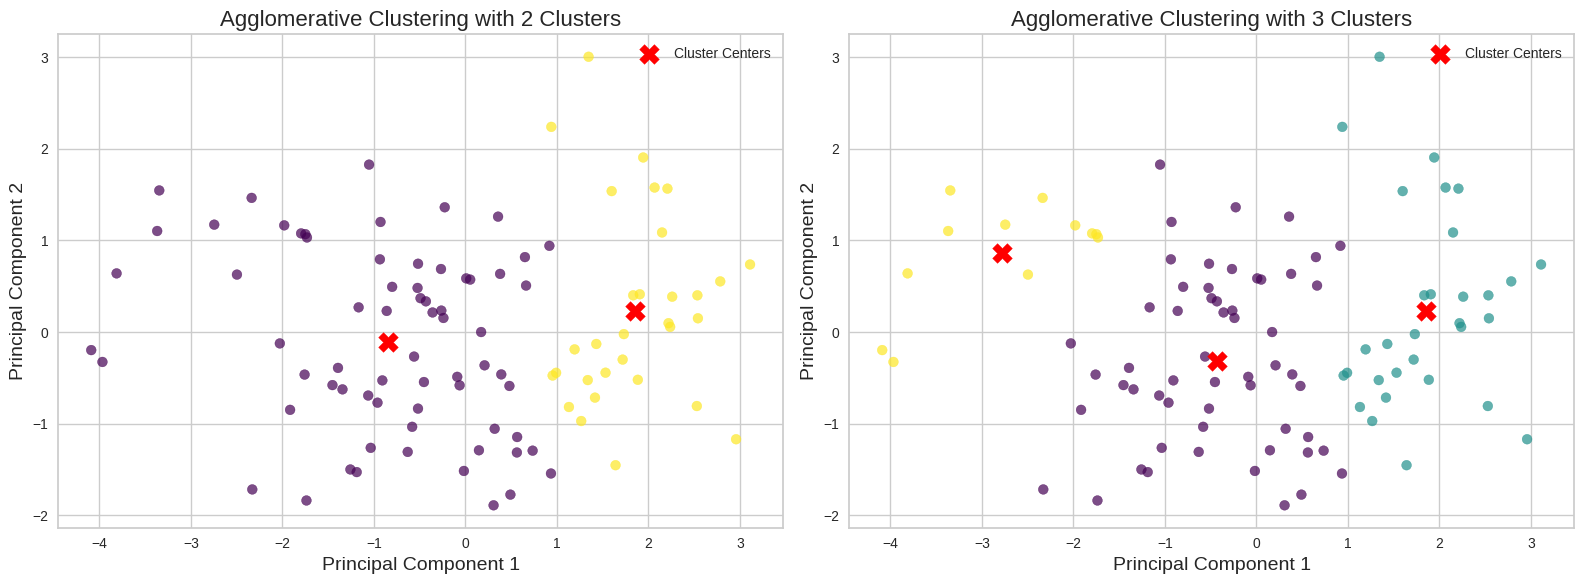

In [92]:
# Apply Agglomerative Clustering with 2 clusters
hc_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_hc_2 = hc_2.fit_predict(X_pca)

# Apply Agglomerative Clustering with 3 clusters
hc_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc_3 = hc_3.fit_predict(X_pca)

# Create the dataframe for PCA with cluster labels
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster_2'] = y_hc_2
X_pca_df['Cluster_3'] = y_hc_3

# Create the 2 subplots to visualize the clusters
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Agglomerative Clustering with 2 clusters
axs[0].scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=X_pca_df['Cluster_2'], cmap='viridis', s=50, alpha=0.7)
axs[0].set_xlabel('Principal Component 1', fontsize=14)
axs[0].set_ylabel('Principal Component 2', fontsize=14)
axs[0].set_title('Agglomerative Clustering with 2 Clusters', fontsize=16)

# Plot centroids for 2 clusters
centroids_2 = X_pca_df.groupby('Cluster_2').mean()[['PC1', 'PC2']]
axs[0].scatter(centroids_2['PC1'], centroids_2['PC2'], marker='X', s=200, c='red', label='Cluster Centers')
axs[0].legend()

# Plot for Agglomerative Clustering with 3 clusters
axs[1].scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=X_pca_df['Cluster_3'], cmap='viridis', s=50, alpha=0.7)
axs[1].set_xlabel('Principal Component 1', fontsize=14)
axs[1].set_ylabel('Principal Component 2', fontsize=14)
axs[1].set_title('Agglomerative Clustering with 3 Clusters', fontsize=16)

# Plot centroids for 3 clusters
centroids_3 = X_pca_df.groupby('Cluster_3').mean()[['PC1', 'PC2']]
axs[1].scatter(centroids_3['PC1'], centroids_3['PC2'], marker='X', s=200, c='red', label='Cluster Centers')
axs[1].legend()

plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Used Agglomerative Clustering to verify the K value and found silhouette score is 0.384 for 2 clusters , however looking the plot above k=3 seems more better. Continuing with the K=3 value.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Similar to KMeans algorithm , optimal K value found via Hierarchical Clustering algorithm is also 3.

### ML Model - 3

In [93]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Define the range of values for 'eps' and 'min_samples'
eps_values = [0.3, 0.5, 0.7, 1.0]  # Experiment with different values for eps
min_samples_values = [3, 5, 7, 10]  # Experiment with different values for min_samples

# Variables to store the best parameters and silhouette score
best_silhouette = -1
best_eps = None
best_min_samples = None
best_cluster_count = None

# Iterate over all combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with current eps and min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)  # X_pca is your PCA-transformed data

        # Count the number of clusters (ignoring noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Calculate the silhouette score only if more than 1 cluster is found
        if n_clusters > 1:
            silhouette = silhouette_score(X_pca, labels)  # Silhouette score of the current clustering
            print(f'eps: {eps}, min_samples: {min_samples}, clusters: {n_clusters}, silhouette: {silhouette}')

            # Update the best parameters if the silhouette score improves
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_cluster_count = n_clusters

# Print the best parameters based on silhouette score
print(f'\nBest parameters - eps: {best_eps}, min_samples: {best_min_samples}, '
      f'clusters: {best_cluster_count}, silhouette: {best_silhouette}')

eps: 0.3, min_samples: 3, clusters: 8, silhouette: -0.027689494203015377
eps: 0.5, min_samples: 3, clusters: 3, silhouette: 0.06713170833717119
eps: 0.5, min_samples: 5, clusters: 4, silhouette: 0.0350808132902355
eps: 0.5, min_samples: 7, clusters: 5, silhouette: 0.04891941667469817
eps: 0.5, min_samples: 10, clusters: 2, silhouette: -0.140031511295726
eps: 0.7, min_samples: 3, clusters: 3, silhouette: 0.17916745303202394
eps: 0.7, min_samples: 5, clusters: 3, silhouette: 0.07767931682624618

Best parameters - eps: 0.7, min_samples: 3, clusters: 3, silhouette: 0.17916745303202394


**Observations**
* We can observe here that silhoute score evaluated with best parameters by DBSACN is 0.1791 and number of  clusters suggested is 3

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# Fiting the model with best parameters , eps= 0.7(radius),min_samples=3(number of nearby points to be considered)
# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps= 0.7,min_samples=3)
labels = dbscan.fit_predict(X_pca)  # X_pca is your PCA-transformed data

# Count the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

Number of clusters: 3


Noise points: 6


<ipython-input-95-d6cb0d465502>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(label / len(unique_labels)), label=f'Cluster {label}')


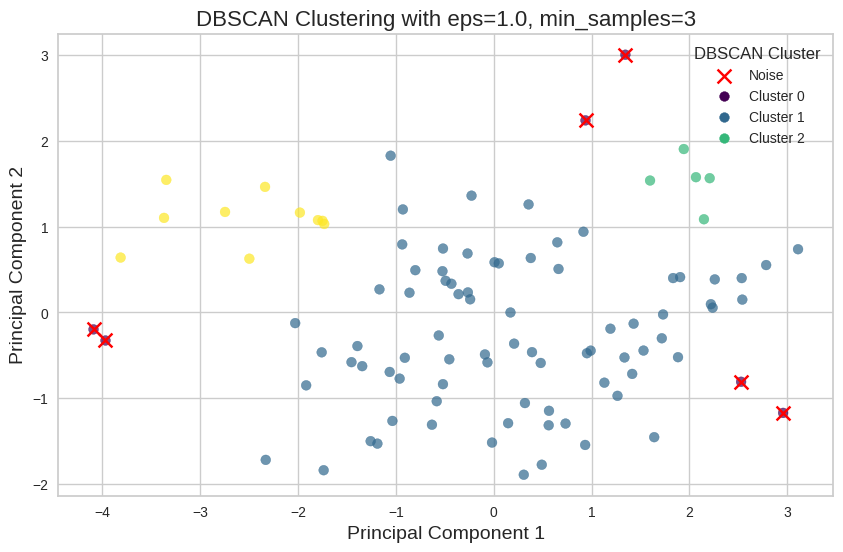

In [95]:
# Plot the clustering results
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Highlight the noise points
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], c='red', marker='x', s=100, label='Noise')

# Add labels and title
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('DBSCAN Clustering with eps=1.0, min_samples=3', fontsize=16)

# Count the number of noise points (points labeled as -1)
noise_count = list(labels).count(-1)
print(f'Noise points: {noise_count}')

# Add the legend with all clusters
# Get unique labels (ignoring noise points labeled as -1)
unique_labels = set(labels) - {-1}

# Add a label for each cluster
for label in unique_labels:
    plt.scatter([], [], c=plt.cm.viridis(label / len(unique_labels)), label=f'Cluster {label}')

# Show the legend (adding the noise label)
plt.legend(title='DBSCAN Cluster', loc='best')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Already a hypertuned model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We can observe here that DSCAN is also predicted k=3 as optimal value , however , we can seen there are 6 noise (outliers) and as per the graph clustering seems not that much valid, might be due to DBSACN works better with non linear combinations.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Two evaluation metrics will can be considered for positive buisness impact :

 **Silhouette Score:**
  The Silhouette Score combines both compactness and separation. A high score indicates that your clusters are not only tight but also well-separated.

- **Business Impact:** Well-separated clusters allow for more distinct customer segments. This makes it easier to create personalized marketing strategies or product recommendations, improving targeting, customer satisfaction, and ultimately, conversion rates.

**WCSS (Within-Cluster Sum of Squares):** WCSS measures cluster compactness, or how closely the data points are grouped around the cluster centroid. Lower WCSS values indicate tighter, more cohesive clusters.

- **Business Impact:** Lower WCSS means that each customer segment is internally consistent, which helps in crafting focused strategies that cater to specific customer behaviors. For example, a well-defined cluster might represent a high-value customer group, making it easier to target them with personalized offers or campaigns.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results of the different clustering models, I chose K-Means as the final prediction model.

* Scalability: K-Means is well-suited for large datasets, making it ideal for our data. Unlike hierarchical clustering, which tends to be slow and less effective on large datasets, K-Means can efficiently handle large volumes of data.

* Cluster Quality: While DBSCAN worked well for detecting non-linear relationships and performed with 3 clusters, its Silhouette Score of 0.179 indicated weak cluster separation, and it also detected 6 noise points, which made the results less useful for practical segmentation.

* Hierarchical Clustering: The Agglomerative algorithm showed reasonable silhouette scores but lacked significant improvement beyond 5 clusters. The highest silhouette score of 0.393 was achieved with 6 clusters, but it did not show strong enough differentiation compared to K-Means.

* K-Means Performance: K-Means provided the best balance of simplicity and cluster quality. Although the highest Silhouette Score occurred at k=15, indicating some overfitting, the optimal number of k=3 clusters emerged as the most meaningful and interpretable segmentation. The Elbow Method also supported this choice, with k=5 offering a good balance, but ultimately, k=3 was more efficient without unnecessary complexity.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**The Clustering Model Used: K-Means**
K-Means clustering is used to segment the data into distinct clusters.

Feature Importance and Cluster Analysis

**Cluster 0:**  High-Cost, High-Quality Restaurants
- Cost: Highest (premium pricing)
- Average Rating: Highest (3.96) – customers rate these restaurants very highly
- Total Reviews: Moderate (99.58) – consistent customer feedback
- Number of Cuisines: Most diverse (3.5) – offers a variety of international cuisines
- Revenue: Highest ($140,861) – significant earnings from wealthier customers
- Cuisine Type: Premium, diverse international options
- Target Audience: Luxury-seeking customers who value quality and variety. Ideal for upscale promotions or exclusive events.

**Cluster 1:**  Mid-Tier Dining
- Cost: Moderate (affordable but not cheap)
- Average Rating: Decent (3.36) – good, but room for improvement
- Total Reviews: Moderate (99.42) – consistent engagement
- Number of Cuisines: Balanced (3.1) – offers a variety, but less diverse than Cluster 0.
- Revenue: Moderate ($63,398) – solid performance
- Cuisine Type: Mix of local and international cuisines
- Target Audience: Customers who want quality at a reasonable price. Great for mid-range promotions.

**Cluster 2:** Budget-Friendly Restaurants
- Cost: Lowest (very affordable)
- Average Rating: Fair (3.54) – decent, but not top-tier
- Total Reviews: Slightly higher (99.8) – more engagement due to affordability
- Number of Cuisines: Least diverse (1.53) – specialized or limited menu
- Revenue: Lowest ($31,607) – less revenue, due to lower prices
- Cuisine Type: Budget-friendly, local or specific cuisines.
- Target Audience: Price-sensitive customers. Ideal for promotions focusing on discounts or value meals.

## ***6. Feature Engineering & Data Pre-processing*** - Sentiment Analysis

### 1. Handling Missing Values

In [96]:
# Handling Missing Values & Missing Value Imputation

# Considerring review dataset set for sentiment analysis

reviews_df_final =reviews_df.copy()

reviews_df.isna().sum()



# Already handled the missing value in the starting

Restaurant       0
Reviewer         0
Review           0
Rating           0
Metadata         0
Time             0
Pictures         0
Num_Reviews      0
Num_Followers    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Already handled the missing values.

### 2. Handling Outliers

Text(0.5, 1.0, 'Ratings Distribution')

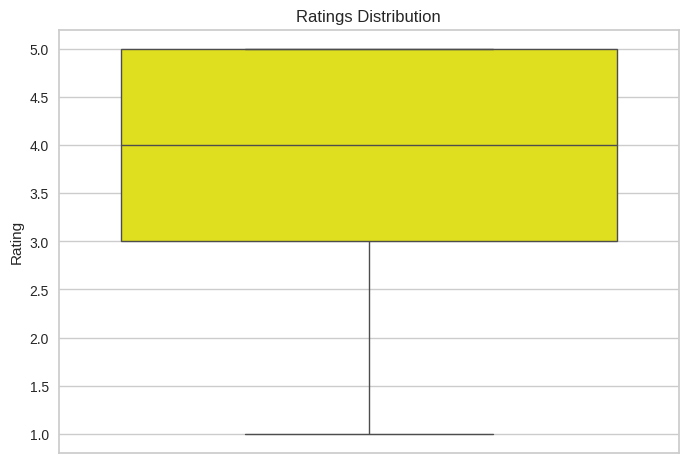

In [97]:
# Handling Outliers & Outlier treatments

# Only taking the revlevant columns from the review data frame

reviews_df_final=reviews_df_final.loc[:,['Review','Rating']]


sns.boxplot(reviews_df_final['Rating'],color='yellow')
plt.title('Ratings Distribution')

##### What all outlier treatment techniques have you used and why did you use those techniques?

No outliers are there in the rating rating column

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [98]:
# Expand Contraction

# function to expand the contractions
def ex_contraction(string):
  ex_text=contractions.fix(string)
  return ex_text


reviews_df_final['Ex_Review'] = reviews_df_final['Review'].apply(ex_contraction)


#### 2. Lower Casing

In [99]:
# Lower Casing
# converting text into lower case
reviews_df_final['Ex_Review'] = reviews_df_final['Review'].str.lower()

#### 3. Removing Punctuations

In [100]:
# Remove Punctuations
reviews_df_final['No_Punctuation_Review'] = reviews_df_final['Ex_Review'].str.replace('[^\w\s]', '')


#### 4. Removing URLs & Removing words and digits contain digits.

In [101]:
# Remove URLs & Remove words and digits contain digits

# Function to remove URLs and words containing digits
def remove_url_n_digits(string):
    string = re.sub(r'http\S+', '', string)  # Remove URLs
    string = re.sub(r'\w*\d\w*', '', string) # Remove words containing digits
    return string

reviews_df_final['Cleaned_Review'] = reviews_df_final['No_Punctuation_Review'].apply(remove_url_n_digits)



#### 5. Removing Stopwords & Removing White spaces

In [102]:
import nltk
nltk.download('punkt_tab')
# Remove Stopwords
# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stopwords.words('english')])

reviews_df_final['Stopwords_Removed_Review'] = reviews_df_final['Cleaned_Review'].apply(remove_stopwords)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [103]:
# Remove White spaces

# Removing extra white spaces
reviews_df_final['Whitespace_Removed_Review'] = reviews_df_final['Stopwords_Removed_Review'].str.strip().replace('\s+', ' ', regex=True)


#### 6. Rephrase Text

In [104]:
# Rephrase Text
# Not required


#### 7. Tokenization

In [105]:
# Tokenization

# done

#### 8. Text Normalization

In [106]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

reviews_df_final['Normalized_Review'] = reviews_df_final['Stopwords_Removed_Review'].apply(lemmatize_text)

##### Which text normalization technique have you used and why?

For sentiment analysis, lemmatization is preferred over stemming because it accurately retains the meaning of words, which is crucial for identifying sentiments correctly.

#### 9. Part of speech tagging

In [107]:
# POS Tagging

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to apply POS tagging using SpaCy
def spacy_pos_tagging(text):
    doc = nlp(text)  # Process the text using SpaCy
    return [(token.text, token.pos_) for token in doc]  # Return list of (word, POS tag) pairs

# Apply the POS tagging function to your DataFrame
reviews_df_final['POS_Tagged_Review'] = reviews_df_final['Normalized_Review'].apply(spacy_pos_tagging)



#### 10. Text Vectorization

In [108]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(reviews_df_final['Normalized_Review'])


##### Which text vectorization technique have you used and why?

TF-IDF Vectorization is ideal for text data as it reduces the influence of common words, highlights unique and informative terms that better represent the content, and converts text into numerical features that can be used by machine learning models for tasks like sentiment analysis, classification, or clustering.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [109]:
# Considering ratings > 3 as positive (1) and <= 3 as negative (0)
y = (reviews_df['Rating'] > 3).astype(int)

#### 2. Feature Selection

In [110]:
# Select your features wisely to avoid overfitting

# Only including this X_tfidf sparse matrix and tranformed y columns

X=X_tfidf
y=y

### 5. Data Transformation

### 8. Data Splitting

In [111]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

80:20 into train and test as we already huge dataset here for text analysis.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Slight imbalance in target variable observed.

In [112]:
imbalance_data=(y.value_counts().reset_index())

imbalance_data.columns

imbalance_data["Percentage %"] = imbalance_data['count']/sum(imbalance_data['count']) * 100
imbalance_data

Rating  count  Percentage %
0       1   6315     63.441832
1       0   3639     36.558168

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not required , as we will be using cross validation along with grid search in further analysis.

## ***7. ML Model Implementation***

### ML Model - 1 Logestic Regression

In [113]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = log_reg.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic Regression** is the first model used in this analysis, with Recall, Precision, F1 Score,  as the primary evaluation metrics as data is slightly imbalanced.

- **Recall:** Recall ensures that the model identifies as many true sentiments (positive or negative) as possible, minimizing false negatives. This is crucial for capturing all relevant sentiment, especially in situations where missing a sentiment (e.g., a dissatisfied customer) could have serious consequences, like losing customers or missing an opportunity for improvement.

- **Precision:** Precision focuses on ensuring that when the model predicts a sentiment (positive or negative), it is accurate, minimizing false positives. High precision is important to avoid misclassifying neutral or slightly negative sentiment as strongly positive, which could lead to misguided actions, such as incorrectly targeting satisfied customers for retention efforts.

- **F1-Score:** The F1-Score balances precision and recall, making it ideal when both false positives and false negatives matter. It ensures a well-rounded performance, capturing as many true sentiments as possible while maintaining accuracy, which is key for reliable sentiment detection and informed decision-making.

In [114]:
# Visualizing evaluation Metric Score chart

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#  Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (for each class)
precision = precision_score(y_test, y_pred, average='weighted')

# Recall (for each class)
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score (for each class)
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")



Accuracy: 0.8774
Precision: 0.8772
Recall: 0.8774
F1-Score: 0.8759
Confusion Matrix:
[[ 574  160]
 [  84 1173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       734
           1       0.88      0.93      0.91      1257

    accuracy                           0.88      1991
   macro avg       0.88      0.86      0.87      1991
weighted avg       0.88      0.88      0.88      1991



**Observations**
* We can observe here that over model performed well in terms of accuracy , precision , recall and F1- Score.

#### 2. Cross- Validation & Hyperparameter Tuning

In [115]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Predict on the model

from sklearn.model_selection import GridSearchCV

log_reg=LogisticRegression()

param_grid = {
    'C': [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [116]:

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters found: ", best_params)
print("Best F1-Score achieved: ", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Best Parameters found:  {'C': 0.5, 'class_weight': None, 'penalty': 'l2'}
Best F1-Score achieved:  0.9015224787414583
Accuracy: 0.8759
Precision: 0.8760
Recall: 0.8759
F1-Score: 0.8741
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       734
           1       0.88      0.94      0.91      1257

    accuracy                           0.88      1991
   macro avg       0.88      0.85      0.86      1991
weighted avg       0.88      0.88      0.87      1991



##### Which hyperparameter optimization technique have you used and why?

Grid Search is the optimization technique used to find the best combination of hyperparameters, improving model performance.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [121]:
# Define the metrics and their values before and after hyperparameter tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
before_tuning = [0.8774, 0.8772, 0.8774, 0.8759]
after_tuning = [0.8759, 0.8760, 0.8759, 0.8741]

# Create a dictionary for the DataFrame
data = {
    'Metric': metrics,
    'Before Tuning': before_tuning,
    'After Tuning': after_tuning
}

# Create the DataFrame
comparison_df = pd.DataFrame(data)

# Display the DataFrame
comparison_df

Metric  Before Tuning  After Tuning
0   Accuracy         0.8774        0.8759
1  Precision         0.8772        0.8760
2     Recall         0.8774        0.8759
3   F1-Score         0.8759        0.8741

We can observe the changes below:

* Accuracy: Decreased slightly by 0.0015.
* Precision: Decreased slightly by 0.0012.
* Recall: Decreased slightly by 0.0015.
* F1-Score: Decreased slightly by 0.0018.


After hyperparameter tuning, the model’s performance slightly decreased in all evaluation metrics (accuracy, precision, recall, F1-score).
There was no significant improvement post-tuning; rather, the metrics slightly dropped.

### ML Model - 2 Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [117]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier
# Train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test)


#  Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (for each class)
precision = precision_score(y_test, y_pred, average='weighted')

# Recall (for each class)
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score (for each class)
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8649
Precision: 0.8662
Recall: 0.8649
F1-Score: 0.8619
Confusion Matrix:
[[ 539  195]
 [  74 1183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       734
           1       0.86      0.94      0.90      1257

    accuracy                           0.86      1991
   macro avg       0.87      0.84      0.85      1991
weighted avg       0.87      0.86      0.86      1991



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples per leaf
    'class_weight': [None, 'balanced'],    # Handle class imbalance
    'criterion': ['gini', 'entropy']      # Splitting criteria
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Start the timer
start_time = time.time()

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the time taken
elapsed_time = end_time - start_time

# Print the time taken
print(f"Time taken for RandomizedSearchCV: {elapsed_time:.2f} seconds")

# Print the best parameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Recall:", random_search.best_score_)

Time taken for RandomizedSearchCV: 2544.23 seconds
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}
Best Cross-Validation Recall: 0.9007406840749344


Already used RandomSearchCV to find the best model for random forest model above- creating the model based on best parameters.

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}


In [118]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_depth=None,criterion='entropy',class_weight=None)
#model fit
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8639
Precision: 0.8658
Recall: 0.8639
F1-Score: 0.8606
Confusion Matrix:
[[ 533  201]
 [  70 1187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       734
           1       0.86      0.94      0.90      1257

    accuracy                           0.86      1991
   macro avg       0.87      0.84      0.85      1991
weighted avg       0.87      0.86      0.86      1991



##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV is used because it is an efficient method for hyperparameter optimization, especially when you have a large hyperparameter space. Unlike GridSearchCV, which exhaustively evaluates all possible combinations of hyperparameters, RandomizedSearchCV randomly selects combinations, which makes it computationally less expensive and faster, especially for large datasets and complex models.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [122]:
# Define the metrics and their values before and after hyperparameter tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
before_tuning = [0.8649, 0.8662, 0.8649, 0.8619]
after_tuning = [0.8639, 0.8658, 0.8639, 0.8606]

# Create a dictionary for the DataFrame
data = {
    'Metric': metrics,
    'Before Tuning': before_tuning,
    'After Tuning': after_tuning
}

# Create the DataFrame
comparison_df = pd.DataFrame(data)

# Display the DataFrame
print(comparison_df)

      Metric  Before Tuning  After Tuning
0   Accuracy         0.8649        0.8639
1  Precision         0.8662        0.8658
2     Recall         0.8649        0.8639
3   F1-Score         0.8619        0.8606


We can observe the changes below:

- Accuracy: Decreased slightly by 0.0010.
- Precision: Decreased slightly by 0.0004.
- Recall: Decreased slightly by 0.0010.
- F1-Score: Decreased slightly by 0.0013.

After hyperparameter tuning, the model’s performance slightly decreased across all metrics (accuracy, precision, recall, F1-score).
There was no significant improvement post-tuning; instead, there were very small drops in all metrics.

### ML Model - 3

In [119]:
# ML Model - 3 Implementation

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#  Make predictions on the test set using  model
y_pred_nb = nb_model.predict(X_test)


# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [120]:
# Visualizing evaluation Metric Score chart

#  Naive Bayes Metrics
print("\nNaive Bayes Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_nb)}")


Naive Bayes Classifier Evaluation:
Accuracy: 0.8338
Precision: 0.8540
Recall: 0.8338
F1-Score: 0.8224
Confusion Matrix:
[[ 428  306]
 [  25 1232]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72       734
           1       0.80      0.98      0.88      1257

    accuracy                           0.83      1991
   macro avg       0.87      0.78      0.80      1991
weighted avg       0.85      0.83      0.82      1991



#### 2. Cross- Validation & Hyperparameter Tuning

In [150]:
# Not required , because this model is already performing worst.

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Following evaluation metrics are considered for positive business impact:



- **Recall:** Recall ensures that the model identifies as many true sentiments (positive or negative) as possible, minimizing false negatives. This is crucial for capturing all relevant sentiment, especially in situations where missing a sentiment (e.g., a dissatisfied customer) could have serious consequences, like losing customers or missing an opportunity for improvement.

- **Precision:** Precision focuses on ensuring that when the model predicts a sentiment (positive or negative), it is accurate, minimizing false positives. High precision is important to avoid misclassifying neutral or slightly negative sentiment as strongly positive, which could lead to misguided actions, such as incorrectly targeting satisfied customers for retention efforts.

- **F1-Score:** The F1-Score balances precision and recall, making it ideal when both false positives and false negatives matter. It ensures a well-rounded performance, capturing as many true sentiments as possible while maintaining accuracy, which is key for reliable sentiment detection and informed decision-making.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [123]:
# Data for the models before and after tuning
data = {
    'Model': [
        'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
        'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
        'Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes'
    ],
    'Metric': [
        'Accuracy', 'Precision', 'Recall', 'F1-Score',
        'Accuracy', 'Precision', 'Recall', 'F1-Score',
        'Accuracy', 'Precision', 'Recall', 'F1-Score'
    ],
    'Before Tuning': [
        0.8774, 0.8772, 0.8774, 0.8759,  # Logistic Regression
        0.8649, 0.8662, 0.8649, 0.8619,  # Random Forest
        0.8338, 0.8540, 0.8338, 0.8224   # Naive Bayes
    ],
    'After Tuning': [
        0.8759, 0.8760, 0.8759, 0.8741,  # Logistic Regression
        0.8639, 0.8658, 0.8639, 0.8606,  # Random Forest
        'N/A', 'N/A', 'N/A', 'N/A'       # Naive Bayes (No tuning performed)
    ]
}

# Create the DataFrame
dataframe = pd.DataFrame(data)


dataframe


Model     Metric  Before Tuning After Tuning
0   Logistic Regression   Accuracy         0.8774       0.8759
1   Logistic Regression  Precision         0.8772        0.876
2   Logistic Regression     Recall         0.8774       0.8759
3   Logistic Regression   F1-Score         0.8759       0.8741
4         Random Forest   Accuracy         0.8649       0.8639
5         Random Forest  Precision         0.8662       0.8658
6         Random Forest     Recall         0.8649       0.8639
7         Random Forest   F1-Score         0.8619       0.8606
8           Naive Bayes   Accuracy         0.8338          N/A
9           Naive Bayes  Precision         0.8540          N/A
10          Naive Bayes     Recall         0.8338          N/A
11          Naive Bayes   F1-Score         0.8224          N/A

Logistic Regression showed consistent and strong performance both before and after tuning. It achieved the highest scores in accuracy, precision, recall, and F1-score compared to Random Forest and Naive Bayes. The changes after tuning were minimal, indicating that the model was already performing well.

Logistic Regression vs Random Forest: While Random Forest had slightly lower metrics than Logistic Regression, it also showed minimal improvement after tuning. The performance of Random Forest was slightly worse than Logistic Regression across all metrics.

Naive Bayes: Naive Bayes had the lowest performance across all metrics (accuracy, precision, recall, and F1-score). The model's accuracy (0.8338) was considerably lower, and the other metrics were also subpar. Since Naive Bayes did not show a competitive performance compared to the other models, it was not tuned further, and Logistic Regression was chosen as the final model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Logistic Regression is the final model for sentiment analysis, due to its stable performance across several key metrics like precision, recall, and F1-score before and after tuning.

Interpretability: Logistic Regression is easy to understand and interpret, making it a popular choice for binary classification problems like sentiment analysis

Performance: Although more complex models like Random Forest might offer higher accuracy, Logistic Regression provides strong performance with minimal complexity. It also works well with smaller datasets and is less prone to overfitting when tuned properly.

Linear Decision Boundary: Logistic Regression creates a linear decision boundary, which is a good fit for problems where the relationship between features and the target class is linear.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [127]:
# Save the File

import joblib
joblib.dump(best_model, 'logistic_regression_model_sentiment.joblib')

joblib.dump(tfidf, 'tfidf_vectorizer_sentiment.joblib')


['tfidf_vectorizer_sentiment.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [130]:
# Load the File and predict unseen data.

# Load the saved model and TF-IDF vectorizer
loaded_model = joblib.load('logistic_regression_model_sentiment.joblib')
tfidf = joblib.load('tfidf_vectorizer_sentiment.joblib')


sample_texts = [
    "The food was absolutely delicious! I had the steak, and it was cooked to perfection. The service was also top-notch.",
    "I had a terrible experience at this restaurant. The food was cold, and the waiter was very rude. I won’t be coming back.",
    "The ambiance of the restaurant was lovely, but the food was just average. The pasta was too salty, and the salad was bland.",
    "I absolutely love this restaurant! The staff are always friendly, and the food never disappoints. Highly recommend the seafood!",
    "Horrible experience. We waited for over an hour for our food, and when it arrived, it was overcooked. Very disappointing."
]
sample_tfidf = tfidf.transform(sample_texts)

# Transform the sample texts using the loaded TF-IDF vectorizer
sample_tfidf = tfidf.transform(sample_texts)


# Predicting the sentiment for each sample text using the loaded model
predicted_sentiments = loaded_model.predict(sample_tfidf)


# Convert the numeric prediction (1 for positive, 0 for negative) to labels
predicted_sentiment_labels = ['Positive' if sentiment == 1 else 'Negative' for sentiment in predicted_sentiments]

# Output the predictions for each sample text
for text, sentiment in zip(sample_texts, predicted_sentiment_labels):
    print(f"Review: \"{text}\" \nPredicted Sentiment: {sentiment}\n")

Review: "The food was absolutely delicious! I had the steak, and it was cooked to perfection. The service was also top-notch." 
Predicted Sentiment: Positive

Review: "I had a terrible experience at this restaurant. The food was cold, and the waiter was very rude. I won’t be coming back." 
Predicted Sentiment: Negative

Review: "The ambiance of the restaurant was lovely, but the food was just average. The pasta was too salty, and the salad was bland." 
Predicted Sentiment: Negative

Review: "I absolutely love this restaurant! The staff are always friendly, and the food never disappoints. Highly recommend the seafood!" 
Predicted Sentiment: Positive

Review: "Horrible experience. We waited for over an hour for our food, and when it arrived, it was overcooked. Very disappointing." 
Predicted Sentiment: Negative



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusion for Clustering Model Evaluation**

After evaluating several clustering models, K-Means was chosen as the final model due to its superior performance and business impact. Here's why:

**Evaluation Metrics:**

- **Silhouette Score:** K-Means provided the best balance of cluster compactness and separation, which is crucial for identifying distinct customer segments for targeted marketing.
- **WCSS (Within-Cluster Sum of Squares):** K-Means produced tighter and more cohesive clusters, making it easier to create focused strategies for each customer group.

**Comparison with Other Models:**


##**K-Means:**

- **Performance:** K-Means produced well-separated, distinct clusters with high interpretability, making it the most effective model for segmentation.

**Silhouette Score:**
- For k=3 clusters: 0.462 (optimal and meaningful segmentation)
- For k=15 clusters: 0.541 (indicating overfitting, with too many clusters)

**WCSS (Within-Cluster Sum of Squares):**

- k=3: Low WCSS, indicating compact and well-defined clusters.
- k=5: Moderate WCSS, indicating the clusters were still well-defined, but 3 clusters were more efficient.

Conclusion: K-Means performed the best in terms of simplicity, cluster quality, and interpretability. The optimal number of clusters was k=3, which balanced the cluster quality and interpretability without unnecessary complexity.

##**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

**Performance:** DBSCAN identified some non-linear relationships within the data but struggled with weak cluster separation and noise points, making it less reliable for practical segmentation.

- Silhouette Score: 0.179 (indicating weak cluster separation)
- Key Issue: The model detected 6 noise points, which impacted the usefulness of the clustering.

Conclusion: Due to the low Silhouette Score and noise points, DBSCAN was not suitable for this task.

##**Hierarchical Clustering (Agglomerative Clustering):**

**Performance:** Hierarchical clustering showed reasonable results but didn't offer significant improvement over K-Means in terms of cluster quality and interpretation.

Silhouette Score:
- For k=5 clusters: 0.368
- For k=6 clusters: 0.393 (the highest achieved for this model)
- Key Issue: Although the silhouette score improved slightly with 6 clusters, it did not provide the same level of distinctness or interpretability as
K-Means, especially with larger numbers of clusters.

Conclusion: Hierarchical clustering was effective but lacked the simplicity and scalability that K-Means offered.










###**Why K-Means Was Chosen:**

- **Scalability:** K-Means is efficient and works well with large datasets, unlike hierarchical clustering, which can be slower and less effective with big data.
- **Cluster Quality:** The k=3 clusters produced by K-Means offered clear and actionable insights, which were easy to interpret and relevant for business decisions.

##**Cluster Breakdown Using Key Features:**

**Cluster 0:**  **High-Cost, High-Quality Restaurants**

**Key Features:**
- **Cost:** Premium pricing
- **Average Rating:** Highest (3.96)
- **Revenue:** Highest ($140,861)
- **Cuisine Type:** Diverse international options
- **Target Audience:** Luxury-seeking customers who value quality and variety
-**Business Implication:** Ideal for upscale promotions, exclusive events, and targeting wealthy customers.

**Cluster 1:** **Mid-Tier Dining**

**Key Features:**
- **Cost:** Moderate pricing
- **Average Rating:** Decent (3.36)
- **Revenue:** Moderate ($63,398)
- **Cuisine Type:** Mix of local and international cuisines
- **Target Audience:** Customers looking for a balance of quality and price
- **Business Implication:** Great for mid-range promotions and attracting customers who seek good value without paying a premium.

**Cluster 2:** **Budget-Friendly Restaurants**

**Key Features:**
- **Cost:** Lowest (very affordable)
- **Average Rating:** Fair (3.54)
- **Revenue:** Lowest ($31,607)
- **Cuisine Type:** Budget-friendly, local or specialized cuisines
- **Target Audience:** Price-sensitive customers
- **Business Implication:** Ideal for value-driven promotions, discounts, or loyalty programs targeting cost-conscious customers.


**Final Thoughts:**

K-Means is the best choice for segmenting customers based on key features like cost, average rating, revenue, and cuisine type. This allows businesses to tailor their marketing strategies for each distinct customer group, maximizing customer engagement and driving higher revenue through targeted offers.






#**Conclusion for Sentiment Analysis Model Evaluation**

After evaluating several models, Logistic Regression was chosen as the final model for sentiment analysis based on its strong and consistent performance across key metrics. Here's why:

**Evaluation Metrics:**

- **Recall:** Recall ensures that the model identifies as many true sentiments (positive or negative) as possible, minimizing the risk of missing important customer feedback. This is crucial in sentiment analysis, where failing to identify a dissatisfied customer could lead to missed opportunities for improvement.
- **Precision:** Precision focuses on ensuring that the model's predictions are accurate. High precision avoids misclassifying neutral or slightly negative sentiments as strongly positive, preventing misguided actions like targeting satisfied customers with unnecessary retention efforts.
- **F1-Score:** The F1-Score combines precision and recall, providing a balanced measure that accounts for both false positives and false negatives. It ensures that the model performs well across all sentiment categories, making it ideal for reliable sentiment detection and informed decision-making.

##**Chosen Model: Logistic Regression**

##**Performance Comparison:**

## **Logistic Regression:**
Achieved the highest scores in accuracy, precision, recall, and F1-score, both before and after tuning. The changes after tuning were minimal, suggesting the model was already performing at a high level.

**Before Tuning:**
- Accuracy: 0.8774
- Precision: 0.8772
- Recall: 0.8774
- F1-Score: 0.8759

**After Tuning:**

- Accuracy: 0.8759
- Precision: 0.8760
- Recall: 0.8759
- F1-Score: 0.8741

The minimal change in performance after tuning shows that Logistic Regression was already performing well out of the box.

##**Random Forest:**
Although Random Forest showed strong performance, its metrics were consistently lower than Logistic Regression, and the improvements after tuning were minimal.

**Before Tuning:**
- Accuracy: 0.8649
- Precision: 0.8662
- Recall: 0.8649
- F1-Score: 0.8619

**After Tuning:**
- Accuracy: 0.8639
- Precision: 0.8658
- Recall: 0.8639
- F1-Score: 0.8606

Random Forest did not outperform Logistic Regression across any metric, and the improvements were marginal, which led to its exclusion as the final model.

##**Naive Bayes:**
Naive Bayes had the lowest performance in all metrics, with accuracy (0.8338) and other scores significantly behind those of both Logistic Regression and Random Forest. Since Naive Bayes did not show competitive performance, it was not tuned further.

**Before Tuning:**
- Accuracy: 0.8338
- Precision: 0.8540
- Recall: 0.8338
- F1-Score: 0.8224

Naive Bayes was excluded from further consideration due to its poor performance compared to the other models.


##**Why Logistic Regression Was Chosen:**

- **Stable Performance:** Logistic Regression provided consistent results with minimal tuning needed, making it a reliable choice.
- **Simplicity:** It is less complex than models like Random Forest, making it easier to interpret and faster to implement without compromising performance.
- **Suitability for Small Datasets:** Logistic Regression works well with smaller datasets and is less prone to overfitting when properly tuned.

##**Model Explanation:**

Logistic Regression is a linear model used for binary classification tasks, such as sentiment analysis, where the goal is to classify text into positive or negative sentiments.

- **Interpretability:** Logistic Regression is easy to understand and interpret, which makes it a good choice for business applications where model transparency is important.

- **Performance:** Despite its simplicity, it offers strong performance with minimal complexity, making it an efficient choice for sentiment analysis tasks.
- **Linear Decision Boundary:**  Logistic Regression creates a linear decision boundary, which is ideal for sentiment analysis where the relationship between features (like words or phrases) and the target sentiment (positive or negative) is linear.


In summary, Logistic Regression is the final model chosen for sentiment analysis due to its strong, reliable performance across key metrics, its simplicity, and its ability to provide clear, actionable insights for sentiment classification.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***